# Linear Regression Model - CDA2/2Da

In [1]:
import pandas as pd
import numpy as np

In [2]:
def import_swiss_votes_data(filepath):
    """
    Import Swiss votes data from a CSV file.
    
    Parameters:
    filepath (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: dataframe with a subselect of csv data
    """
    
    # Import the CSV data
    # The data doesn't have headers and uses semicolons as separators
    df = pd.read_csv(filepath, sep=';')
    
    # Based on the data structure, we can create appropriate column names
    # This is a simplified set of column names based on the visible patterns
    columns_to_use = [
        'anr', 'datum', 'titel_kurz_d', 'titel_off_d', 'stichwort', 'swissvoteslink', 'rechtsform', 'd1e1', 'd1e2', 'd1e3', 
        'dep', 'br-pos', 'bv-pos', 'nr-pos', 'sr-pos', 'annahme', 'berecht', 'stimmen', 'bet', 'leer', 'ungultig', 'gultig', 'volkja',
        'volknein', 'volkja-proz', 'bfsdash-de', 'bfsmap-de', 'nach_cockpit_d',

        # Kantonale Parameter
        'zh-ja', 'be-ja', 'zg-ja', 'so-ja', 'ag-ja', 'ti-ja', 'vs-ja', 'bs-ja', 'bl-ja',
        'ju-ja', 'ne-ja', 'ow-ja', 'nw-ja', 'ai-ja', 'sg-ja', 'tg-ja', 'ar-ja', 'gl-ja',
        'gr-ja', 'sh-ja', 'vd-ja', 'ge-ja', 'fr-ja', 'ur-ja', 'lu-ja', 'sz-ja',

        'zh-nein', 'be-nein', 'zg-nein', 'so-nein', 'ag-nein', 'ti-nein', 'vs-nein', 'bs-nein', 'bl-nein',
        'ju-nein', 'ne-nein', 'ow-nein', 'nw-nein', 'ai-nein', 'sg-nein', 'tg-nein', 'ar-nein', 'gl-nein',
        'gr-nein', 'sh-nein', 'vd-nein', 'ge-nein', 'fr-nein', 'ur-nein', 'lu-nein', 'sz-nein',

        'zh-stimmen', 'be-stimmen', 'zg-stimmen', 'so-stimmen', 'ag-stimmen', 'ti-stimmen', 'vs-stimmen', 'bs-stimmen', 'bl-stimmen',
        'ju-stimmen', 'ne-stimmen', 'ow-stimmen', 'nw-stimmen', 'ai-stimmen', 'sg-stimmen', 'tg-stimmen', 'ar-stimmen', 'gl-stimmen',
        'gr-stimmen', 'sh-stimmen', 'vd-stimmen', 'ge-stimmen', 'fr-stimmen', 'ur-stimmen', 'lu-stimmen', 'sz-stimmen',

        'zh-japroz', 'be-japroz', 'zg-japroz', 'so-japroz', 'ag-japroz', 'ti-japroz', 'vs-japroz', 'bs-japroz', 'bl-japroz',
        'ju-japroz', 'ne-japroz', 'ow-japroz', 'nw-japroz', 'ai-japroz', 'sg-japroz', 'tg-japroz', 'ar-japroz', 'gl-japroz',
        'gr-japroz', 'sh-japroz', 'vd-japroz', 'ge-japroz', 'fr-japroz', 'ur-japroz', 'lu-japroz', 'sz-japroz',
    ]
    # srja, srnein, nrja, nrnein
    # Parteiparolen könnten spannend sein, p-fdp, p-sps, p-svp, p-mitte, etc.

    df_subset = df[columns_to_use]
    
    print(f"Cleaned data: {df.shape[0]} rows, {df.shape[1]} columns")
    return df_subset

swissvotes_data_path = '../data/raw/swissvotes_data.csv'

swissvotes_data_subset = import_swiss_votes_data(swissvotes_data_path)

Cleaned data: 696 rows, 874 columns


In [3]:
def clean_and_prepare_data(df_to_clean):
    
    # 1. Convert date to datetime format
    # Transform dates from DD.MM.YYYY to YYYY-MM-DD format
    df_to_clean['datum'] = pd.to_datetime(df_to_clean['datum'], format='%d.%m.%Y', errors='coerce')
    
    # 2. Replace placeholder values with NaN
    # In the data, '.' is used as unknown and '9999' appears to be not applicable (organisation doesn't exist)
    # We will be replaceing all these values with nan
    placeholder_values = ['.', '9999', '']
    for placeholder in placeholder_values:
        df_to_clean.replace(placeholder, np.nan, inplace=True)
    
    # 3. Convert boolean-like columns (0/1) to boolean
    boolean_cols = [col for col in df_to_clean.columns if 
                    df_to_clean[col].dropna().astype(str).str.match(r'^[01]$').all()]
    
    for col in boolean_cols:
        df_to_clean[col] = df_to_clean[col].map({0: False, '0': False, 1: True, '1': True})
    
    # 4. Strip whitespace from string columns
    string_cols = df_to_clean.select_dtypes(include=['object']).columns
    for col in string_cols:
        df_to_clean[col] = df_to_clean[col].astype(str).str.strip()
        # Convert back to object type if the column had empty strings that were converted to 'nan'
        df_to_clean[col] = df_to_clean[col].replace('nan', np.nan)
    
    # 6. Handle URLs - validate and clean
    url_cols = [col for col in df_to_clean.columns if 'url' in col.lower()]
    for col in url_cols:
        if col in df_to_clean.columns:
            # Basic URL validation - ensure URLs start with http
            mask = df_to_clean[col].notna() & ~df_to_clean[col].astype(str).str.startswith(('http://', 'https://'))
            if mask.any():
                print(f"Warning: Found {mask.sum()} invalid URLs in column {col}")
                
    # 7. Remove completely empty rows
    df_to_clean = df_to_clean.dropna(how='all')
    
    # 8. Handle trailing semicolons that might have created extra empty columns
    # Drop columns that are completely empty
    df_to_clean = df_to_clean.dropna(axis=1, how='all')
    
    return df_to_clean

In [4]:
swissvotes_data_subset_cleaned = clean_and_prepare_data(swissvotes_data_subset)

swissvotes_data_subset_cleaned.head()

,anr,datum,titel_kurz_d,titel_off_d,stichwort,swissvoteslink,rechtsform,d1e1,d1e2,d1e3,...,ar-japroz,gl-japroz,gr-japroz,sh-japroz,vd-japroz,ge-japroz,fr-japroz,ur-japroz,lu-japroz,sz-japroz
0,1.0,1848-09-12,Bundesverfassung der schweizerischen Eidgenoss...,Totalrevision vom 12. September 1848,NaN,https://swissvotes.ch/vote/1.00,1,1,1.2,1.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1866-01-14,Mass und Gewicht,Festsetzung von Mass und Gewicht,NaN,https://swissvotes.ch/vote/2.00,1,1,1.5,1.52,...,24.85,30.85,5.62,40.33,66.56,87.64,58.26,13.53,19.64,24.60
2,3.0,1866-01-14,Gleichstellung der Juden und Naturalisierten m...,Gleichstellung der Juden und Naturalisierten m...,NaN,https://swissvotes.ch/vote/3.00,1,12,12.3,NaN,...,44.23,67.74,10.35,53.30,62.70,85.95,56.79,6.05,19.40,22.27
3,4.0,1866-01-14,Stimmrecht der Niedergelassenen in Gemeindeang...,Stimmrecht der Niedergelassenen in Gemeindeang...,NaN,https://swissvotes.ch/vote/4.00,1,1,1.4,1.43,...,46.01,55.78,9.89,46.42,10.65,37.97,20.44,5.88,19.28,20.47
4,5.0,1866-01-14,Besteuerung und zivilrechtliche Verhältnisse d...,Besteuerung und zivilrechtliche Verhältnisse d...,NaN,https://swissvotes.ch/vote/5.00,1,6,6.1,6.12,...,3.48,64.30,10.45,46.67,6.79,58.28,19.40,5.98,15.95,15.64


## Importieren und Vorbereitung der Daten der Religionszugehörigkeit

In [5]:
# === 1. CSV-Datei laden (korrekter Pfad & Komma als Trennzeichen) ===
file_path = '../data/raw/rel_gemeinde.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

#--Wrangling
# === 2. Leere/unnötige Spalten entfernen ===
df = df.loc[:, ~df.columns.str.match(r"^Unnamed")]

# === 3. In Long-Format bringen ===
id_vars = ['Regions_ID', 'Regionsname', 'Kanton']
value_vars = [col for col in df.columns if col.startswith("y_")]

df_long = pd.melt(df,
                  id_vars=id_vars,
                  value_vars=value_vars,
                  var_name="Jahr",
                  value_name="Religion")

# === 4. Jahr bereinigen (z. B. y_1850 → 1850 als int) ===
df_long["Jahr"] = df_long["Jahr"].str.extract(r"y_(\d+)").astype(int)

# === 5. Encoding-Fehler beheben (‚â• → ≥) ===
df_long["Religion"] = df_long["Religion"].str.replace("‚â•", "≥", regex=False)

# === 6. all values to lower case
df_long["Religion"] = df_long["Religion"].str.lower()

# === 7. Nur gültige Kantone (z. B. ZH, BE, AG etc.) ===
df_long["Kanton"] = df_long["Kanton"].astype(str).str.strip()
df_long = df_long[df_long["Kanton"].str.match(r"^[A-Z]{2}$")]

# === 8. Aggregation: häufigste Religion pro Kanton & Jahr ===
df_kanton_agg = (
    df_long
    .groupby(["Kanton", "Jahr"])["Religion"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)

In [6]:
print(df_kanton_agg['Jahr'].unique())

# Verify that we have the correct amount of values for the religion:
assert (len(df_kanton_agg['Jahr'].unique()) == 17)

print("")

print(df_kanton_agg['Religion'].unique())

# Verify that we have the correct amount of values for the religion:
assert (len(df_kanton_agg['Religion'].unique()) == 8)

[1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980
 1990 2000 2014]

['mehrheit katholisch: ≥ 80,0 %' 'mehrheit reformiert: ≥ 80,0 %'
 'mehrheit reformiert: 60,0 - 79,9 %' 'mehrheit katholisch: 60,0 - 79,9 %'
 'mehrheit katholisch: 40,0 - 59,9 %' 'mehrheit reformiert: 40,0 - 59,9 %'
 'mehrheit mit anderer oder ohne religionszugehörigkeit: 40,0 - 59,9 %'
 None]


## Prepare and Combine Data frames

### Data Frames
Wir testen zwei verschiedene Modelle:
– Dummy-Werte als Werte für die lineare Regression.
– eine Skalarwerteskala von -1 bis 1. 1 steht für eine hohe protestantische und -1 für eine hohe katholische Zugehörigkeit.

### Daten

Wir werden alle Abstimmungen verwenden, die als Wirtschaftsabstimmungen klassifiziert wurden auf Swissvotes

Siehe [Swissvotes](https://swissvotes.ch/votes?term=&full_text=1&policy_area=4&legal_form=1&legal_form=2&legal_form=3&legal_form=4&legal_form=5&result=0&result=1&from_date=&to_date=&position_federal_council=1&position_federal_council=2&position_federal_council=3&position_federal_council=-1&position_national_council=1&position_national_council=2&position_national_council=3&position_council_of_states=1&position_council_of_states=2&position_council_of_states=3&sort_by=&sort_order=)

In [7]:
# Prepare the data with all the necessary 

# List of anr (Abstimmungsnummer) for all votes that are in the used for the training, crossvalidation and testing of the model.
economic_votes_ids = [677, 663, 662, 661, 655, 654, 653, 652, 650, 648,
                      643, 637, 636, 634, 627, 619, 618, 611, 601, 598,
                      589, 585, 583, 575, 574, 568, 565, 559, 558, 557,
                      555, 531, 530, 523, 521, 519, 503, 489.2, 489.2, 489.1, 486, 
                      448, 436, 433, 424, 396, 390, 388, 386, 352, 335, 
                      329, 319, 311.2, 311.1, 310, 307, 305, 294, 282, 264, 
                      263, 262, 255.2, 255.1, 247, 246, 240, 239, 238, 237, 
                      233, 230, 229, 220, 210, 209, 208, 198, 188, 186, 
                      184, 177, 175, 174.1, 174.2, 170, 165, 163, 158, 156.2, 
                      156.1, 155, 146, 143, 142, 141, 140, 137, 131, 126.2, 
                      126.1, 121, 120, 106, 98, 84, 82.2, 82.1, 81, 67, 
                      65, 64, 60, 52, 50, 45, 42, 41, 38, 37, 
                      33, 32, 27, 23, 22, 17, 15, 10, 9]

# Subselect of economic votes based on the ids
df_full_model_data = swissvotes_data_subset_cleaned[swissvotes_data_subset_cleaned["anr"].isin(economic_votes_ids)]

df_full_model_data.head()

,anr,datum,titel_kurz_d,titel_off_d,stichwort,swissvoteslink,rechtsform,d1e1,d1e2,d1e3,...,ar-japroz,gl-japroz,gr-japroz,sh-japroz,vd-japroz,ge-japroz,fr-japroz,ur-japroz,lu-japroz,sz-japroz
8,9.0,1866-01-14,Schutz des geistigen Eigentums,Schutz des geistigen Eigentums,NaN,https://swissvotes.ch/vote/9.00,1,4,4.1,4.12,...,40.38,65.48,8.12,47.00,10.89,69.05,46.50,16.21,19.20,27.27
9,10.0,1866-01-14,Verbot der Lotterie und Hasardspiele,Verbot der Lotterie und Hasardspiele,NaN,https://swissvotes.ch/vote/10.00,1,4,4.1,4.13,...,41.51,78.66,11.04,48.20,14.19,75.71,21.27,10.76,21.76,23.06
14,15.0,1876-04-23,Banknotengesetz,Bundesgesez über die Ausgabe und Einlösung von...,NaN,https://swissvotes.ch/vote/15.00,2,4,4.3,4.31,...,53.66,59.58,9.39,38.02,51.38,8.55,63.87,11.16,11.03,61.87
16,17.0,1877-10-21,Fabrikgesetz,Bundesgesez betreffend die Arbeit in den Fabriken,NaN,https://swissvotes.ch/vote/17.00,2,4,4.2,4.21,...,28.04,66.78,78.52,72.97,29.05,43.28,18.50,70.34,59.81,75.10
21,22.0,1880-10-31,Banknotenmonopol,Bundesbeschluss betreffend den durch das Volks...,NaN,https://swissvotes.ch/vote/22.00,1,4,4.3,4.31,...,30.28,68.77,65.32,66.48,1.66,5.30,3.17,36.54,19.26,17.45


### Qualität der Daten und kurzer Exkurs

#### Verteilung der Abstimmungen seit Beginn des Datensatzes

Text(0.02, 0.02, 'Totale Abstimmungen: 129\nDurchschnitt: 1.8 Abstimmungen/Jahr\nMedian: 2.0 Abstimmungen/Jahr\nMeiste Abstimmungen: 5 in 1976\nWenigste Abstimmungen: 1 in 1876')

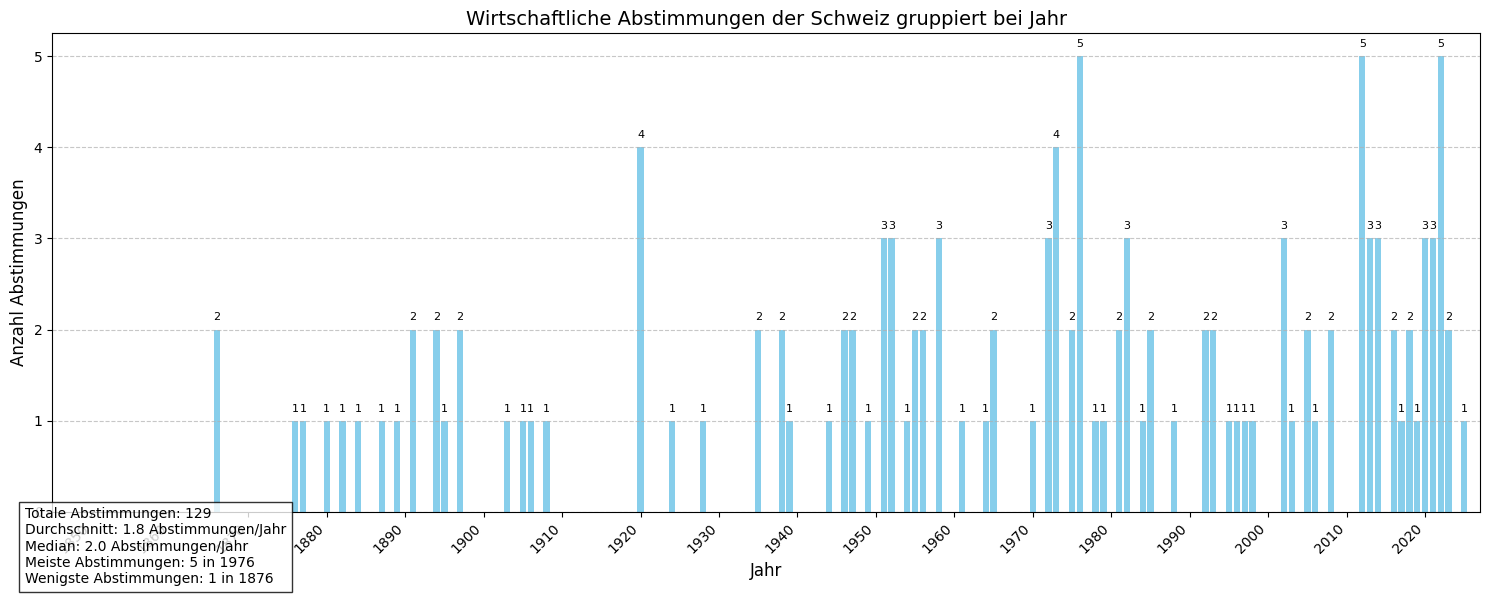

In [8]:
import matplotlib.pyplot as plt

# Creating a histogram showing the number of votes per year.
df_histogram_votes = df_full_model_data.copy()

# Extract the year from the date column
df_histogram_votes['year'] = df_histogram_votes['datum'].dt.year

# Count votes per year
vote_counts = df_histogram_votes['year'].value_counts().sort_index()

# Create the histogram as a bar plot
plt.figure(figsize=(15, 6))
ax = plt.bar(vote_counts.index, vote_counts.values, color='skyblue', width=0.8)

# Add labels and title
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Anzahl Abstimmungen', fontsize=12)
plt.title("Wirtschaftliche Abstimmungen der Schweiz gruppiert bei Jahr", fontsize=14)

# Add count labels above bars where count > 0
for year, count in vote_counts.items():
    if count > 0:
        plt.text(year, count + 0.1, str(count), ha='center', fontsize=8)

# Set x-axis to show only every 10th year
decade_years = list(range(1850, 2030, 10))
plt.xticks(decade_years, rotation=45, ha='right')

# Set the x-axis limits explicitly
plt.xlim(1845, 2027)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Annotate with statistics
total_votes = vote_counts.sum()
avg_votes = vote_counts.mean()
median_votes = vote_counts.median()
max_year = vote_counts.idxmax()
min_year = vote_counts.idxmin()

stats_text = f"Totale Abstimmungen: {total_votes}\nDurchschnitt: {avg_votes:.1f} Abstimmungen/Jahr\nMedian: {median_votes:.1f} Abstimmungen/Jahr\n"
stats_text += f"Meiste Abstimmungen: {vote_counts.max()} in {max_year}\nWenigste Abstimmungen: {vote_counts.min()} in {min_year}"

plt.figtext(0.02, 0.02, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

#### Boxplots für die Darstellung der Ja-Stimmen über alle wirtschaftlichen Abstimmungen

Text(0.02, 0.02, 'Overall Statistics:\nMedian: 50.2%\nMean: 50.4%\nQ1-Q3: 35.1% - 62.8%\nRange: 11.5% - 87.7%')

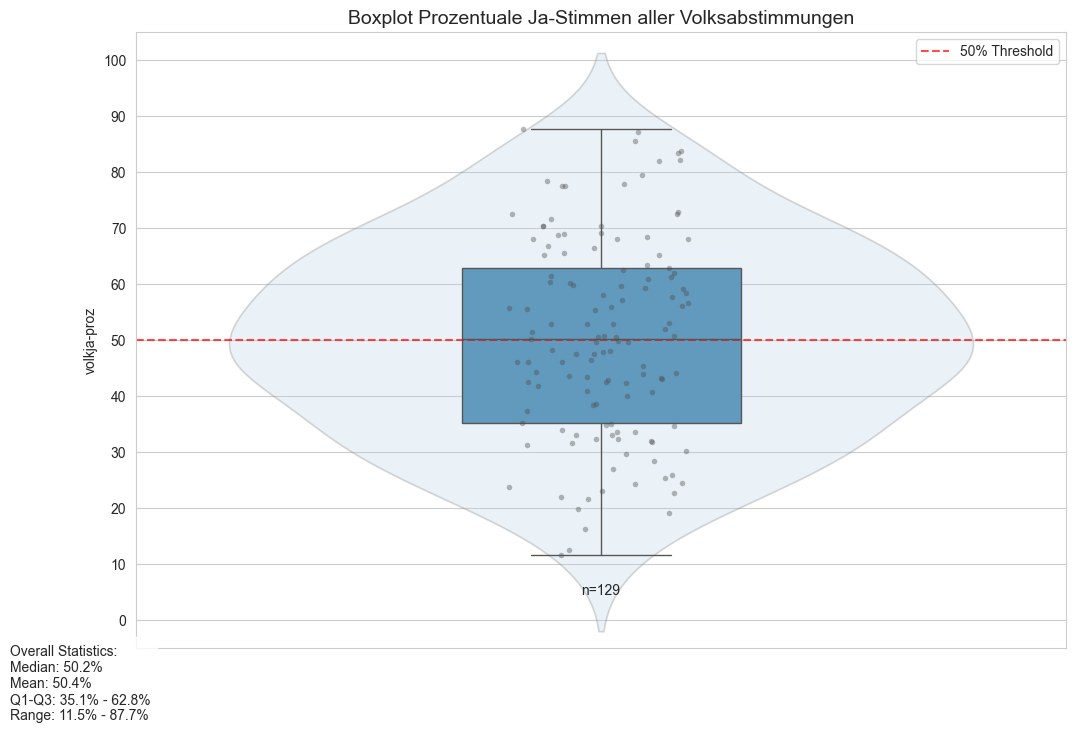

In [9]:
import seaborn as sns

# Creating a boxplot for the yes percetage of the whole country
df_boxplot_yes_percentage = df_full_model_data.copy()

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 8))

color_palette = 'Blues'

# Create a single boxplot for all data
ax = sns.boxplot(y='volkja-proz', data=df_boxplot_yes_percentage, color=sns.color_palette(color_palette)[3], width=0.3)

# Add a violin plot for better distribution visualization
sns.violinplot(y='volkja-proz', data=df_boxplot_yes_percentage, color=sns.color_palette(color_palette)[1], 
               alpha=0.3, inner=None)

# Add individual data points
sns.stripplot(y='volkja-proz', data=df_boxplot_yes_percentage, color='0.3', size=4, alpha=0.4, jitter=True)

# Add count of total data points
plt.text(0, df_boxplot_yes_percentage['volkja-proz'].min() - 5, f'n={len(df_boxplot_yes_percentage)}', ha='center', va='top', fontsize=10)

# Set y-axis to percentage range (0-100) with appropriate ticks
plt.ylim(-5, 105)
plt.yticks(np.arange(0, 101, 10))

# Calculate overall statistics
overall_median = df_boxplot_yes_percentage['volkja-proz'].median()
overall_mean = df_boxplot_yes_percentage['volkja-proz'].mean()
overall_q1 = df_boxplot_yes_percentage['volkja-proz'].quantile(0.25)
overall_q3 = df_boxplot_yes_percentage['volkja-proz'].quantile(0.75)

# Add overall statistics text
stats_text = f"Overall Statistics:\n"
stats_text += f"Median: {overall_median:.1f}%\n"
stats_text += f"Mean: {overall_mean:.1f}%\n"
stats_text += f"Q1-Q3: {overall_q1:.1f}% - {overall_q3:.1f}%\n"
stats_text += f"Range: {df_boxplot_yes_percentage['volkja-proz'].min():.1f}% - {df_boxplot_yes_percentage['volkja-proz'].max():.1f}%"
    
# For single boxplot, add threshold line
plt.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% Threshold')
plt.legend(loc='upper right')
plt.title("Boxplot Prozentuale Ja-Stimmen aller Volksabstimmungen", fontsize=14)

# Add the statistics text box
plt.figtext(0.02, 0.02, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

#### Kantone nach Anzahl Stimme

In [10]:
#Prepare additional data frame for visualizations
df_agg_votes_stats_per_canton = df_full_model_data.copy()

# Define canton codes
canton_codes = ['zh', 'be', 'zg', 'so', 'ag', 'ti', 'vs', 'bs', 'bl',
               'ju', 'ne', 'ow', 'nw', 'ai', 'sg', 'tg', 'ar', 'gl',
               'gr', 'sh', 'vd', 'ge', 'fr', 'ur', 'lu', 'sz']

df_agg_votes_stats_mean_per_cantons = []

# Generate vote data for 132 votes
for id, vote in df_agg_votes_stats_per_canton.iterrows():
    year = vote['datum'].year
    
    national_result = vote['volkja-proz']

    # National decision (accepted if > 50%)
    national_accepted = national_result > 50
    
    # For each canton, generate a row
    for canton in canton_codes:
        # Skip entries for cantons (Jura before 1979)
        if canton == 'ju' and year < 1979:
            continue

        canton_result_col = f"{canton}-japroz"

        aligned = None
        
        # Skip if canton data is missing
        if not (canton_result_col not in vote or pd.isna(vote[canton_result_col])):
            # Canton result
            canton_result = vote[canton_result_col]
            
            # Canton decision
            canton_accepted = float(canton_result) > 50
            
            # Check if canton aligned with national outcome
            aligned = canton_accepted == national_accepted
            
        # Add row to dataset
        df_agg_votes_stats_mean_per_cantons.append({
            'vote_id': vote['anr'],
            'year': year,
            'canton': canton,
            'ja_prozent': float(vote[f'{canton}-japroz']),
            'volk_ja_prozent': float(vote['volkja-proz']),
            'stimmen': float(vote[f'{canton}-stimmen']),
            'volk_canton_aligned': aligned
        })

df_agg_votes_stats_per_canton = pd.DataFrame(df_agg_votes_stats_mean_per_cantons)

grouped_data = df_agg_votes_stats_per_canton.groupby(['canton'])['stimmen'].agg('mean')

C:\Users\aaron\AppData\Local\Temp\ipykernel_67004\3479925184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped_data.index, y=grouped_data.values, palette=color_palette)


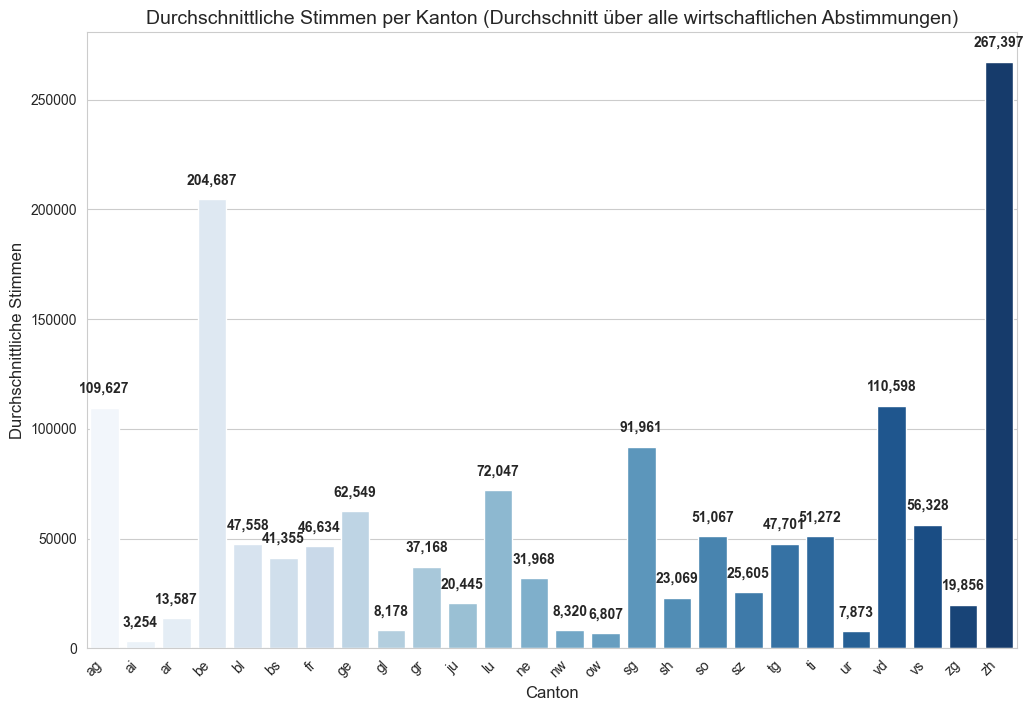

In [11]:
title = "Durchschnittliche Stimmen per Kanton (Durchschnitt über alle wirtschaftlichen Abstimmungen)"

# Create the figure
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = sns.barplot(x=grouped_data.index, y=grouped_data.values, palette=color_palette)


for i, value in enumerate(grouped_data.values):
    # Format large numbers with thousands separator
    if value >= 1000:
        value_text = f"{value:,.0f}"
    else:
        value_text = f"{value:.1f}"

    ax.text(i, value + (grouped_data.max() * 0.02), value_text, 
           ha='center', va='bottom', fontweight='bold')

# Add labels and title
plt.xlabel('Canton', fontsize=12)
plt.ylabel(f"Durchschnittliche Stimmen", fontsize=12)
plt.title(title, fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add count of data points per canton
canton_counts = df_agg_votes_stats_per_canton['canton'].value_counts()
for i, canton in enumerate(grouped_data.index):
    if canton in canton_counts:
        count = canton_counts[canton]


#### Kantone, die am öftesten wie die ganze Schweiz abgestummen haben

In [12]:
# Drop rows where 'volk_canton_aligned' is None - more pandas-like approach than using continue
df_agg_votes_stats_per_canton = df_agg_votes_stats_per_canton.dropna(subset=['volk_canton_aligned'])

# Calculate alignment percentages
alignment_stats = df_agg_votes_stats_per_canton.groupby('canton')['volk_canton_aligned'].agg(['mean', 'count']).reset_index()
alignment_stats.columns = ['canton', 'alignment_rate', 'vote_count']
alignment_stats['alignment_percent'] = alignment_stats['alignment_rate'] * 100

# Sort by alignment rate
alignment_stats = alignment_stats.sort_values('alignment_rate', ascending=False).reset_index(drop=True)

print(alignment_stats)

   canton alignment_rate  vote_count alignment_percent
0      be       0.945312         128          94.53125
1      ag        0.90625         128            90.625
2      sh       0.890625         128           89.0625
3      zh       0.890625         128           89.0625
4      bl       0.882812         128          88.28125
5      lu       0.882812         128          88.28125
6      zg       0.882812         128          88.28125
7      so       0.882812         128          88.28125
8      sg        0.84375         128            84.375
9      tg       0.835938         128          83.59375
10     ur       0.828125         128           82.8125
11     fr       0.820312         128          82.03125
12     ge         0.8125         128             81.25
13     vd         0.8125         128             81.25
14     ti       0.804688         128          80.46875
15     gr       0.804688         128          80.46875
16     ne       0.796875         128           79.6875
17     gl 

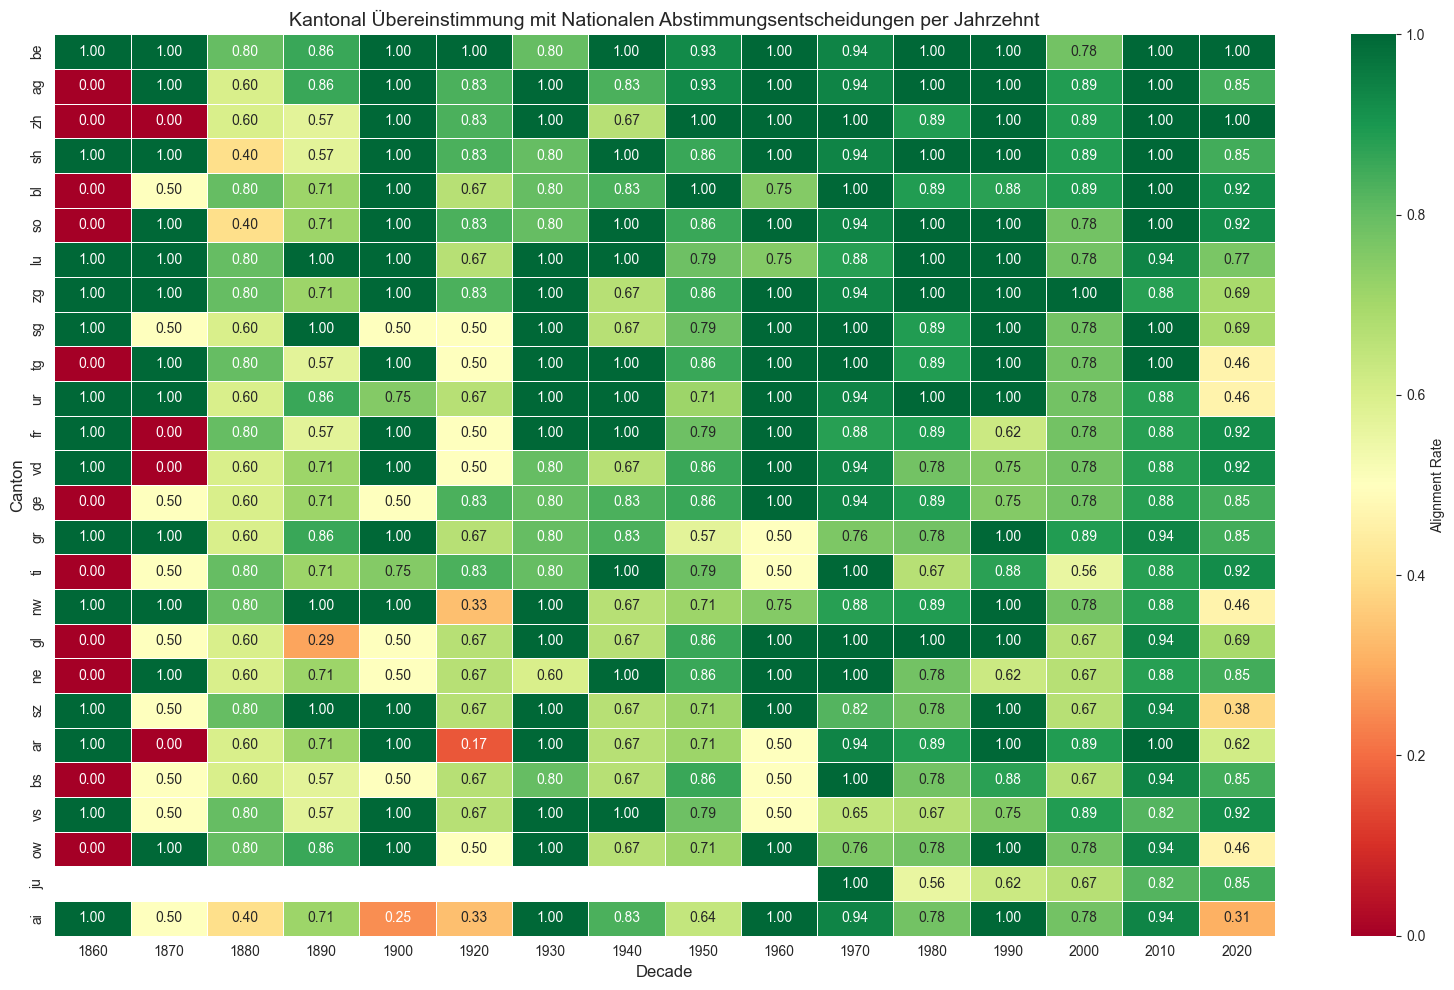

In [13]:
title = "Kantonal Übereinstimmung mit Nationalen Abstimmungsentscheidungen per Jahrzehnt"

# Ensure year is numeric
df_agg_votes_stats_per_canton['year'] = pd.to_numeric(df_agg_votes_stats_per_canton['year'], errors='coerce')

# Drop any rows with NaN years
df_agg_votes_stats_per_canton = df_agg_votes_stats_per_canton.dropna(subset=['year'])

# Create decade column (convert to int first to avoid error)
df_agg_votes_stats_per_canton['decade'] = (df_agg_votes_stats_per_canton['year'].astype(int) // 10) * 10

# Ensure the 'aligned' column is boolean or numeric
df_agg_votes_stats_per_canton['volk_canton_aligned'] = df_agg_votes_stats_per_canton['volk_canton_aligned'].astype(float)

# Calculate alignment rate by canton and decade
heatmap_data = df_agg_votes_stats_per_canton.groupby(['canton', 'decade'])['volk_canton_aligned'].mean().reset_index()

# Pivot for heatmap format
heatmap_pivot = heatmap_data.pivot(index='canton', columns='decade', values='volk_canton_aligned')

# Sort cantons by overall alignment rate
canton_order = df_agg_votes_stats_per_canton.groupby('canton')['volk_canton_aligned'].mean().sort_values(ascending=False).index
heatmap_pivot = heatmap_pivot.reindex(canton_order)

# Set Seaborn style
sns.set_style("white")

# Create the figure
plt.figure(figsize=(16, 10))

# Create the heatmap
ax = sns.heatmap(heatmap_pivot, annot=True, cmap='RdYlGn', vmin=0, vmax=1, 
                fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Alignment Rate'})

# Add labels and title
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Canton', fontsize=12)
plt.title(title, fontsize=14)

plt.tight_layout()

## Prepare the data frame for the lin. reg. models

In [14]:
import re

# Function to convert religious affiliationdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABAoAAALHCAYAAAAHAqB8AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjEsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvc2/+5QAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3Qm4VeP7//G7eVBERSJ8RRINpESDSpmHNCEKZWwwZSgyZSiJSFKoUJRCmTJ8M4eKlEoDJZVINNNc53997u//Wb99dvuczqkzn/fruva1z9lr77XXntZaz/3cz/0USEpKSjIAAAAAAAAzK5jdGwAAAAAAAHIOAgUAAAAAACBCoAAAAAAAAEQIFAAAAAAAgAiBAgAAAAAAECFQAAAAAAAAIgQKAAAAAABAhEABAAAAAACIECgAAAAAAAARAgXIME8//bQdc8wxyS7HHnusnXDCCXbeeedZ//79bc2aNdm6jT169PDtWrJkSZY+79SpU/15BwwYkCnv+ddff53s9l9//XWX+27ZssVWrFgR/f/mm2/6Y8eNGxfdpv8vvfTSdG9H06ZNrVGjRpZVdu7c6dvdvn17O/nkk+3444+3Bg0aWOfOne3TTz9N+Ji0vH5kPX2G+hx+++23hMtffPFFX67v1y+//JLp25Pot5MdrrvuOnv44YeT/cbi96/63terV8+uuOIKmzBhgmW3Pd1/5NT9ekr7tUTfkfR8b7ROrVu0/9G2a3+Uln17Thb/+WfX8TYjjlF//vmnbdy4MVO2Rfs6vS+33XZbhq974cKF1q5dO6tZs6bVrl3bJk6c6LevX7/eVq9eneL3a2+2Kbt+92n13XffRfvMRYsWZflnErtvyMznQXJJSUnWsmVLe+GFF7J7U3K1wtm9Ach7Lr74Yj9AhQadDlA//PCDDRs2zE9mR40aZUcccUR2b2ae0Lx5czvssMPs6KOPjm4bPHiwX+bMmRPdNnv2bOvWrZvdeOONvuNMSb9+/axs2bKWk+k71bVrV/vkk0/stNNOs2uvvdb23XdfP7F766237Prrr/fGZ69evVJ9/XXq1PHXq0AWciYFCfr06WOHHHKIvfTSS1apUqVMfb5Ev53soP3kzJkz/fsZL/Y2Bb/++usv++9//2t33nmnB8kUjCxYkD6AjHDXXXf5yWagY5n2Nzp+9e3bd4+/N/fcc48VKFDA/1agU5/piSeemAmvACl9lql5/fXXPUj3zjvvWMmSJS03ueOOO+zHH3/04+Chhx7qx7fPP//cbx84cKB/3xI54IAD/HuY2fvY7PDGG2/456jAz5gxY+zuu+/OkudNtL/Iy+9zTqN9rH73HTt29EDhkUcemd2blCsRKECGq1Wrll144YW73H7RRRd5L5ku7733nhUuzNdvb1WtWtUvsb788kvbtm1bstvmz59vf/zxx27Xl+hzy2k+/PBD+/jjj73R36VLl2TLdFBWkGDkyJF2zjnnRCffiV6/DtQcrHN+kECBMAUJKlasmOnPmei3k9X++ecff91XXXWV7bfffmn6japRoJPf8ePHW5UqVXb5XWDPNGvWLNn/yoibMWPGLoHu9H5vFOAN9P3WBVn7WaZmypQpmZZNkNl0rFMm5y233BLdpsbx2rVrU32cGtK54fifXv/++6998MEHnk2yePFi70zo3r27FS9ePNOfO9H+Iq++zznVSSed5MGx+++/315++eXs3pxciW4HZJmGDRvalVde6WlYb7/9dnZvDnIppRFKkyZNdllWtGhRjx7Lt99+m+XbhowNEqgHQBlIWREkyCl0Uq+T27Zt26b5MYUKFbIHHnjA36fhw4d7sAFA/rJ9+3bbsWOHlS5dOrs3JcfQ0AsFfU455RQP0K1bty4ajoH84fLLL/fhv7NmzcruTcmVCBQgS7Vu3dqv1SMcP0ZZB7lYGjun2zWWLlD6UKdOnWzIkCEeKVSPsXqPRT06zz33nJ1//vk+Pk+BiVtvvdWjyPF+//13jyrXrVvXMyAuueQSmzx5crL7bNq0yRsrZ511ltWoUcOjksqGmD59+i7r++abb+zqq6/2+2jYhU7yEx2MlDavbTzjjDN8fLFej15fbG9UGDuvdSpFrXHjxn5fbceIESOSrS9+nKH+/v7776O/NUZUl5CG37NnT789PWMNV61aZQ8++KBvq94H9cxouzZs2JCwEa/PU++pUvvVs5lofKp22OoF1ftfvXp1r2GhBo5OcnanVKlSfj169OhdvjOikwGlXuqzkpRef0o1Gnr37m3vvvuuR/21bRreoLRipa2qZ6JFixb+Puh5NJwmll67XotSkNUjrLRPvUalhSsNUb09CmTodtVUuPfee3dp1Cmd/JlnnvHPW5+7vlPKnvjpp5+S3U+vS9u3fPly7z3S/bRdGvqjVNPdCa9fvaFqZOrx+j3pNahHLZ62/9FHH7XTTz89qgmh91O/pfj3QNuudM9TTz3Vf4uJUuh3FyRQz7iCBAcddFCKmSV6L7Xdxx13nF/rOxWf/q3XqPf5o48+slatWkW/ZaXirly5Mtn94n87gca1al+i16PXrvdAqaQ66YwV9k8KUunkRJ+z9gf6HaSlvoK+/+r10HurFNX0KFasmH/39H0Kn19q42F1W2xtiFBHRftTva96neqFC5k4S5cu9fdE+1V9pmeffbbvh7du3brLuidNmhS916qhoMf9/fffye4zd+5c/7y0vvCePvTQQ7v0fGb0fj18PxcsWOAZSPp89DkpiK0hcimNa9fvRfttUeaG3qvwnqX0vYmXWl2U2LoFsTSu/Pbbb/fjnbZTx5lEJ7yZ+ftM628trZTSr2OkPiO9pssuu8yHkqVG32u9Lr3+WPrM9J5ecMEFyW5ftmyZ3/74448nrFEQjp16XmWfad069ul+2j7Re6n3K/w2Bw0a5N9Dbbc+Dy1LtN06/mifrcapXp+OJa+++mrCoQ/6Lmid4TPTb0CBwvjX/uSTT0bPrfvqOKx9ULivXo8+G5k2bZq/Nm2fLvqdSocOHRJ+x1LbV2T07150zNG26HijdWo4YHyNjvDbUqfS0KFD/Xgbzpk0vCqtGTz6nkv9+vX9cw7nDqnRPljvr46v5557rv8f/9np/Ey1YfQZ6356X/QZbd68OdX9RaL3eW/PG8J3+eeff/b3XL9PfU+0Xt2mzAal4Ot2fW/1G4rdf6ZWQ0u/idhzxvScn4qGhGo/pO3WZ63furIs9HmG31bsfTUsS79TrVOdQfo9xNc2S+9xVs+t7DxqFewZcr+Rpf7zn/94ypcOpHtKJ2Xa+elArJNK7ajVANdJnxrM2rnoBFE7F5306qRZB2ONcw5U9E47TZ1wqrGg1GY1LHVQCan8WvbVV1/5jk09mzrgvfLKK35w0BjGcD8dBLQjVG+elmmHpIObGm/aPhUWCtTwUQNAjbl99tnHd7o6+dDBRSeDsZRKrDQ1HVA1TEMnGjoxUEO5TZs2Cd8b7bjVqFXWhv4OKa3qcdQ2x9aPSAuNf9ZBXCerCvIopVEHLTXmtLPXAbRIkSJ+X91HByANMdEJjQ56et/VIFADWw2ZECS66aabfPyk7q/XqPdZJ7n6bHXQC+N3E9H26HnHjh3rY7J10NDBT69Ln7HGZ8eO0dZrTs/r14mfAgU6AOlkVj28Tz31lJ+c6zWH23Wyoff44IMPjk5Awnum74FOMHTw/Oyzz3zMuU7Y1TjRfXW7nue1117z16qGuujkSycEGp+uk0s1XnTw1DboORVMiR3LrO+9vl86cIffgw7WN9xwg7+GtIzJu++++/xaB16tT99RbYO+l+GkUg1i/ab0GvTdO+qoozwApO3SZ6DXcfjhh0frVONS743WKTppSU+QoHz58v4Z77///qneT79h1avQd1DfN73POknWCWtsQ1uNRZ386zXoO6B9glJQ1ZgIJ40p/XYU/NLr0HdIJ036junz0TboM9R7EPtc2jddc8013nDRRd9/3WfevHleS0DrSYm+Y/q89fg9od+naP+anlTrWE888YQH+XTCps9R328FqfTa9f3Qe6jPWidpOrHU/kAnyIFep4Iwup++szqh1D5SwZbQQNb7rt+IPmedGKsHVA0+fff0HoTfRWbs18O+Sr9jnZBqv6uTd32e+r3p95poyIfeE524az+l/Y1eW+XKlVP83mQUfQ56v/U9V6NBvwsdk3Qd6qtk5u8zvb+13Xnsscf8hF0NN31OCoxqKKL2WTqO6jNIRMc9bYO+d3pMOJ6o0Sn6jupzDdsSGvCxwzwSUYNNjVu9p3ptery2T/t6bU+o/6P3QMd/fe46Juuz0Puq75wasgooi76r+s5qe/WZKNCpbdE+XkHd2OO8joU69mkfXq5cOd8/6Lutc43wm1IwXM+n16f16W8FB95//33f1+t7rt+sXqeG0uk7qv2+Ajlap+j3pefSbWrUplVG/+5F76E6HrQd+j7pWK1t03utdcTXD9BzqJGu/bZ+lzpnCoGP2OEViajRqM9RzxWGGepYqX2MnivsL2NpW3TR/kH7Jx1HVa9CAZPQ4aD9v/bR1apV8++tvov6HJ999lnfD2ibU9pfhEBCvL05bwi0TXoOvS8KBGgfoc9c51g6P9V5l7ZP3zHVbNJ56p7Ws0nL+al+j/rc9H3W90Ln/1988YW/Th0HK1SoEK1PxwR913QOpMdov67vmPZheszeHGf1twJXWo/Wr8xTpEMSkEEGDhyYVKVKlaQ33ngj1fs1bNgwqXr16tH/l19+uT9u27Ztye731Vdf+e1ab9CkSRO/7euvv0523/Hjx/vtjz32WLLbp02b5rc//PDD/v+dd97p//fs2TPZ/V5//XW/fcCAAf7/qlWr/P/77rsv2f2+//77pDPOOCNp7Nix/v+///6bdMIJJ/htGzZsiO63ZcuWpLPPPjvplFNO8dc1ZcoUX1+9evWSVq9eHd1v3bp1SSeeeGJSo0aNotv0/um+5513nq8nWLZsmd9+8cUX7/Ke670KLrnkEr8tlrY3/rMJzxNei+h/PT7Q+6TbPv/882Tre/rpp/32//73v8k+F30Ose64445kn9fGjRuTTj755KSLLroo2WsTvfe673vvvZe0O/oczjzzTL9/7KV58+ZJTz75ZLLPIr2vXxetP/jxxx/9tqpVqybNmTMnun3BggV++2233bbLd3nIkCHRbVu3bk2qW7eu3/7iiy9Gt2/fvj3p1FNPTfbZP/fcc36/iRMnJtv+lStX+vt2zjnnRLeF73KvXr2S3ffNN9/025944olU38Pw+uvXr5/sO/nHH38k1apVK6lx48ZJO3bs8Nv0O6hWrVqy90V++umnpOOPPz7p6quv3uU9GDduXKrPH3//hx56yK+POeaYZN+teHrf9F5ceOGF/nesRx991B/7/vvv7/KZTp8+PeHzLl68OMXfjl6/vlN6jQsXLkz2+FdffdXv26NHj+i28Dt4++23k91X99HtkydPTvW9GDx4sN9P+614Yd2pCfvMe++9N9k+o3v37rvcV7dpme4jYR/VtGnTXd7XDh06JB133HFJ8+bNS/i6wu3hvf7222+T3a9du3Z++5IlS/z/F154wf//4Ycfkt3vkUce8X3DihUrMmW/Hvu5P/vsswn3aa+99lqy91zHq+DXX3/1++j5YiXa5yaSaJ8T6Hn0fPH7dr0fmzdvjm7Xe619UexxILN+n3vyW4s9foTPRe+b6PPW//fff3+ydWkf2b59e/+Oaf+TklGjRvnjv/zyy+g2Pd9pp522y7Hjiiuu8H3rzp07E36W4f29/fbbd/vbEO0TY99H+f3335OaNWvm351A/2t/H77Dom0IvyGdW4TfpT6b2P2PzhVOP/10v1/4zCdNmuT3HTZs2C7vmV6Ptiv28bqvPuNYOhbodv3GUzp3SLSvyOjfvT5bre+6666LPpfw/uhziN0nhP2RzqHWrl0b3feff/7x19ygQYOk3enXr5+vY/jw4dFtQ4cO9dvuueeeZPcNr1/Hn5kzZyZ7n9u0aeO3L1q0yG974IEH/L5///13snXceOON/rsM5zaJ9heJ3ue9PW8In2XHjh2Tva/XX3+93965c+dk29mtW7dkn0t4rxOdM8Tv29Jzfhrepw8++CDZOvXex39P9dvSuXDYpvhjWuy5+J4cZ8OxderUqbssQ+oYeoAsp5Sx1HqMd0dRf0Vr41MjJYxPD3Q/RbMV9Y2l9PFYoUclpCIrKqoovNarxyvaK+rB0W0hYqoosqL7ioCGlHhRxFLRZfVWxkY2laYV20uqav2K/mv98altZ555ZrLIp3rg9dhEqXyZQdujyKxSwOOnlVKvj3oL1CsU+7koGh5LqWaiXtLwfqlHUK9NqXOKOIdL6JXXc+6OPgcN7VAPpHpv9L+eX71o6t1ThDk+5TatFHmPnQlBEXpRT2FI7ZRQoCi8tlixGQbartCbp/TEQN8Lfaaxj1fPmr4T6jmLfW90X30Gmvoqfnqn+JRbpexJ+M7ujnoEYr+TivIrm0Hvn3oO9T1Q75W+p3odsdulGTL02wm/g1hKa04P9X7o9xqyVNRjkagAp94L9Qyotzj2t6VxqCG7JX44h97n+Kry4X1K7fekXgp9p5QWGr4HgXpI1Ouh/UHskBn9ZtXzsyefSRims6e90iEdd2/2r0p5jX1f9XtVz7HSN+MLp6o3Vr1SsZkrek/Ug5ba/lVZCqKeSfXAhjRm9SqqxzAMN8no/XpG/m6yirKuQu+56DNQGrh6SsNxI7N+n3vyW0uNemfD/jF2OzWMTbfp+5vS9LZhKICE4SR6bvUO63ik9ygMudHtygRSVs3ufgtp3U9pv6jedGVYhOE6+h7reKWe8bC/UM+z9hexQ6a0DeptVRaT9u+BPpvYQnfqmdX3UO9DmMpQr1mp4erhjqX9lnrY9Vmoxz+jZcbvXr9nvTYdB7X+8Pnr73DuoCFisZSpEZvho0zMkOGZGu2T9X6rxzz2eBz+VoZZou9uSJEP9D1X1pN+Z8qekdATrrR4DUUN+39lHqpXe097rPf0vCH28bHf93DMin28hPUmWkdapeX8VPslfb9131jxxXaVEaXftL4/Oo+O3Tfou6dskPjzwvQeZ8NrzglTteY2DD1AllIanU4KDjzwwD1eR5kyZXaZMUEHbu2kEqVAarxcvJCSF4QTsXDCqp2QDuw6cQ3pZmow6yCitHqlnIV0KUmU4h2b6pnS84qGYuhAo0vs61LaWzxtV2acFCSiNHalV2poRzztzMN7EPu5hJPHIFQWDg2YMC5OqZK6JKL0zLTQCYAaDCFopBNhjc1XoEBpaY888oinz6dX/GcUTpDjP4+Qspdo3Gn8fVNbR+zj9f4oNTHRex77/sQ2WuO3Nxy80/o90fc6Xvg+66RXJ4D6LoRhPilZsWJFqtu1OwqOKKVU6Yw68VYjUuPNlSYZn66v16gTNJ2I6D3Te6KgQngv4z+TlH5LklpdDL1+USp3PJ2QKS1ZKaI60Q2vVye18b+DtH4moXGwp8XIwuP3ZorT+M9N7622W2mj8fQ88c+V6L0O+4Gwf9WJo9K9FRRQoEDLNSRIjQI19kPDIKP366ndN72/m6wSH6ASnXxrX6eTXu1DMvP3md7fWmrC/j++0ZvW/b8aaArWariBxmIrvV3nFPreKCVb/4uCGzrmpGX4TVp/K0o/v/nmm30IQpiNRYFyNXDDMSi184EQHEvvbyV8BgqMKVChfZJ+F2pchUahvrMZPSVqZvzuw+evIQqpPe/u1puW8yD9PtRg1PdF34UQ3AnHPA2rUCBBQ05iJdrXh/cgNDI1tl6/CXVW6KL9tb4DGqqnIFGJEiVsT+zpecPuzl3ibw/flb3Z1+3uc9H+SMej2KBLoCBa7DFO76sep2Npavuw2CFH6T3OhucLx0ikHYECZCmNH9JOO0T+UpOoUJ0kOiCmN0shtXHCgU4ydCKgkxJFOxXV1xhxjQtUYRj1xIZtTOtzp+dgnt1zoWfGawsHNzUEU6oVoB6DlKj3RONBdaCJrf0QHqeIuoI56oUJJ43pldK0nen5fu3pOnSAU2ReYzhTEt+7s7ffk0S9H6HxrNcRDrrKslAdhJTEjjfck+1S70yYs1xjD3Wip5MxBXs0tjKWAgjqndRJnXqtdIKm90UnovHjNve2hz014X2KfQ/35vPY2xO42bNn+3Va9q8pBUjitz8z9gPa/yqQp/Hd6kFWsECNIPV86/etXjk1xDJjv56e7cxK8YHi1LYz7Eez4veZ3t9aasK26jed0n4+UYM6/risnlsFK/R90f3VkNOxWsFnNTTV4FDgOj7zcG++M8pIUo+yshZ0TqDzAX1PlTWoHmcFLlI6Z0lJWj4DBR/UmFUDR9k+uujYp89C9WXCLEAZLTN+9+Hz11R1iTpSJD4ouKf77lDEUPVaQiZKPI31jw8UJHq+8HsL3xUFArSfUoaf9l/6Tuh8Q8Gq559/3usn6fuX1ece8Q3n9D5+b44T8ULnUErZFbHTU4bvhX7b8Z9HSr/V9O6/w3PktP1+bkCgAFkqTIsYm4oUfvyKOsfuKNOTYq/GlYq0KIoZv4NWhVhFP1W8Ja2UkqYCMlqvKteG6rUKdChAoKr0utZy0UlTKGYUm0auE4r0PG9OogO2Gm6JqovrpEUHe32O8cMNUhPeL0WF41M+9Z4rIJMoUh17cFHqp6LDGv6R6MCo1E4NH9BsDblNSCnUCW78a1OhR83EkdHzP+vzjf8sQuVgnYCH74F+W4nSdHWyroNvbHr0nog9gGufoGJrGgKhLAMVIlLGgejEWA0XpVMq6yD2JEhFpjJSKIClE8JEJ496n5RdE5tOvDfCd18ZCrFDmdJC+08VDdVvI3xOYX+aqEc9rfvX2H1cPGXuKINHhU5jhyHtjhpz6hlV71GozK6GiU6yVQhMjS8VAsvo/Xp2iz3WxdL/6iFOlGmn9ykU1Av0vdP3Xo0tffcy6/eZ0b+18F3S5xZfQFG9inpdIViYEjX6FCjQsUKNs9ADqdeuQIFer4KMCmik1PBKL/Vk6nxAvZgaAhaG4qkRr2EPGpqh4HdqvxVtqxqvCiokKpaZEu3/dEzQzB/x5xiZOUwmM373YZ36zsZ/VzU8QcNIwj53b+jYr++AvksqJhjfONS+W4EdfaY6rsYOSwtZIbHCcL+QWaD3RM+hVHkF0BTY1ndEwU8Fj0Ix5Ny+X5I9HeqqjBMdixJ9f7Sv03rD+xm+F8qmTLQPU4AuUSZxeoRMgtTOL5EYoRVkGY130wmgdqyxgYJwchQ71ZKif2GKorRQxV/t/DW+OZZOZhQ1Tm+jUQcQRe11MIylEzbt/MIOSwdJHYwUQVZvd6AdriLO2sFl9Y4p7PRjeyX3pKdS69HJlt6L+N55zSCg8YbpjVSrt189Sfqc4lPAdEKknuPUpvbT61DKsk6QdAKQqAdHPZNKK4wdv5YRqXZZQb8LDaFQgymWThQ1Hlu9exkdEVdqf2wlZqVoKqCn9ExViNb3QJF+HfCVqhlLVYlVVV5puRl1Uh7ohFHDfvSZaUxs+L6E6fP0W4z9/mm5vpeS3p69lH47Gl6j7dC+KL42hH7zavCGIGJGCCdMaR1+E2jfp4wM7ed00hoahUrbV8BJn1Nsz5Aa32lt6CltVb3VapjFvweqERJSb9ND9VvipyPU9ycMJwifQ0bv1/dWSvuRRPvcRBId60TvYUrTvcVPq6fXrsawgmf6fDPz95nRv7WwT9bMNrGP02vXMD9VaN/duGntk/Q7UaNb3+PQsFCKuRoTmrFA272ns37Efp7hfdfrVdV6/cZiad+g47veG303tA3KcFAnQXwDS9mIuj295wNharj4IWI6/oZU+N1NK5zW72dm/+61r9T7pGO9gt6xNNRTY9f3dMrNWPod6DulYaJ6Tn0XYi/ar4Q6U/FTJWrYShhyFs7l9J3Sexhm0NAUytp/xdZB0j431DAK73duOe8I9TTiZyPTuVR6j0WBXrt+7zoX0/4q/rcQu0/Td00ZprqfnjOWzgf1vVCgbG+E1xGOsUg7MgqQ4XQiE3ugVfRQt6lIjXondZIQe9Ki6fS0Y9dUSdr5Kq1LB9T4+bRTo8ajHqOefvX+6SRKjUlNxaMDd3zxlN1RhFknIIoOa5y+0v10MNY4Te1w1Nsl6hnQMARNYaXXoe1Q4EANLTWwNRVUVk/FEsYODhw40LdbryOMUdN26TOJL/qVEjXQlGKpxoeKt+mEUQcTnaSpoFZ8kZrdUU+CegJ1UqhiYioCqZNnpe7pxEMNhfghBYm2SQcfNXCVsaGDkXb+OqCrd0C9qpr2SONJgz19/VlN77NSGdVjpuwVfY/1/Qvfw/79+2d4RkGYUk3fXWV16DejE1+dDMW+5zqAqxdGn5XGHSr1V9ul33qYYjGjaSpMvR/ad+g7oxNM/TbVIFAwRQEOpagruKHvpOqfSLjOiN+OGgcqmKn3SNM36bum/Zn2WarfED/v+N5QT6V6RfU91mefSGxjUN95Naw0nZcKqannN3ZqRZ286jZ971UUT3/r/mp8qpET3wBIiX6zYVpQpYYqY0eBX+1z9b4kqheQGu3n9XvX+6r9Ssik0Xap8aHnyYz9+t7S8UsnwHrtChQpUKzvQKLvTSJapvurNoOOCxoios9Nn0/sNI+xtFzvlz47HXvUSNN+VMeczP59ZvRvTb3/6oVWkEGfsbLR9D7o9as3Wfv+tHyXlFWgXnztp0JGgT4XZR2pAa1jsILSeyp8nmog6jinxqW+i9puTSmpALqeW8efMGVuyITQcAx9L3WM0Xdb3xn9PtXg1jFJx7vY8fJpea16fNgH6f3SZ63fj44F+lx0bEgtABFejxrF6rlXplZ2/O5VW0MZQDq+6f3ROZO+y+H90RSoGRF41e9LUjuXUBaTApD6vugcLlBHhh6njFG915qiUMdiBelDI1PBN70Pup/eG733Clpp/xU7XXKi/UVOpGOBGuo619N3VNupwKOCser1T5QVkBbq+NEwIL1feq/0+Wv/lKgzSPsofdeUcaPzQgXGlGGkfZj2QeGce0/pmKrz9bRO1Yz/Q6AAGU47F11EB1MdQLWD0Ams5k+NnxtdB3o1gIYNG+YHEB041ADVydHu5kAOFHjQQV1RR/X+aayYdt46wGtnld4ovrZbAQ1FPhUc0M5ONDZT26pIdaADpiKyOplST5lOzHS/cJKR1dQrox2snl89djpp1UVFdnRA1jjm+OrEKdFBTyeFei/UANfnqoOlxhaHueXTSycIWq+2TwdqpezpBEQ95lrn7lJPtVyP0wFcn422T0ElnTSpWJfmqdZBKTZAs6evP6vpJEUnG/oe6/1WI1m/BwU+lEGRUuNxb6iRoVRSjRvW916NGY11Vs9doO+33md9v/Xb0m9Mv2PdV59bfGHLjKSAhU7G9RvUsBOdSOh3qQa1Tr7UWNb2aZ+hZQoc6QReJ9YZ8dvRe67nUXaR3gMFU/R9VSV+3T+jhh2IPmc1GHUypd9YIrGFwLTf00mUHvf44497wys+y0cnYDpB0vdJDQyd+OmkS73xGt6RFvp8VUxN3xG9F+oNVKNRDQmd1KWXssrU2Nf3Sb9jbYteh44FamSFWR8yer+eEb9P/V60r1cdEQ2/UgMy0fcmEe0vdZzTZ6X0ZAV91KhX3Rsd+xKdkOt27e9CCrWOKQqqx1bLz6zfpxo6Gf1bU+BNJ+s6lui4ovdEr0W3K4iQFiFQoMB1bKE2NXDU8NN7tDdDodRgUcNC76l+i/q+6bPW8UXfV70f6jhQ0UIFbGIbpBoeoO+29hfaX+l+epw+cx2D0kvfLwUDtE6de+g7qN+H9ovqqdZvUJ+BgqopUVBexxLtQ5UdmNbzqoz+3Yv2a/r96zut37Vegxqq2q+p8b4n5xSx9PvT8UzZEPH1fGJpP6ughM4hNINTCFCo4a9zDL3fyiRJ9NnpmKDfrPYDOl7r/EPfQ50Xav8VhpYk2l+EIXQ5jfYzep36jmgfouO/vudq1O9poED7ZwWntB79bvT90W9f+0AFnmLP0fR8CvDod6PfsPYPerz2MfrOpFTTIi10jqngfkYOR8pPCmiOxOzeCABA1tJBWb30OkEPaZjIfjqp1Ambhi2RJgkAyI00/CYMj4ql7DFlzymjRENOMpsyltSBpOADGQXpR40CAAByCPW0qHddPXkAAORGGgqlrCZl4SUqap5VjXYFCDQUiSDBniEHAwCAHEJprxoPq54WDdWKny4MAICcTsNmNCxGwW9lD6j+mIZ+KptRhR9TGy6TUTT1roajhOkykX5kFAAAkINoKIgKyWkMNwAAuY0KsGr2L2XI6Vqzr6hOjuqVqShrZhf6Vv0L1eGJr7mE9KFGAQAAAAAAiJBRAAAAAAAAIgQKAAAAAABAhGKGmTg2Zvv27T7vcfy81gAAAAAAZDRVFlBbtHDhwt4W3VMECjKJggSq7gkAAAAAQFaqXr36XhWOJFCQSUL0Rh9QoUKFsntzAAAAAAB53I4dO7zDem+yCYRAQSYJww0UJCBQAAAAAADIKns7/J1ihgAAAAAAIEJGAQAAAAAAu/Hrr79a3759bfr06Va8eHE788wzrXv37laiRAn7559/7JFHHrGPPvrIihUrZpdeeql17drVH9e0aVNbvnz5Luu76KKLfH3xNmzYEK1L6z7vvPPs1ltvjWoOLFmyxB544AGbMWOGHXjggb5M2yJ33XWXTZgwYZd1HnLIIfbJJ5+k+bUSKAAAAAAAIBVbt2616667zoMFtWrVsr/++stGjhzpt/fu3dtuvvlm+/LLL+24446zlStX2tNPP22HHXaYXXDBBVa/fn1btWpVtC7VENB9jjnmmITPpSDAO++848v//fdfGzFihM9koCDA5s2b7aqrrrI//vjDTjrpJJszZ47dcsstvi21a9e2Y4891pYtW2b77befDz/47bffbMGCBValSpV0vd4CSZo/AZlSRGLmzJn+JaJGAQAAAADkXtOmTbP27dt7dsCzzz7rvf4KAKho4KhRo6xVq1bWuHFjGzp0qM2fP98uv/xyu/DCC+2ee+5Jth4FGNT7ryDAK6+8skvRQc2e16RJE9tnn33svffeszVr1vjzVKhQwT7//HObOHGiBwauuOIKDxx88803duWVV9rpp59ugwcPTtYO1brbtm3rwY3333/fypUrl+bXS0YBAAAAAACpOPzww+2xxx7zFH4pVaqUDz9Yt26dZxJIo0aN/Lpq1ar23XffJVzPU0895VkCPXv2TDgzQeHChX19GsqgDue///7bb9933339OgxhqFy5sl8rq0C+//77XdalrIRZs2bZ7bffnq4ggW9Huu4NAAAAAEA+c9BBB/kwgkA99AoSHHXUUVFj/pdffvGe/U2bNlnr1q3tpptuSpZdvnr1aq8fcOqpp1qNGjVSfT4FIoYPH+5ZAqpTcOedd0bbIXPnzvXrRYsW+bUyD7Zs2eKBhkBDFhRgaNeuXbpfL7MeAAAAAACQRnPmzLFevXr53x07dvTAgGgIQvny5b02gIYgqKEfS0GCbdu22WWXXZam5/nqq698iEPp0qVt48aNfpuGPpQtW9bGjBnj69Gwg0CBguDHH3/0YEKLFi2sZMmS6X6NBAoAAAAAAEiDRYsW2dVXX+3DB1RroGXLlj7LgZx//vnegB83bpxnErz++uvJHqv6Ahqu0LBhwzQ915NPPmmTJk3ywINmNvj999890+C5556z448/3n7++WcPBGjmA9G6YzMe5Iwzztij18nQAwAAAAAAdmPlypXWqVMnT/M/5ZRTrH///t6IV6FBCTMLVKxY0Q444AD7888/o8cqsKAefg07CIGFlOi+yiBQdoKyCVTM8M033/R6A1q3ggRvvPGG31dzE4wePdrvq+kTVcxQvv32W88kOOGEE/botZJRAAAAAADAbtx2220+LaGmQFTtADXMRdMSytSpU73hrloEa9eujQofihr5asTrsalRcOHEE0/0IQ26v6ZF1PSGoiCB6iA0b97cunfvHj2npkysW7dutA5N2Thv3jyfWSG2ZkF6kFEAAAAAAEAqpkyZ4o3y2KBB0K9fP++5nzx5sg9FUJBAtQhiiwgqwCBHHnnkLuseMGCADyPo0aOHHXbYYT57whdffOHFE5WxoGUKBFSvXt0DBwogaOpEBRUUEChSpIgPhwhUZFHTLIaZEfYEGQUAAAAAAKTi888/T1Yo8OOPP44u6sF/5plnvGbB4sWLvXGvQMKll14aPUZZBrL//vvvsm5Nbaj1rF+/3v/XkAbNmqDH6KLgw6BBg3y9qn3w9NNP+/ADZSkoa2HIkCFWrVq1aH1hPYmeK60KJCk3AhlOUZ6ZM2darVq1kk2JAQAAAABAoCZ548aNfdaESpUqWU5oh5JRAAAAAABANrnvvvvs6KOP3usgQUaiRgEAAAAAANnk8ssvt6OOOspyEgIFAAAAAABkkyr/f1rFnIShBwAAAAAAIEKgAAAAAAAARAgUAAAAAACACIECAAAAAAAQIVAAAAAAAAAiBAoAAAAAAECEQAEAAAAAAIgQKAAAAAAAABECBQAAAAAAIEKgAAAAAAAARAgUAAAAAACACIECAAAAAAAyyI4dO3P98xXO8DUCAAAAAJBPFSpU0Do/8KL9tGRFpj9XlcMr2OD7rszw9RIoAAAAAAAgA/20ZIXN/uk3y60YegAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAg5wQK/vzzT7vxxhutbt261rBhQ+vTp49t2bLFlz300EN2zDHHJLuMGjUqeuy7775rzZo1s5o1a1qXLl1s9erV0bKkpCTr37+/1atXz9fdr18/27lzZ7R8zZo11q1bNzvhhBOsadOm9tZbbyXbrrlz51qbNm183a1atbI5c+ZkyfsBAAAAAEB2ytZAgRrzChJs2rTJXnnlFRswYIB9+umn9uSTT/ryRYsWWffu3W3y5MnRRY12mTVrlt19993WtWtXe+2112z9+vXWs2fPaN0jRozwQMKgQYNs4MCB9s477/htge67YcMGf+wNN9xgvXr18nXKxo0b7dprr7WTTjrJ3nzzTQ8mXHfddX47AAAAAAB5WbYGCn755RebOXOmZxEcffTR3jBX4EAN/BAoqFatmpUvXz66lChRwpcps+Dss8+2Fi1aWNWqVT1j4PPPP7dly5b58pdfftnXpXUqq+C2227zYIQsXbrUAxLKWKhSpYpnDlxwwQX26quv+vKJEydasWLF7I477rDKlSt7QGKfffaxDz74INveKwAAAAAA8nygQA3/F154wcqVK5fs9n/++ccvGpZwxBFHJHzsDz/84EGA4OCDD7aKFSv67XrcH3/8YXXq1ImW165d25YvX24rV670++j+hx56aLLlM2bMiNat/wsUKOD/6/rEE0/0oAYAAAAAAHlZtgYK9t13X69LEKiGgDIFlAGgbAI10IcMGWKNGjXyHv/x48dH91WD/8ADD0y2vrJly9qKFSvsr7/+8v9jl4dgRFie6LEKMEhKy/VYAAAAAADyssKWgzz22GNeRPD111+3H3/80QMFRx55pF1++eX27bff2j333GOlSpWy5s2b2+bNm61o0aLJHq//t27d6svC/7HLRMtVEyGlx8rulqfHjh070v0YAAAAAEDuVKhQoSx/ztDuzKj2Z+GcFCR46aWXvKCh6gaoZkGTJk2sTJkyvlx1CH799VcbPXq0BwpUQyC+4a7/VcMgNiig+4W/RctTemzx4sX9790tT4/Zs2en+zEAAAAAgNynRIkSXmcvqy1YsMA7vDNKjggUPPjggx4AULDgzDPP9NuUTRCCBIGyC6ZMmeJ/H3TQQfb3338nW67/VfdAy8IQglCHIAxHCMtTemxq644fjpAW1atXz5aIEgAAAAAgfzjmmGOijIKM6KzO9kCBpi8cM2aMPfHEE3bWWWdFtz/11FNeXPDFF1+Mbps/f74HC6RmzZo2ffp0a9mypf+v4oW66HY19FXYUMtDoEB/6zY19mvVquWFDVVzoEKFCtFy3R7W/fzzz/v0jQpY6Pr777+366+/Pt2vT0ECAgUAAAAAgMyS0W3ObC1mqIKFgwcPtmuuucZnGVCvf7ho2IHqEgwbNsynM9TUhRMmTLCOHTv6Yy+99FJ76623bNy4cR5A0FSGjRs3tkqVKkXL+/fvb1OnTvXL448/bh06dPBluk+DBg3s9ttv98dqHZqS8bLLLvPlClisX7/eHn74YVu4cKFfK41D0zECAAAAAJCXZWtGwccff+ypEc8++6xf4sdYKKtg4MCBfn3IIYd4Y/+EE07w5bru3bu3L1+3bp3Vr1/fhzAEnTp1slWrVlnXrl09utK6dWu78soro+X9+vWzu+++29q2betDDh555BGrUaOGL1PBxKFDh9p9991nY8eO9TSO5557zkqWLJll7w0AAAAAANmhQJLy6pHhFACZOXOmD2dg6AEAAAAA5B/NOva12T/9lunPU73KoTZpeI8Mb4dm69ADAAAAAACQsxAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQgX/n111/t+uuvtzp16ljDhg3toYcesk2bNvmyX375xS699FI7/vjj7eyzz7avv/464To+/vhjO+aYY6xHjx6pPtenn35q559/vtWsWdPatWtnixYtipYtWLDA2rdvbyeccII1bdrUhgwZYklJSb5M69X64y+6HwAAAABkNgIFyDe2bt1q1113nTfgjzzySCtSpIiNHDnS+vTpY9u3b7euXbvajBkzrFq1avbbb79Zly5d7M8//0y2js2bN9vDDz+82+eaPn26P/6PP/6w4447zv/v3Lmz7dy507dDwYpp06b5c+n/AQMG2Ouvv+6P1W2nn356dFGQQKpUqZJJ7wwAAAAA/B8CBcg3Zs6c6RkF6pl/7bXX7K233rJixYrZ22+/bd9++633+J977rk2duxYu/nmm23jxo1+n1jPPvusLV++fLfP9fzzz9uOHTts+PDh9uqrr9pZZ53lAYElS5bYwoUL7ffff7cWLVrYK6+8YqNHj/bHfPbZZ37doUMHGzx4sF+eeeYZ38Z9993Xsx8AAAAAILMVzvRnAHKIww8/3B577DE75JBD/P9SpUpZ8eLFbd26dR5EkBNPPNGvTzrpJL+ePXt29PjFixfbsGHDvGf/p59+SvW5lC2w//77W40aNfz/p556KloWAg0FC/4vTlegQIFoe+K98847NmvWLLv99tutXLlye/kOAAAAAMDukVGAfOOggw6yCy64wGrXru3/v//++x4kOOqoo2zlypV+23777ZfsOnboQe/evb0xf+ONN6b6PGvWrLF///3XswDuuusuq1Wrll188cU2f/58X65AhYYlKFtBdQpUF0FBgGuvvXaXdY0YMcLXoxoHAAAAAJAVCBQgX5ozZ4716tXL/+7YsaNt2bLF/y5c+H9JNoUKFYpqEsjEiRO9uGH37t294Z6a8BgNM1A9BNUcUMbC1Vdfbf/8848v27ZtmxcvVOaBghTly5e3okWL7rKNc+fO9SEKJUuWzPD3AAAAAAASIVCAfEe1CNRoV6//mWeeaS1btvQ6AKJig6LihqKhCWrcq+Bh9erVrXXr1rtdf1iXjBkzxmsUtGnTxv766y8PHCg48Nxzz3mRwm+++cZrEcybN89uvfXWZOtRcELOOOOMDH39AAAAAJAaAgXIV9R736lTJx8ecMopp1j//v29RkAY/6+hCLJ+/Xq/rlChgv3444/+ONUrqFq1qhcblPHjxyecsrBMmTIeLFCGgOoiiKZcDEMZQj2E5s2b2wEHHOAzG5QtW9ZrEYRsBFGBRWUSaApFAAAAAMgqBAqQr9x2223RlIXqyQ/p/qEh/9133/n1999/79fKIlBRwtjpCkPBw4MPPtjq16+/y3OoSKEa95rlIKxHWQyhPkEYuhBqFigIoQBF6dKlPYNBNBRCww6UdRCGQwAAAABAVqAFgnxjypQpNnXq1GRBg+DRRx+1ww47zN577z1btmyZDwVQb/6FF15oBx54oAcVAq1DWQX16tWzBx980G8bMGCA/fzzz9ajRw9fj7IWdL9rrrnGaxQoO6BixYrWuHFj27Rpk9//o48+srZt23rgQkMdYoc1aJiCbqtcuXKWvT8AAAAAIGQUIN/4/PPPo781nODjjz+OLiouOHToUJ8RQT356vkfNGiQBwnSQpkDWk8YstCoUSMPPmgYgooSapiDplYsUaKEDzcYOXKkNWjQwDMNlIGgmgmxNQpWr17t18pmAAAAAICsVCBJpdeR4Xbs2OFj0TU1Xqigj7xLPyNlC4waNcoqVaqU3ZsDAAAAIBs169jXZv/0W6Y/T/Uqh9qk4T0yvB1KRgGQAe677z47+uijCRIAAAAAyPWoUQBkgMsvv9yOOuqo7N4MAAAAANhrBAqADFClSpXs3gQAAAAAyBAMPQAAAAAAABECBQAAAAAAIEKgAAAAAAAARAgUAAAAAACACIECAAAAAAAQIVAAAAAAAAAiBAoAAAAAAECEQAEAAAAAAIgQKAAAAAAAABECBQAAAAAAIEKgAEggKSkpTz8fAAAAAKSkcIpLgHysQIECtnLdJtu2fWemP1eRwgXtwP1KZPrzAAAAAEBaECgAUqAgwdYsCBQAAAAAQE7C0AMAAAAAABAhUAAAAAAAAHJOoODPP/+0G2+80erWrWsNGza0Pn362JYtW3zZsmXL7Morr7RatWrZOeecY5MnT0722K+//trOO+88q1mzpnXo0MHvH+vFF1/0dZ5wwgl211132aZNm6Jleg7ddtJJJ1mDBg1s+PDhyR67u+cGAAAAACAvytZAgSq9K0igBvwrr7xiAwYMsE8//dSefPJJX9alSxcrV66cvfHGG3bhhRda165d7ffff/fH6lrLW7Zsaa+//rodcMAB1rlz56h6/IcffmiDBg2y3r1720svvWQ//PCDPfbYY9Fz9+vXz+bMmePL7rvvPr/vBx98EG1Xas8NAAAAAEBela3FDH/55RebOXOmffXVV94oFwUOHn30UWvUqJH36o8ZM8ZKlixplStXtm+++cYb7t26dbNx48bZ8ccfbx07dvTHKROhfv36Nm3aNDv55JPt5ZdftiuuuMKaNGniyx944AHr1KmT3X777R4I0OOff/55O+644/zy888/e7DirLPOsilTpqT63AAAAAAA5FXZmlFQvnx5e+GFF6IgQfDPP/94BkC1atW8oR7Url3bAwui5Ro2EJQoUcIb/Fq+Y8cOmz17drLlGkKwbds2mz9/vl+2b9/uQxJi16117ty5c7fPDQAAAABAXpWtGQX77ruv1xAI1EgfNWqU1atXz/766y878MADk92/bNmytmLFCv87teXr16/3GgSxywsXLmxlypTx5QULFrT999/fihYtGi1XsEKPWbt27W6fOz0UtEDuU6hQoSx/Tr4rAAAAQO5XKBvbEhnVpsjWQEE81RCYO3eu1xxQIcLYhrzo/61bt/rfqmuQ0vLNmzdH/ydarqEHiZaJlqe27vRSZgNyF2WnKKMkqy1YsCBZwU0AAAAAuUuJPNKWKJyTggQqLKiChlWqVLFixYp5734sNdSLFy/uf2t5fMNd/ytLQcvC//HL9cEpypJomWj9u3vu9KhevXq2RJSQ+xxzzDHZvQkAAAAAcnFbIgzDzxOBggcffNBGjx7twYIzzzzTbzvooINs4cKFye73999/R0MCtFz/xy8/9thjfYiBGvv6X4UIRTUJ1PhXXQRlFKxZs8Zv05AE0XADBQIUaNjdc6eHggQECpAWfE8AAAAA5IS2RLYWMxRNS6jZBZ544gk799xzo9tr1qxpP/74YzSMQKZPn+63h+X6P1CahYYt6HbVIFBPfuxyFSJUUKBq1aoeTNDfscUJdV89Ro/d3XMDAAAAAJBXZWugYNGiRTZ48GC75pprfFYB9eqHS926de3ggw+2nj17+tSFzz33nM2aNctat27tj23VqpV9//33fruW636HHnqoT40o7dq1s2HDhtmkSZP8cffff7+1bdvWhx7o0qJFC79Ny3Sf4cOHW4cOHfyxu3tuAAAAAADyqmwdevDxxx/7GIpnn33WL/HFGBREuPvuu61ly5Z2+OGH2zPPPGMVK1b05QoKPP300/bII4/47ZrqUNcFChTw5cpOWL58ud17771eX+CMM86w22+/PVq/ggAKFFxxxRVWqlQp69atm98npG2k9twAAAAAAORVBZI0YB8ZTgEQDW2oVasWY89zqeWr/rWt23dm+vMULVzQDim7T6Y/DwAAAICs0axjX5v902+Z/jzVqxxqk4b3yPB2aLbXKAAAAAAAADkHgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAAAAAAIAIgQIAAAAAABAhUAAAAAAAACIECgAAAAAAQKSwpdPq1avt4Ycfts8++8w2bdpkSUlJyZYXKFDA5s6dm97VAgAAAACA3Bgo6N27t3366ad27rnnWoUKFaxgQZISAAAAAADIt4GCL774wu666y67+OKLM2eLAAAAAABAtkl3OkCRIkWsUqVKmbM1AAAAAAAgdwUKmjdvbu+++27mbA0AAAAAAMhdQw+qVatmTz75pC1btsxq1qxpxYsX36WYYZcuXTJyGwEAAAAAQE4uZijffvutX+IRKAAAAAAAIB8FCubPn585WwIAAAAAALLdXs1tuGHDBlu0aJFt3brVduzYkXFbBQAAAAAAck+gYOrUqdamTRurW7eunX/++fbzzz9b9+7drW/fvhm/hQAAAAAAIOcGCr755hvr1KmTFzG87bbbLCkpyW+vWrWqvfzyyzZixIjM2E4AAAAAAJATAwWa8eD000+3kSNH2hVXXBEFCq6//nq7+uqrbdy4cZmxnQAAAAAAICcGCubNm2etWrWKZjiIVb9+fVu+fHnGbR0AAAAAAMjZgYLSpUvbX3/9lXDZH3/84csBAAAAAEA+CRRo2MGAAQNs9uzZ0W3KLFixYoUNGTLEGjdunNHbCAAAAAAAskjh9D5Asxv88MMP1rZtWytXrpzfduutt3qg4OCDD/a/AQAAAABAPgkU7Lfffl6wcMKECTZlyhRbu3atDzdo3769tWzZ0kqUKJE5WwoAAAAAAHJeoECKFi3qGQW6AAAAAACAfB4oUH2CGTNm2Pr163dZpnoFXbp0yYhtAwAAAAAAOT1Q8NJLL1nfvn0tKSkp4XICBQAAAAAA5KNAwYgRI6x58+bWu3dvK1OmTOZsFQAAAAAAyB3TI65bt84uu+wyggQAAAAAAORB6Q4UNGjQwKZNm5Y5WwMAAAAAAHLX0IN7773XOnToYL///rtVr17dSpYsuct9WrRokVHbBwAAAAAAcnKg4LPPPrOlS5fa4sWLbfz48QmLGRIoAAAAAAAgnwQKBg8ebPXq1bObbrrJypYtmzlbBQAAAAAAckegYPXq1danTx+rUaNG5mwRAAAAAADIPcUMa9asaQsWLMicrQEAAAAAALkro+CGG26w2267zTMLatWqZaVKldrlPnXq1Mmo7QMAAAAAADk5UHDVVVf59dChQ6PihUFSUpL/P2/evIzcRgAAAAAAkFMDBS+//HLmbAkAAAAAAMh9gYK6detmzpYAAAAAAIDcFyiQ2bNn24wZM2z9+vW7LNPQgy5dumTEtgEAAAAAgJweKHjppZesb9++Xo8gEQIFAAAAAADko0DBiBEjrHnz5ta7d28rU6ZM5mwVAAAAAADIFgXT+4B169bZZZddRpAAAAAAAIA8KN2BggYNGti0adMyZ2sAAAAAAEDuGnpw7733WocOHez333+36tWrW8mSJXe5T4sWLTJq+wAAAAAAQE4OFHz22We2dOlSW7x4sY0fPz5hMUMCBQAAAAAA5JNAweDBg61evXp20003WdmyZTNnqwAAAAAAQO4IFKxevdr69OljNWrUyJwtAgAAAAAAuaeYYc2aNW3BggWZszUAAAAAACB3ZRTccMMNdtttt3lmQa1ataxUqVK73KdOnToZtX0AAAAAACAnBwquuuoqvx46dGhUvDBISkry/+fNm5eR2wgAAAAAAHJqoODll1/OnC0BAAAAAAC5L1BQt27dzNkSAAAAAACQOwIFgwYNsjZt2thBBx3kf6dGQw+6dOmSUdsHAAAAAAByYqCgUaNGBAoAAAAAAMjj0hQomD9/fsK/AQAAAABA3lIwvQ9QRsGff/6ZcNlvv/1mvXv3zojtAgAAAAAAuSFQ8Mwzz6QYKPjhhx9s3LhxGbFdAAAAAAAgpw49uOSSSzwIIElJSXbxxReneN/q1atn3NYBAAAAAICcFyh46KGH7IMPPvAggTIKWrVqZRUqVEh2n4IFC9q+++5rZ5xxRmZtKwAAAAAAyAmBgqOOOsq6du0azWoQpkoEAAAAAAD5MFAQKwQMgoULF/rl6KOPtsqVK2fktgEAAAAAgJxazHDSpEl2/vnn26hRo6LbHn30Ub/t5ptvtvPOO48ZDwAAAAAAyA+Bgm+//dZuvPFGK1q0aJQ18PXXX9uIESOsdu3aNmHCBHv88cf9+o033sjsbQYAAAAAANk59GDYsGFWv359Gzp0qBctlNGjR3u9gj59+lilSpWsatWq9vPPP9vYsWO92CEAAAAAAMijGQWaGlEFDEOQYOfOnfbNN994kUMFCYK6det6sAAAAAAAAOThQMGGDRvsgAMOiP5fsGCB/fPPP3byyScnX1nBgh5EAAAAAAAAeThQUK5cOfvjjz+i/5VNoGEH9erVS3a/efPmWfny5TN+KwEAAAAAQM4JFKg+wcsvv2wbN2707ILXXnvNSpUqZQ0bNozus3btWr9PfJYBAAAAAADIY8UMu3TpYm3btrVTTz3VMwk2bdpk9913nxUrVsyXDxo0yGc7WL9+vV133XWZvc0AAAAAACA7AwUVK1b0qQ+VSbBq1Spr3LixNWrUKFr+5ptvWoUKFTxgEFvcEAAAAAAA5MFAQahToMyCRCZNmhTNiAAAAAAAAHKvDGndEyQAAAAAACBvoIUPAAAAAAAiBAoAAAAAAECEQAEAAAAAAIgQKAAAAAAAAHsXKNi6dau9+uqr1rVrV7v44ott0aJFNnr0aJs1a9aerC5a53nnnWdTp06NbnvooYfsmGOOSXYZNWpUtPzdd9+1Zs2aWc2aNX1GhtWrV0fLkpKSrH///lavXj2rW7eu9evXz3bu3BktX7NmjXXr1s1OOOEEa9q0qb311lvJtmfu3LnWpk0bX3erVq1szpw5e/zaAAAAAADIs4ECNcbVcH744YdtyZIlHhzYvHmzffbZZ9a+fXubMWNGujdiy5Ytduutt9rPP/+c7HYFILp3726TJ0+OLnpu0fPefffdHqx47bXXbP369dazZ8/osSNGjPBAwqBBg2zgwIH2zjvv+G2B7rthwwZ/7A033GC9evWKAh0bN260a6+91k466SR78803PZhw3XXX+e0AAAAAAORl6Q4UqGf+33//tYkTJ9r48eO9517UGK9evbpfp8fChQutbdu2tnTp0l2WKVBQrVo1K1++fHQpUaKEL1Nmwdlnn20tWrSwqlWr+nZ9/vnntmzZMl/+8ssv24033uiNfWUV3HbbbfbKK6/4Mj3Xp59+6hkLVapU8cyBCy64wLMkRK+tWLFidscdd1jlypU9ILHPPvvYBx98kN63CwAAAACAvB0oUAP7pptussMPP9wKFCgQ3a6GdceOHe3HH39M1/qmTZtmJ598svfsx/rnn3/szz//tCOOOCLh43744QcPAgQHH3ywVaxY0W/X4/744w+rU6dOtLx27dq2fPlyW7lypd9H9z/00EOTLQ/ZEFqu/8Pr0/WJJ55oM2fOTNdrAwAAAAAgtym8J8MEypQpk3BZoUKFbNu2belaX7t27RLermwCNdCHDBliX3zxhT/nVVddZRdddJEvV4P/wAMPTPaYsmXL2ooVK+yvv/7y/2OXlytXzq/D8kSPVYBBtPyoo47aZXn80Ii02LFjR7ofg+yn73JW47sCAAAA5H6FsrEtkVFtinQHCjS8QCn6p5122i7LVAfg+OOPz5AN++WXXzxQcOSRR9rll19u3377rd1zzz1WqlQpa968uddFKFq0aLLH6H8VRdSy8H/sMtHyTZs2pfhY2d3y9Jg9e3a6H4PspeEtGvKS1RYsWODfPQAAAAC5U4k80pZId6BAww6uvPJKu/DCCz1YoMa8igY+/fTTXmzwhRdeyJANU+2BJk2aRNkLqkPw66+/+uwKChRoqEN8w13/64OJDQrofuFv0fKUHlu8eHH/e3fL0xtYyY6IEnIfzeoBAAAAAHvallBGQUZ0Vqc7UKC6AJo94PHHH/eggIoZvvjiix41GTp0qBcOzAgKQMQPcVB2wZQpU/zvgw46yP7+++9ky/W/Ch5qWRhCEOoQhOEIYXlKj01t3fHDFdJCQQICBUgLvicAAAAAckJbIt3FDEVFAseMGWPff/+9zzTw3Xff2RtvvGH169fPsA176qmnPHMh1vz58z1YIDVr1rTp06dHy1S8UBfdroa+ChvGLtffuk2N/Vq1anlhQ9UriF2u28O6VdgwzOiga71W3Q4AAAAAQF62R4EC0RSJa9eu9dSGdevW2e+//x5dMoKGHaguwbBhw3w6Q9VFmDBhgs+sIJdeeqm99dZbNm7cOA8gaCrDxo0bW6VKlaLl/fv3t6lTp/pFGRAdOnTwZbpPgwYN7Pbbb/fHah0aPnHZZZf58rPOOsvWr19vDz/8sE/fqGuN99B0jAAAAAAA5GXpHnqgRvutt96a6jSI8+bN29vtsho1anhWwcCBA/36kEMO8cb+CSec4Mt13bt3b1+uQIWyGR588MHo8Z06dbJVq1ZZ165dPQ2jdevWyTIU+vXrZ3fffbe1bdvWhxw88sgj/pyigokaRnHffffZ2LFjfbzHc889ZyVLltzr1wUAAAAAQE5WICnk16eRGuBz5szxaQ01/r9gwV2TEsIUhvmZMi1mzpzpwxkYe547LV/1r23dvjPTn6do4YJ2SNl9Mv15AAAAAGSNZh372uyffsv056le5VCbNLxHhrdD051RoLH66mnXrAQAAAAAACCf1yjYZ599otkBAAAAAABAPg8UXHjhhfbyyy97SgMAAAAAAMhb0jT0oGfPntHf27dvty+//NKaN2/uxf9KlCiR7L4FChTwwoAAAAAAACCPBgo0vWCsChUq+PWsWbN2ua8CBQAAAAAAIA8HCj755JPM3xIAAAAAAJD7ahTI9OnT7Zlnnon+nzt3rt10000+bSIAAAAAAMhHgYLPP//crrjiCps8eXKy4Qa//vqrtWvXzr777ruM3kYAAAAAAJBTAwVPP/20nXvuufbqq69Gtx177LH21ltv2dlnn21PPPFERm8jAAAAAADIqYGCRYsWWYsWLRIWLdTt8+fPz6htAwAAAAAAOT1QULp0aVu8eHHCZcuWLbOSJUtmxHYBAAAAAIDcECho3ry5PfXUU/bpp58mu/3LL7/027UcAAAAAADk4ekRY91yyy02e/Zsu+GGG6xIkSJWpkwZW7t2rW3fvt1q1qxp3bt3z5wtBQAAAAAAOS9QUKpUKRszZozPfqBpEtetW+fDEU466SRr3LixFSy4RzMuAgAAAACA3BgoEAUDmjRp4hcAAAAAAJDPAgU9e/a0zp07W6VKlfzv1Gg2hEceeSSjtg8AAAAAAOS0QMHUqVPtiiuuiP5OTaJpEwEAAAAAQB4KFHzyyScJ/wYAAAAAAHkLlQcBAAAAAED6MgqaNm2a5iEFut+kSZPSdF8AAAAAAJALAwV169al9gAAAAAAAPlAmgIFffv2TfMKV6xYsTfbAwAAAAAAclONgmOPPdZmzZqVcNl3331nZ599dkZsFwAAAAAAyKkZBcOHD7eNGzf630lJSTZu3Dj74osvdrnfjBkzrGjRohm/lQAAAAAAIOcECrZs2WKDBg3yv1WrQIGCeAULFrTSpUvbDTfckPFbCQAAAAAAck6gQI3/EACoWrWqjR071mrUqJHZ2wYAAAAAAHJ6jYI+ffpYpUqVEi7766+/7Pnnn8+I7QIAAAAAALkhUHDXXXfZsmXLEi6bN2+eDRw4MCO2CwAAAAAA5NShB9dee60tWrQoKmbYpUuXhEULV61aZYcddljGbyUAAAAAAMg5gYLrr78+KmA4fvx4q1atmh1wwAG7FDPcd999rWXLlpmzpQAAAAAAIGcECk488US/BJ07d06xTgEAAAAAAMjjgYL4YoYAAAAAACAfBwqOPfZYe+2113xKRE2PWKBAgRTvq2Vz587NyG0EAAAAAAA5KVCg4oUHHXRQ9HdqgQIAAAAAAJDHAwVdu3aN/u7WrVtmbg8AAAAAAMhNNQrCFInz5s2zjRs3+t/x6tSpkxHbBgAAAAAAcnqgYNasWXbTTTfZihUr/P8QKNBwBP2tawURAAAAAABAPpn1oHDhwn5doUIFK1iwYOZsGQAAAAAAyPmBgh9//NGeeOIJa9asWeZsEQAAAAAAyDbpTgcoW7asFSpUKHO2BgAAAAAA5K5AQbt27Wzo0KFeyBAAAAAAAOTzoQdLliyxRYsWWf369e3oo4+24sWLJ1uuYoYvvfRSRm4jAAAAAADIyYGCqlWrRv/HT4+YaLpEAAAAAACQRwMFI0eOzJwtAQAAAAAA2Y65DQEAAAAAwJ5nFKxatcp69+5tU6ZMsQ0bNuwy1EA1CubOnZve1QIAAAAAgNwYKFCQ4JNPPrGzzz7bDj30UCtYkKQEAAAAAADybaDgyy+/tB49ethll12WOVsEAAAAAACyTbrTAYoUKWKVK1fOnK0BAAAAAAC5K1DQvHlzmzBhQuZsDQAAAAAAyPlDDwYNGhT9Xbp0aXv55Zft119/tdq1a1uJEiV2KWbYpUuXjN9SAAAAAACQ8wIFwcyZM/0Sj0ABAAAAAAB5PFAwf/78zN8SAAAAAACQ7fZobsOlS5fa66+/Hv2/aNEi69evn/3+++8ZuW0AAAAAACCnBwo03KBFixY2bNiw6Lb169fb22+/bRdddJH99NNPGb2NAAAAAJCnjR8/3o455phk7azUbv/ll1/s0ksvteOPP97OPvts+/rrr1Ndf8eOHX09sZdx48b5sn/++cfuvvtuq1evnp166qn29NNPW1JSUvTYBQsWWPv27e2EE06wpk2b2pAhQ5ItR96T7kDB448/bieeeKJ/YQN9YT7++GOrUaOGZxYAAAAAANJGQ7379OmT5tu3b99uXbt2tRkzZli1atXst99+8zpxf/75Z4rPoQ7dMmXK2Omnnx5dDjnkEF921113ecZ4xYoVrUiRIl6j7vnnn/dlW7duteuvv96mTZvmz6X/BwwYkCzDHHlPugMFP/74o3Xq1MmKFy+e7PZixYrZFVdcYT/88IPlR4kifRqKcfnllyeM8ikCp/vqB6pAS/fu3T0zIzWffvqpnX/++VazZk1r166dD/kINAuFfsB16tSxhg0b2kMPPWSbNm3yZT169NgleqiLooEAAAAAss+LL77omQHr1q1L0+3y7bffelvg3HPPtbFjx9rNN99sGzdutLfeeivhc6xZs8b++usvO/nkk23w4MHRRdkDq1atsg8//NCDAG+88YZNmDDBZ7pTW2XHjh22cOFCb9coq/yVV16x0aNH+zo/++yzTHpHkCsDBQoQpBSp0hewYME9KnuQqyWK9CnKp0hbSlG+V1991bMvdu7caYcddpi9++67dsstt6T4HNOnT/fH//HHH3bcccf5/507d/bHK6p33XXXeSDhyCOP9CjgyJEjo23S88dGDhUkkCpVqmTq+wIAAAAgdeq9P/DAA+28885L0+0SZp9TprecdNJJfj179uyEzxGGh6u9dvvtt3un4vLly/22cK12hGaw23///e2oo46ytWvX+vCG/fbbz5eHdp7uI6VKlcqgdwA5Ubpb9eqtHjhwoI9TiaWIlsayNGrUyPKTlCJ9ivLpR3fOOeckjPIpGqcGfYjaKRNg8uTJNm/evITPo9QfRfSGDx/uQYazzjrLAwRLlizxHYUyCpQh8Nprr/lzKMNDdSMUSOjQoUMUNXzmmWd82b777us7CAAAAADZR52Fyk4+4ogj0nS7rFy50q9DIz5cp9Sh+/PPP/u1hg+ojaBOxbZt23rg4KCDDvJlat+FTkh1coo6KTU8QR2WamOoToHaPuXKlbNrr702Q98H5MLpEWPddtttdskll3jhwkMPPdQOOOAA/4ItW7bM/7/jjjssPwmRPg0vUFZAEIZgaFhBoiifgggaI6T3T2rXru3Bhe+//96OPfbYXZ5HP2pF91QHQp566qloWcmSJe2xxx6LxhgpuqfMDwUvNm/e7MuDd955x2bNmuWRRP3AAQAAAGSfyy67LF23y5YtW/y6cOH/NecKFSrk1zr3T0SBBHVMtmnTxjsXH3zwQW/4a3iB2ncNGjTwTssLL7zQAwUapiD6W7Zt2+ZDp9UmEbVXihYtulevG3kso6B8+fLe2FTBCzWO1QitWrWq9ezZ0yNeWp6fpBTpCz+ulKJ8itytXr06+l9jf0LULp4CMf/++69nAeh9r1Wrll188cU+5CGs64ILLvBgg7z//vseJFDKUGyQQEaMGOHrUY0DAAAAALmPMoRFGQBh2LPE15ELVOds1KhRHghQ/QHVlovt3FSnY7Nmzbwtcvjhh1vjxo2j9Sk48Nxzz/nw5W+++cazlJUFfeutt2bJa0UuySgQNT5VpE+X/C6lSN/uonytW7f2GSR0rUwA1TKIfVys8BgNM9iwYYPXHFCNgquvvto++OCDZOOD5syZY7169YqmQImlZXPnzvWhCPEBBAAAAAC5Q8gMDsOfQ1H0ChUqJLy/OidDrTMNf9YlNsCgLGcNUQ7UzhC1U/773//6382bN/f7qeZZ2bJlPUtZ7ZSUghPI3fao8qB60D///PNoLIsiVCqkod7ukJ6S3+0uyqdGvGaPUBqPsgVC0KVEiRIprkvGjBnjNQqUNqSsBRUwjK0ToR+11nfmmWday5Ytk61n4sSJfn3GGWdkwisGAAAAkBWU2S3fffedX2v4slSvXj3h/R944AHPSP7kk0/8/6+++ipaj4YUaJnaCGqzqIihMg00vFpZ08pGlpDNrPoIClAoM4EgQd6V7kCBiukpIKCeabnvvvs8NV4N10mTJnmhQ+w+yqdMA9VzmDJlig/lCEVEQp2BWKploGCBxgEpFSh25xCGLugHq8CDPotTTjnF+vfvH1UkDVQDQZkEoW4CAAAAgNxH5/uaOe29997zooRPPPGEn+draIHods2QpvaZqAChqE6ZChKqraD7K9NYbQatS9nL6mhULTq1XTT1upYpgKD2yEcffeTP1apVKw8oKDMaeVe6AwXjxo3zXusbbrjBq2Gq4r6+hKpR0L17d/9S4n9TEoqGCCSK8mnGgXr16vlUJYriffnll367iozE01QkatwrWyOsR9kDsYEFFSEJ6UQaNxRfXERDGhTc0diiMBwCAAAAQO6jc/2hQ4d6jTKd46tNEIqsi6Y1/Pjjj23p0qXRzHWqQ6Di88oWUJtAdQcqVarky9URrBoFKlCvjOgePXpEQ6w13ECzJKjgodogapuoPUiNgrwt3S1GBQfCFIgafqAokypnhrk3V61alfFbmUujfMoSULq/3jMV/IiN8unHqR+cfmQa46MfuIYL6D2UAQMG+DQm+pEqwqdsgalTp9o111zjQQhlB1SsWNELjSgrQcsCBQ2Cfv36eQ0DDVNQ5K9y5crZ8G4AAAAASE23bt38ktbb1W7QlOsprUsZAqGguqj4uS6JaHa12BoF8apUqeIzJCD/SHdGgSJKf//9dxQo0Bc0pNOrXgFT7v1flE+pPardkCjKp1QdNf6VJaDIncYF9e3bN3q8MgcUBQxDFhScefTRRz3tR0UJFYjQj1U1DUK9CPnxxx/9ceESakZohoWwEwAAAACQd7399tvenmjSpEl2bwpyqQJJyntPh/vvv9/n2Dz11FNt7NixPj3gdddd59PuKQqlcS1KXcnvduzY4cMyNJVhmPEgPfSxKFtA05iElCBkreWr/rWt2/9XjDIzFS1c0A4pu0+mPw8AAADyB3VEqoMwdnY0ZK1mHfva7J9+y/TnqV7lUJs0vEeGtUP3OKNAtQgUJFDq+yWXXBJNwadq/KeddprdfPPNe7wx+D8qEnn00UcTJAAAAACQLmpDECRAltYoUPX93r17J0xviZ3GD3tH0yUeddRR2b0ZAAAAAIB8Zo/K36sS5sKFC338fKKRC4kq9yN9VDAEAAAAAIAcHyiYPXu2T42YaHYDBQ00C4Iq/AMAAAAAgHwQKHj44Ye9ov+DDz7o83BqHk0AAAAAAJBPAwXKFujfv781b948c7YIAAAAAABkm3SnAxxwwAFWpEiRzNkaAAAAAACQuwIFl112mQ0ZMsQ2bNiQOVsEAAAAAABy9tCDDh06JCtYOGvWLGvUqJFP31eiRIlk91Uxw5deeinjtxQAAAAAAOSMQEH8FIi1a9dOcVmi6RIBAAAAAEAeChSMHDky87cEAAAAAABkuz2a23DixIl27733Rv9///331rp1a/vkk08yctsAAAAAAEBODxRMmDDBbr31Vlu7dm10W5kyZax8+fLWtWtXmzRpUkZvIwAAAADkWzt27swXz4lcNvQg1rBhw+yqq66yO++8M7rtyCOPtGeffdYeffRRGzx4sDVr1iyjtxMAAAAA8qVCBQvaTU+/bwuXr86S5zvqkAPsqW5nZ8lzIY8ECpYuXWqnnXZawmWaCWH06NEZsV15joo8akaIvP6cAAAAADKeggQ/Ll6Z3ZuBfCLdgQINMdD0iPXq1dtl2fz5823//ffPqG3LU9Rg37R1h+3cmTWzQhQsWMBKFC2UJc8FAAAAAMjHgYLzzjvPhxmULFnSmjdvbgcccICtXr3aPv30U3v66aetffv2mbOleYCCBFkUJ7CseyIAAAAAQL4OFHTp0sV++eUXe+ihh+zhhx9OluZ+1llnWbdu3TJ6GwEAAAAAQE4NFBQuXNgGDhxoP//8s02fPt1nPyhdurTVrl3bqlatmjlbCQAAAAAAcmag4Pzzz7fu3btbkyZN7Oijj86crQIAAAAAANmiYHof8Mcff1iJEiUyZ2sAAAAAAEDuChQoo+DFF1+0lSuZmgMAAAAAAMvvQw9+/fVX++677+y0006zMmXK+OwH8dMATpo0KSO3EQAAAAAA5NRAwcEHH+xZBQAAAAAAIO9Jd6CgT58+mbMlAAAAAAAg99UoAAAAAAAAeVe6MwqqVq3qdQhSM2/evL3ZJgAAAAAAkFsyCrp06bLL5corr7QaNWp4ccOHHnooc7YUAAAgH1uyZIl17NjRTjjhBDvzzDPtww8/3OU+PXv2tGOOOcZmz56d4nqSkpJs2LBhdvrpp/u6unfvbuvXr092n08//dRrUtWsWdPatWtnixYt2mU948eP9+fSugAA+TyjoFu3bikuu+OOO2zOnDnWqlWrvd0uAAAA/H+bN2+2q666yv744w876aST/HzrlltusZEjR1rt2rX9PhMmTPDG++68+uqr1q9fP6tYsaIddthh9u6779ratWujBv/06dO9I0gzWx133HH+f+fOne3999+3ggX/18c0f/586lYBQB6WoTUKLrroIps4ceIePXbr1q123nnn2dSpU6Pbli1b5tkKtWrVsnPOOccmT56c7DFff/21P0bR7g4dOvj9Y7344ovWsGFDj5bfddddtmnTpmjZli1b/DYdbBs0aGDDhw9P9tjdPTcAAEBW+eSTT2z58uXWvn17Dw4MHjzYduzY4Y37f/75x+6991678847PVtgd1555RUrUqSIvfHGGx5cqFOnjp/nhKGjzz//vK9b50YKKpx11ll+nqaMhnB+demll9q6desy/XUDAPJAoGDp0qW2ffv2dD9OjfZbb73Vfv755+g2HegUzS5XrpwfyC688ELr2rWr/f77775c11resmVLe/311+2AAw7waHc4QCodb9CgQda7d2976aWX7IcffrDHHnssWr8i6YrGa9l9993n9/3ggw/S9NwAAABZSUECqVy5sl+ro0O+//5779x47bXXrHHjxp4BkJZ1abiozp1UdypkJGhdMm3aNNt///19WKk89dRTPhThP//5j/+vc6YDDzzQO2sAAHlTuoce6OAQb+fOnbZixQrPJmjSpEm61rdw4UIfGxcfAZ8yZYof+MaMGeOpbzowfvPNN95w1/CHcePG2fHHH+9j9UTpb/Xr1/eD28knn2wvv/yyXXHFFdH2PPDAA9apUye7/fbb/bn0eEXMdUDVRUEKRdgVNd/dcwMAAGSlgw46yK/nzp3r16FmwJo1a2y//fazAQMG2Nlnn+0ZlmlZ12+//WZ//vmn/61zMdGwBq3v33//9c4SZV7q3E51CHQepYLWoiEPyiKlNgEA5F0ZEiiQUqVKWbNmzbyITnqEhr0OOkrzD5QBUK1aNW+oB4p4z5w5M1oeoulSokQJb/BruW5XER9lAQRa97Zt23xMnQIFynzQkITYdQ8ZMsSDHrt7bgAAgKzUtGlTK1u2rHdiqGEfW1xQ52AaJplWrVu3tscff9yvDznkEJsxY0aU4alaCKJhBhs2bPDzIdUouPrqqz3zUs912WWXZcIrBADk6kCBGtoZSZV0E/nrr788rS2WDpDKXNjdclXu1cEudnnhwoU9zU7LVYhHKXVFixaNlityrseomM/unhsAACArqYH+3HPP+XBJZUFq6OV7771nK1eutOLFi6drXcrG1PnOm2++6dkDl19+uY0aNco7XYoVKxbdT0GJww8/3Hr16uWZmGEmBABA3pfuQIGo110HGFGDW+PbMpoKD8Y25EX/q5jO7paHaHhKy5VRkGiZaPnunjs9VAxIChUqZNkhPD/SJzs+Lz4rAEBqjj32WBs7dqz/rXOZ0aNHW/ny5f2YFY4hYSinztVSOq7ovE3DPnWRF154wa8PPvhgK126tAcLtJ5DDz3U16GsgjA0IXadeo7dPReAjEFbIncplI1tiYz6zNIVKND0OYouKzU/FC1UFPvEE0/06rcaepBRdJAKwYhADfUQNdfy+Ia7/t93332jaHii5YqW681LtCy8nt09d3poCISeMxxks9qCBQuSzfaA3cuuz4vPCgCQEhVUVlFm1U3S0Moff/zRO0Y0jDJ2aKRmQJCffvopxQLTKuSsmaOUKaBgQCjmrKyFWbNm2VFHHeXrV1CiSpUq0YxUGsIZ+1wh01LbxvBMIPPQlshdSuSRtkSaAgVqWCvqrAOJit6ce+65nqqvaLMOEqozoCJ/mh2gb9++GbJhscV1gr///jsaEqDl+j9+uaLtGmKgxr7+D9WBdbBU41+Rd223ivXoNg1JEA03UCBAgYbdPXd6VK9ePdsigKICRMgd+KwAAKmdTzzxxBNeXFmdFxoKqikOdX4We0Kqxr6oga+iz6KChLqoAOHpp5/u9Q00O5TWp5kPNC3iGWecEdU5uPHGG+3666+3/v37+3nVd99959kGKhKtE+AgTB1dsWLFZHWmAOQdnJ/mvs9KbXd1VmdJoEBz6H700Ud29913+zi2+KEG2hhlGjzyyCNeSFDFcfZWzZo1fSyeouWhJ1/FdMIUPlqu/wNFT1QJWFF21SDQAVXLVShRFOlWUCBU7NXfofBhWLceo8fu7rnTQ0GC7AwUZOdzI334rAAAqR0jVFBaNQp0AnjEEUfYHXfc4ecuscI5ms5nwnHl119/tU8++cTq1Knjt7Vp08ZvU40CzX5w8cUXW48ePaL7a5rFRx991AYOHOiZBaeccordc889URAi0HPEPxeAvIXfdv79rNIUKJgwYYJdcskl1r59+xQ3ShVw1Qs/fvz4DAkU1K1b16PXmkWhc+fOXkBH6XCaBlFatWrl0/KoQa8pEJ955hlPnwuBARVJvPfeez2irkyA+++/39q2bRtFwlu0aOG3KbihQkDDhw+P1r275wYAAMhqmt3p9ddfT/U+I0eO3OU2ZX1qFgNNoxiCCQoy6JISZYnqkhqtl2mjASBv+l8oeDcWL15sjRo12u39GjZs6GPiMoKCD4MHD/YhAars+/bbb3swQOltoqDA008/bW+88YYHJjSsQMtDJF3DI6677joPFqi6b40aNez222+P1q8ggA64SqPT3MA60CntLi3PDQAAkFvoPOb777/3jhUAADIso0Bp/SEKnRrNgKBpdvamAEMsTcmj6XpSctppp/klJddee61fElFmgdLqdElkd88NAACQG6jgoYIF8UMHAADYq0CBiv+lZcyDxqiFaXkAAACQ/SpVqpTdmwAAyItDDwAAAAAAQP6QpowCUeG/3aWshbl7AQAAAABAHg4UaDod2d2wgn322SeabhAAAAAAAOTRQEGiqXYAAAAAAEDeQ40CAAAAAAAQIVAAAAAAAAAiBAoAAAAAAECEQAEAAAAAAIgQKAAAAAAAABECBQAAAAAAIEKgAAAAAAAARAgUAAAA5GI7dybli+cEAGSdwln4XAAAAMhgBQsWsGcnzbHla/7Nkuc7ZP997IZmx2fJcwEAsgeBAgAAgFxOQYIlf2/I7s0AAOQRDD0AAAAAAAARAgUAAAAAACBCoAAAAAAAAEQIFAAAAAAAgAiBAgAAAAAAECFQAAAAAAAAIgQKAAAAAABAhEABAAAAAACIECgAAAAAAAARAgUAAAAAACBCoAAAAAAAAEQIFAAAAAAAgAiBAgAAAAAAECFQAAAAAAAAIgQKAAAAAABAhEABAABZ5M0337Rjjjkm4eW3336zyZMnW+vWre2EE06wM88801599dVU1/fJJ5/YGWecYdWrV7cOHTr4OhLp06ePP4eePy3bAQAA8rfC2b0BAADkFwcffLCdfvrp0f///vuvTZkyxcqXL28bN260zp07286dO+2kk06yOXPm2AMPPGD77ruvnXfeebusa9myZXbTTTdZoUKFrGrVqjZ16lTr1q2bBwEKFCgQ3W/BggU2atSoNG/H/vvvn2mvHwAA5A4ECgAAyCKnnHKKX4JHH33UG+jq8f/oo49sy5Yt1rNnT7vyyis9u6BTp042YcKEhIGCN954w7Zu3WoPPvigtW3b1q677jr77LPPbNasWVazZk2/T1JSkgcbtm/fnubt2GeffTL1PQAAADkfgQIAALKBMgJGjhxpp512mjVs2NB78ytUqGD16tXz5eXKlfPrNWvWJHz8Dz/84NcapiC1a9feJVAwfvx4mz59ulWpUsV++umnNG0HAAAAgQIAALKBhgNs27bNMwFEwwd0CUaPHu3XNWrUSPj4lStX+vV+++3n12XKlPHrP//806/XrVtnjz32mAceNJQhpUBB/HYAAABQzBAAgCymIQMaUqDAgDIB4o0ZM8YvRYoUsfbt2ydch4YpSOHC/4v5q1aBbN682a+feOIJ27Bhg9177717vB0AACB/IlAAAEAW++abb2zt2rXWvHnzXZZNnDjR6wpIjx497Mgjj0y4jmLFivm1ih9KqENQvHhxmz17to0dO9aDDJUrV96j7QAAAPkXgQIAALLYtGnT/Dq+JoAKCt5xxx3e+L/hhhvs8ssvT3EdoYaBhhjEXqvOgWoVaB3Dhw/3KQ8HDRrky1QoUcGH3W0HAADI36hRAABAFpsxY0Y0rWGwevVqu+WWW7xewCWXXGI333xzqus47rjjPLCgYoXKGvj++++jmgYqUBg7/eEvv/xiixcvtmrVqvklte0AAAAgUAAAQBZbsWKFHXLIIdHwgVBUUMEC+e2336xz587+d8WKFa1Xr1723nvv+aVly5bWrFkza9Wqlb388sv2yCOP2Lhx43y2AwUPqlev7sGCc889N1r3008/7VkFGoqgx6e2HQAAAAw9AAAgiykgsP/++ye7TcMFgsmTJ9vHH3/sF2UNhKwA/b906VL/X1kEAwcOtIMOOsjmzZtndevWtaeeesoKFCiwV9sBAABARgEAAFls5syZu9z25ptvpvqYbt262ZIlS6LpEKVp06Z+2R09Vpe0bAcAAAAZBQAA5AJvv/221yFo0qRJdm8KAADI48goAAAgFzjhhBM8WFCqVKns3hQAAJDHESgAACAXqFSpUnZvAgAAyCcYegAAAAAAACIECgAAAAAAQIRAAQAAAAAAiBAoAAAAAAAAEQIFAAAAAAAgQqAAAAAAAABECBQAwB567rnnrFGjRla7dm3r3r27/fPPP3775MmTrXXr1j7v/Zlnnmmvvvpqquvp2LGjHXPMMcku48aN2+V+ffr08WVvvvlmdNuSJUv88eG5Pvzww0x4pQAAAMhPCmf3BgBAbg0SPP7443bIIYdYxYoV7d1337USJUrYVVddZZ07d7adO3faSSedZHPmzLEHHnjA9t13XzvvvPMSruunn36yMmXKeMAh0HpjLViwwEaNGpXsts2bN/vz/fHHH9Fz3XLLLTZy5Mhk6wIAAADSg0ABAKTTtm3b7IUXXrDy5cvb22+/bcWKFfPe/Hnz5tn7779vW7ZssZ49e9qVV17p2QWdOnWyCRMmJAwUrFmzxv766y9//MCBAxM+X1JSkgcbtm/fnuz2Tz75xJYvX25XXHGF3XXXXfbNN9/4cw4bNoxAAQAAAPYYgQIASCf17q9bt84b96VKlYoa7TJ//nyrUKGC1atXz/8vV65cFBBIKZsgLL/99tttv/328yyB2IyC8ePH2/Tp061KlSrR/UVBAqlcubJfK6tAvv/++0x53QAAAMgfCBQAQDqFBrp6+C+99FIPHDRo0MB7/atWreqXYPTo0X5do0aNhOv6+eef/XratGnRbcpK0FCG/fff3wMSjz32mAceFAiIDRQcdNBBfj137ly/XrRoURR0UFaDMh2Qe+xMSrKCBQrk2ecDAAC5B4ECAEinTZs2+fXHH39sRx55pB188MFeRFA1A1S7IBgzZoxfihQpYu3bt0+4LmUQ1KlTx9q0aWNNmza1Bx980N566y0fPnDbbbfZE088YRs2bLB7773XJk6cmOyxun/ZsmX9ORYuXBgFCoRAQe6jRvvEWUts9T9bMv25DihVzM6pcXimPw8AAMidCBQAQDqFBvihhx7qNQoKFizo9Qc+//xz+/PPP72nX416ZRhIjx49PKCQyPnnn++XQPUGFCj44YcfbPbs2TZ27FivOxCGF8TSsAcFJu677z7PTGjZsqW99957tnLlSitevHimvX5kHgUJVm74XyAKAAAguxAoAIB0Ug0COeKIIzxbQI499lj75ZdfPFCwePFiu+OOO3zmgxtuuMEuv/zyFNel+2vWguOOO87XFdanYQ2fffaZr2P48OF+CVQoUUMV+vbta8cff7y98cYbUdFDDXVQkcWiRYtm8rsAAACAvKpgdm8AAOQ2CgqULFnSawNoWIAa6AoSiIoQaopCzYxwySWX2M0335zqupR1cPHFF0fFEL/66iu/VgBAWQinn356dPnPf/7jy6pVq+YXPWfz5s2te/fufvvUqVN9+EPdunUz+R0AAABAXkZGAQCkk9L6lSWgtP8LLrjAypQp41MjahaEV155xVavXu33++2336xz587+d8WKFa1Xr14+NEAXDRNo1qyZF0NUrQPNeDBq1CifsUBBiA4dOlilSpXs3HPPjZ736aeftkGDBnm9Az1+x44dftH6lJmgbVBGwtVXX51t7w0AAAByPzIKAGAPKFNADfKNGzfaihUrrFWrVvbII4/4cIFg8uTJHgTQZcqUKX6bsgD0/9KlS/3/hg0b+qwGqnegugTHHHOMByAUJNidQoUKefBA2QezZs3ybIYhQ4Z4tgEAAACwp8goAIA9oEa6sgB0ifXmm2+m+rhu3brZkiVLfLaDQFkJuuyOHqtLLNU2eP3119O9/QAAAEBKyCgAgCykWRI0vKBJkybZvSkAAABAQgQKACALnXDCCR4sOOCAA7J7UwAAAHZLHRwaGhl7adSokS/7559/7K677rKTTjrJ6tev77WUUvPss8/6Y3X/Ll26+JTOgdalIs8NGjSwOnXq+MxRv//+e7R8wYIFXqdJ51JNmzb14ZYqKI3MwdADAMhCaak9AAAAkFP89NNPfq0Geujo2H///aOaTV9++aUPhVSjX7WTDjvssIRDKseNG2dPPvmkHXjggXb44YfbpEmTfIpoTfNcoEABe+ihh2z8+PE+/bTuoxmhVBhawzoVELj++us9cKAgg4ZxDhgwwMqWLWtt2rTJ4nckfyBQAAAAAABI6Oeff/br3r17W5UqVaLb58yZ40GCxo0b29ChQ23+/Pk+K5SKMycKFKjIc8GCBW3s2LF28MEH29lnn20//vijLVu2zCpUqGATJ070hr8yL4sVK+bTTM+YMcOno9asTgoStGjRwh599FF/jGaPUhFpAgWZg0ABAAAAACDVjAL17CtrQEMH1GCfNm2a3x6GIVStWtW+++67FNfz1FNP+fCCUqVK2ebNm/1vFYfW/zt37rR+/fp55oCCBKKggaxZs8aOPvpo/1uBBlEGguixyBwECgAAAAAAqQYKRowY4dfvvfee9+6vWrUqmvr59NNPt02bNlnr1q3tpptu8gBAImrYf/PNN3b33Xd70EH3DcMZzjrrrOh+yhj46quvfD0a1lC+fHmvaaC6BBqO8Ouvv1q5cuXs2muvzYJ3IH+imCEAAAAAYBfq+VdhQTXileavOgPFixf3oQYbN270+4waNcob8url1+3Dhw9PdZ2zZs2y5cuXe+aAMgnirV271gsZKvBw/vnn+7pl27ZtnnGgTAYFGXR70aJFM+mVg0ABAAAAAGAXCgpoJgMNG1BdgRo1atgpp5ziAQT17Isa82PGjPEggjIAXn/99VTXedlll/kQBQUgVPzw3XffjZb9+++/niWguggqatizZ0+/XcGB5557zmdcUEbC4MGDbd68eXbrrbdm8juQfxEoAAAAAADsYsuWLbZw4UJP9Q9CL369evX8OhQ4rFixog8j+PPPPxOua+vWrT5kQcMPSpcu7QGGMP2i7Nixw2688UYvhqjihspMKFOmjC+bOXOmXzdv3tyfQ0MdVMNA2QkKWiDjESgAAAAAAOxC9QfOPfdcnwZRDXkNN1DDXrMQKCNApk6d6kMCVq9e7cMGDjnkkITrUmBADf0QSNBsBqJMBXn22Wd9ZoR9993XgwSx69FtopkVREMP1q1b5wEHZT0g41HMEAAAAACwC81kcMIJJ/g0hZryUBkGf/31l1166aUeKNAyNe5btmzpQQLVEWjXrl1U9FAXLdNUhip02L9/f2vVqpUdfvjhPvxg//339+WaAWHYsGH+ODX+H3/88WgbrrnmGjvjjDNswIAB9tFHH1nbtm3tjz/+sO3bt/s6kTnIKAAAAAAA7EIFClVHQFkFf//9t61fv97at29vd911ly975pln7Mwzz7TFixf7/7fddpsHEUI2wscff2xLly71/zt16mTdu3f3oQuqL3DqqafayJEjfQjBt99+GxVHVKFDPS5clIGg4Qa6b4MGDWzRokU+TeLVV19NjYJMREYBAAAAACAhzS7wxBNPJFymRv7AgQMTLuvWrZstWbLE9ttvP/9fjXsVKkw0pWGTJk1swYIFqW6HaiGErANkPjIKACADaYxeXn4+AMipNG5aFdFjL40aNUp2H1VQ1+2zZ89OdV2ffPKJpzpXr17dOnToEFV3Dz799FMfb12zZk1Ps1YPp7z55pu7bEO4xK8jP8vIz+rFF1/0z0op8EpDV8+06P1O6bPQ5yQq0Hf99dd7Cn3Dhg3toYce8in5kDHefvtt/6wVBEDuQ0YBAGQgpd3N/W21/btle6Y/1z7FClu1Qw/I9OcBgNzgp59+8ms1GJWmLBr/HEyYMMHGjx+/2/UsW7bMbrrpJp/mTeOzVahNPaNqXGofP336dOvSpYuVLFnSjjvuOP+/c+fO9v7773tRNlVjj53qbcqUKd4jG7st+V1GfVb6TPr06eOP1bR9ChIoHV3T7enzif0s5IsvvrCdO3faUUcd5RX4r7vuOg8W1KpVy8fdK7Vdt/fu3TvDX3N+pM9XwQLNcoDch0ABAGQwBQn+2bwtuzcDAPIVzbsuauSF6dpERdL69etnr732WprW88Ybb3hj8cEHH/SiaWpMfvbZZz4NmzIInn/+ea/+rqrsapwqqKBlSrHW/PK6BI8++qgHCtSY3WeffTLhVefvzyoEE/RZVKtWzdPjhw4d6kEbpbcPHjw4uq8+Q4131+epz23atGkeJGjatKlX29+wYYPVr1/fG7b333+/p8lj71SqVCm7NwF7gUABAAAA8kwvtXqZNXWaUtlbtGjhGQJqeDZu3Nh7jX/88cdU16M53ENvqNSuXTtZoEANzNCDLU899VTC9eh51UN92mmneVo7Mv6z0rCBs88+24cThPHysmbNmmT3U2BHQRstV6BAVHX/sccei6bgU6+3ptnTlHubN2/2jAQgPyNQAAAAgDzT+BwxYoRfa1q233//3RugmlZNDUrVG9gdNVwlFGArU6aMX6vyuhqgGk5Qrlw5r/o+ceJEb6Q+8MADPkwh1qhRo3yquNAwRcZ/VsoA0EWUBRJqD4QgTqBAjyrw33zzzVFmx0EHHeTT/QXKQlCQQMMSCBIAFDMEAABALqceYBWkO+uss7xROG7cOO8dVhq6Gn3nnHOO1xdIC80TL4UL/68/TbUKwnPoIhpmoIKGSnefOXOmj4tX2nygRqvG2St4oIwEZM5nFVvYV8UP58+f75kCzZo1S7Zcz1GkSBEfSpLInDlzrFevXv53x44d9+LVAXkHgQIAAADkampoDho0yIcBqKCgepRVK0CN0tB7nVbFihXzaxW9k+3bt0fPEZbJmDFj7NVXX7U2bdp4mrwCB8E333xja9eutebNm2fQK8w7MvKzClRPQgUMte7+/ft7UCBQAEdFDE888cRoaEIszVihQI8yRc4880xr2bLlXr0+IK8gUAAAAIBcTVkACxcu9OJ0QdGiRZM19NNKwwpEaeix1xUqVPBhCAoWaN3quZbjjz8+GpoQqI6B5LTaBAp+tGrVKpqusUePHgmnD1SBv0R0e6L7az2BCgiq4a8aDxqeETI0Av0/ZMgQf9ywYcP26rMKz/fKK694cGDgwIG7DDvQrBSqUdCgQYOEw0w6derkQ0q0zQoypDebAcirqFEA5EA6kKuHQqlwqtCryHuiaYJUgEdzPSei1Lmvvvoq2W2aH1jr1QFTB/D4g/dHH33kJz4LFizw++r5VbApVH3m4AkAyIk0/lzj24899liftUDHN83frsZjKHSXVpryUDMVqIFZuXJlX4+oAapK+Dp+arluVy+1eqQlFMWTGTNmRNMr5iTKgtCxPdDQifXr10f/K3igc4DYmQhiqR7AqlWrov9nz57tje3wHmvGAGUKaDpI1QDQZ6EigQoYBDqvUR2CcL6zcePGPf6sNHWlggOiYoUqHBlPn0X4XOPddttt9scff/gyBRxCwAIAgQIgR9rbA7kofU89H7FjI8NJjMZW6iTqiCOO8JOgQGMDNa5SVYRVVOikk07y++qArnQ9BRkAAMhp1CBXA16NQhWo0zFOwwEuvfTShOnmsVRITxelnGtsu3rcX375ZXvkkUd8bLtmO1BDsnr16n5/9UCrgXrNNdf48fnbb7+1ihUreqX+YMWKFX7MjR2qkN3UwH/yySeT3aaCgaFooMb5q2Ng33339c6ClFL8A72/StVXsOSKK66Izl9CIUe9J8qoULBADXI1wl988cVk26BihprlYE8/q6efftq3W+cvYZnoswj1CPRZSOz5jijYo88x0DYGmqJRAQ4gP2PoAZDDpHQgV6Rbl2eeecZPPFI7kCuFTgfdk08+OXqcLqeeemqy+Yvbt2+fbLl6AJS6GSoPK5Vv9OjRfl8VHMqJaZNh/KF6KxTYUG+HMjB21/N05ZVX+jRXOslR70ageZRVEEkBFqUp9u3b14MnadkOAED2UMabGo3nnnuu/f333x5c1zEutic7tWOCjgNLly6NGpTqpVaP+Lx586xu3breSx6y6jSVn3qvFYxXUF8p60qhL1GiRLTO1atXe0ZeTqKpABVAOeywwxIuf+eddzwoogzCMPwiNXpPNK5fx0xlWui4qAwDvW51RCgwoOCKjtGLFy/2x+j4rPc1FBvU4/f0s9J6v/vuO79dWQm6PVxU1DD2s5D4z+Pzzz+P/tY0jLGPT3TcB/IbMgqAHCb2QB5OWhIdyG+//fYUD+ShGJACBrqfpni66qqrooyCsFw9L0r301RAWq6TnDAdlA76Ek6MckpkPT7bQjTd0Zdffuk9PkqB1Mmi3r/YaY8CnZAo8KITBwUD9F7ecsstXgRJj9EUV3qPFQDQCYx6O3TyE38Ck2g7AADZR8HuJ554ItX7jBw5cpfbunXr5tlz4fgXxuKnNE5fLrzwQr+kRDMh5CRqUGsWBr1W9aQnOr/Q8U6dEO3atdvt+nQM1frUARFqAqh4oxrYyiQIwnuq+g06rup4e9FFF3lgZdKkSXbjjTd6hsaefFY6L4kNCKTkueeeS3j7nXfe6RcAiZFRAOTAA/m1117rRZMSScuBPGQMqJiSxgvqYKsUPAUOYpercaw0PfUKdO7c2W9TMKFLly721ltveYRfqYAKSGibcmK2hRrrChIozVDzJ7/wwgtWunRp++GHHxKu4/XXX/dsi1tvvdXfF6Ua6v46qVMRJaUh/uc///GaEEqHlA8//HC32wEAyJ10nFTQvEmTJpYX6dimIHilSpV8uEQiOpbOnTvXswmVxr87OlfZtm2bXXbZZdFtoe5R7IwDYYrJsEz3T8v68+tnBeQkBAqAPHggV6RdcxRrjJ2CD+r1UCpmqC6sgoUaljB27FifMki1Dr7++mv/W3Tw15g/BRrUQ69empxQ4CdR2mSoLK1U0DBOVa/5nnvuSbiOcP9Q8EjBEBV9VPaBTmgUdFAwQUWo9J6JAjO72w4AQO6k2gZqgB5wwAGWFykorkxCZcaldCyfOHGiX59xxhlpWqfur6kIY2d1CPUYVDA5CLMYZFSthrz+WQE5CYECIA8eyM8//3wvJKQAgXrLQ5Gh0MvevXt3L9SkMfoaKxjmDFYavhrSStNTiqDmgVbtAo3RVA98Tsy2WL58eTRu8fTTT/c0SKWexp6oxAr313upYIrey1D8KFA64/Dhw+3yyy/34RixqYlpyfoAAOQeCtDnlOF1mSHMjqRCxTq2h4C5jpnKxBMVZFQHhBriu6Nheeq00DE0NgCgTgplE8QWX46dWjIj5PXPKjfZsXNnvnjO/IwaBUAOPJDH0oG8T58+3phP64FcYwHDdD86aIc0QEX2lSmgsYkq2hfmfg7LlUkQxlU2b97cI/Z6flUhVhBh8+bN3oOQ3dkWGl8ZbNq0ya8VGNH7smzZMhs6dKgHSBJlZoT7a4iCKjWrToMCJ4ceeqgHTgJlGeg9OvDAA71I0u62AwCAnEjHOh0TA037qHoCKv578MEHe4acGv4qPBiGCqRG5wMKxsdPNximg1RBw19//dVrFahIoJ5bQ/qQtxQqWNC6Pj7Bfl72f9NlZqajK5W1Qd1bZMlz4X8IFAB58ECuxqyq9qpqs6r6q9ErCgyE6Y/UYP7vf//rGQVhudYd0u1DgSANPVCPgLYtO4IEsdkWQ4YM2SXbIvRmKIuif//+PmODqilr+ECiQEG4/7333uvTPSqFUQUfdf/YQIFqEOj913hKZVN89NFHXqsgpe0AACAnUgHBWBpyp6yC3r17e5BcM/coEB4/fWCi6QhFHRFy5JFH7nL/Sy65xAMFyshTz7+KHmqWodi6Bcg7FCSY88v/pp9E3kOgAMiDB3IVIFSgQA1g9bSr8I8yEVTtX7MZXHzxxd7rrun9lA6og7rqFKg4kIICAwYM8IaxAgo6IdDztm7d2nJitkUYEqHtF/VgKBNCWRWJ6PVqCsijjz7a/w9ZFeH+SqlUBoHqMig4okCNUjPVg5KWrA8AAHKTlKYPjJ2OUNMPp+X+OldQwWANb9RxVcfF7B66CGDPECgA8uCBXMWFVHBPPd+qS6AxiZrnWCnzYXohTXuosfaaAUEBgvvvv9/TBtXIVg++5ojWMAT1CFx99dV20003WU7MttBwCdFsBcog0MwOWqaCjSmta/LkyT5soFatWv7ehdkedFKjoogKOui90Xu0YMGCKACxu6wPAAByuvhpBzW9YTjWpWXqSJ0T6JKSG264wS+p0Xp1AZBzESgA8uiBXFX8dUlEKYDKYIjPYgjUUA4zJOT0bAs18NXw10U9F2q4K3gQpo+Mz7ZQlsSLL77oU0JqyIXGTypAoiwLDcNQoECzP+i9U6BAgZS6dev6sIwwV3RKWR8AAOQlYTpCFVoGkL8w6wGQB+TneYXVmH/mmWe8FsPixYv9/9tuu82HX8RmW6iAo2hIgWY00JADZVsoy+LZZ5/1AkyiOgdKnVQGhy4KMAwaNMjXCwBAfsJ0hED+RUYBkIcO5JkxZdDOnTu96N+cOXO8wR3bc67hDBq/r0KA6nFPiRrio0eP9rH/J598st13330+m4CocrK2X8UaY6lGgoYPKAASGv2Bev5jsys0K4MKN6Y120LbOm7cuIT31/0efvhh25OsDwAA8pIwZBFA/pPjMwpUlV3jq2MvN954oy9TBXg1YFSpXEXZ1JCJ9e6773qqsZZ36dIlGuMtqvyunsN69ep5WnG/fv28QRRonLMaGGrANG3a1N56660sfNVAzplXeMyYMbv8tkRj+MePH7/bx6tBrhkE9JtTw3/SpEleDFD/ixrxChIcccQRXhQwXFR8UTTLgOi3GJapBkNa5edsCwAAACBPZhSoOrlO8B988MFk05upZ/Laa6/1KdH69u3rvZXXXXedBxbUwFCF8rvvvtuniVNKsXoI1fupSu8yYsQIDyQopVgV3VUdXr2SnTp18uW6r+aMf+211zw9uVevXj4HbPwYZSAvW7VqlTfyY/3zzz8eWNNvIy1UO0AzLYwdO9YL/p199tleF2DZsmV22GGHeQ2AMN5f0ynFC8tVByDMbJBTsi0AAACAvCjHBwoWLVrkjQONK46lVGcFDO644w4fO6yggAqQffDBBz6mWFPCqUHSokULv78aNgo4qHGi3ldN26LMhFAlXmOaVdxMgQKNZf7000+jNGs9v6q/v/rqqwQKkK9o5gT19qtBH8b46zekIEHjxo19CiQ1+lOj35WCC2qoK/imv1U8MDTcQ8bAjBkzvOf/qKOOsquuuspKlCiRbLmGOKxcudKLDYbfdVqQNgkAAADksaEHChQoJTmeevlr164dFRjTtaYuU4M+LI+d81U9mZreTLdrCjTNDV+nTp1ouda1fPlyb4joPrp/7FhsLVdDBsgvvvvuOx9eoMydChUqJBvDP2DAAJ96cZ999knTuhQU+Oabb+ycc87x31jXrl2jwkghY0AZPpqdQIGFzp07R48NgQJlAWn5nXfeaYMHD87gVwsAyIt27kzKF8+ZV+yIGQacF58PyE1ydEaBxjCrirlSlzVkQEXPzjrrLM8EUE+meh5jaehAaHSoMRKKpcUuX7FihT9WYpeXK1fOr8PyRI9VgAHIDzQcR8N21Bt/zTXX2JQpU6JlCrjpkl4aDqRgnDKBYuuBqG6BChx2797dAxKam/nrr7/2DCHVD1FATxkIPXr08N+mhihof6DpD8uUKZNhrxkAkPcULFjA+k34zpau2pAlz3dY2dJ2R4v/66hC+hQqWNB6DP/MFq9Ym+nP9Z8KZaxvx8aZ/jxAbpWjAwW///67bdq0yYoWLerjpH/77Td76KGHPH053B5L/2/dutX/1n1SWq5l4f/YZaLlu1t3eii4IWroZIfw/Eif7Pi8ctJn9dJLL3lPvnru9V6EwoNq4MduZ0q3J6KZCy6++GIPCDz99NM+nOHcc8+1m2++Odn9NKxAQ4WUHVS/fn3PMAgUwDvllFN8aND8+fOTZQXlFPn9u4M9x3cHe4pzjNTfGwUJFq1Yl6XPmxvem5z6eSlIMG/Zqix7ztzyWeW033lO256cplA2HtMz6j3K0YGCQw45xKZOneqpzhpacOyxx3qDRIUH1dMY33DX/8WLF/e/1WuZaLnGPccGBXS/8LdoeUqPDetOj9mzZ/s6q1WrZtlBU8gp8IG0y67PKyd9Vu+8845fxw4BkObNm3vR0NNOO83/V70BUVBBWQiJ6Pa1a9dGWTvHH3+8Zwlp+kNlJihTR8VJjzzySF8eMneUfTBt2jTPDtLOVsOB5N9///VrBQqKFCliOQnfHewpvjvYU5xjpIz3JndhP5h7vss5bXtymhJ55LucowMFEp9aXLlyZS+upuKGf//9d7Jl+j8MGdA864mW63FaJkpjDnUIwnCEsDylx6aX5mvProibaDpJ5A456bNSwcDQMBcVGVRj/9RTT/VhArVq1fLbQ0FCFfxUACARFRVVo18zkui3pYKjosKgmrpUWQPK8tHtWv7888/7ck1LWrp0abvyyit95hJNs6jfvoYjFS5c2OsdaEgQctZ3B7kL3x3sDb4/KeO9yT34rHLX+5PTticnvjfKKFBndZ4OFHz55Zc+G8Fnn30WVUCfN2+eBw9UXFANCqU+K9tA12rMaH52UQNk+vTpPgOCqHihLrpdjRH1ZGp5CBTob92mQIMaQWrYqF5BKOKm5aFxlB4KEmRnoCA7nxu597O69dZbk/2vugDq3dc0pbFFPkMxUU1/GLZfBQd10W+vWbNm1qZNG+vfv7+1bdvW6xGoSOL+++9vrVq18oyASy65xGsOaLl+b9qxKfCgx2q9mt5QhUQvuugiDxQoqKdhDPF1RPKznPTdiS1EqzoXKg6rz1W1Llq3bu21JsaPH58wg+yTTz5JcX066CnopM8/vrCshqI88cQTPjPHcccd599TBZVDdF1D1ubMmePfO33PlBUTvrv5XU787iD34PuTMt6b3IPPKne9Pzlte/Lye5OjZz1QA0HDAHr16mW//PKLff755z52WcXOVNRw/fr19vDDD9vChQv9WqkWOpEUNSTeeust74VUirKmUdR0bmGqNC1X40VDG3R5/PHHrUOHDr5M92nQoIEPcdBjtQ5VZL/sssuy9f0AcgP9VjW1aJhOUVOOqi6Bhvwo0KeshJEjR0bZAN26dfMAn3ZuKkaqaUwVBNT/asypnoFqGSirR795BS3uuuuubH6VSM22bds8MKB9q7KqVq1a5VPYTpo0yVPxTj/99OgSot8KDqVEQ87uv/9+W7JkyS7LFMTt0qWLB4IVJND/GjKjx2jImL5bCnLpefW/ZuzQ9LoAAADIpRkFSmseNmyYPfLII977qKnY1PuoQIEaEOqFvO+++2zs2LF+svncc89ZyZIloyBD7969beDAgbZu3TpPb1YvU6DGi05eNU2bGiTq6VKKc6CAhE5s1fukIQfaBqVKA/mRGvZpvV0NfzXoVFtElBWgKRZ1SURZBbfccotfEtHvT73FyD0UYF29erVnk6g3f+LEif75fvjhh/bYY49FQVllgmkfu++++/r9EtFQk3vvvdcb+4koqKRsg+HDh/s++qabbvIZNvQdVPBYRXFVIPPRRx+1ZcuWeaaKstS0bQAAAMiFgQI5+uijff70RHRSmCiFNVDqcxh6EE/BgZ49e/olEfV2ap54ILuF4TW55TnffvttHwZEr3/+pSwCfQfCDDOh5ksIHsUWzVSjXtlbodhlPGWSKUigLAHNwhFPyzSkIARyY2fJ0BCyEKyS8J0OtTUAIL/bsTPJChUskOefE0AeDBQA+Z0aN7+v+te2bN+ZJc9XrHBBq1h2nz1+vLJ5FCygMZa/qXGuDC/Vu1ChStUgUDZYLAWBlU3Qrl27FNejIQMa/qVAQHygYM2aNT4LhoIMCkwpc0HZZaqNoAKYek4NS1DQV9Pr/vrrr37flLJbACC/UYP93le+sl//zJrpI484aD/rfVn9LHkuAHuHQAGQCyhIsGVb7pg3NtQBySq5LeMiP9H7pLoEGhqgIrRhOk1RccG5c+f6MIQwZCwRTYWbkpCxoGEGGzZs8KCCahQoIKHghIJVqpeg7QhDFzTNbpgiFwBgHiRYsHxNdm8GgByGQAGAXE0N9kV/rLNNW7MmkFKiaCGrfHDyFHqk7KuvvrKZM2d6L75qwoTpMdX7L2ecccYer1vFboMxY8b4rBoqfqsMBM2EoBluVLtGwQHVMNBsCRrCoCwH3QcAAACJESgAkOspSLBxy/bs3gzEDQtQLRgNLWjYsKFPP6vChCpyeMABB9i3337rmQQaqrKnlKWgYIEyBhQkkOOPP96DAH/++afPhCDNmzf359QsC6o/o7oIykYoXrx4hr1eAACAvCRHT48IAMh9VKSwXr160WwVf/31l18UGFDjfsuWLT7sQPUEChcuvFd1EBRo0LSHKp4oixYt8mvVJ1CQIszCICtXrvRZcEqXLk2QAAAAIBVkFAAAMtRpp51mBx54oI0ePdp++uknW7p0qQcHlPavxr2CBtu3b7fKlSvv8tj33nvPL5qxRlMZ7o6mup06dapdc801XqNAmQrKXmjcuLFPjzhgwAD76KOPfBpGZRjoeTUdLgAAAFJGRgEAIEOpJ18zGtSvX9978zU84JZbbvEaBaLhB6JpDeP98ssv9vHHH3twIS0aNWpkjz76qGcqqEDiKaecYsOGDbMSJUr4cIORI0dagwYNPNNAQQoVOlSNAgAAAKSMjAIAQIY76qijvIBgIprqcMGCBQmXdevWzWcx2G+/XQtGpvSYCy+80C+JVKlSxQMHAAAASDsyCgAAOcbbb7/t9QaaNGmS3ZuSbyjbQtNU1qxZ084880x7/fXXd7lPz549vabE7NmzU1yPikoqKKOikaod0b17d1u/fn2y+2g2ivPPP9+fq127dlFNiRAIat++vT+2adOmNmTIEF8nAADIegQKAAA5hhqJChZo2AAy37Zt27y+g+o8VK9e3VatWmV33323TZo0KbrPhAkTbPz48btd16uvvmr9+vWznTt32mGHHWbvvvuuDzkJpk+fbl26dPFaEccdd5z/r7oVur8KUl5//fU2bdo0rzWh/1VfIlHQAgAAZD4CBQCAHKNSpUpWqlSp7N6MfEM1JFQzok2bNjZq1Cjr3bu33/7hhx/aP//8Y/fee6/deeedaerZf+WVV6xIkSL2xhtveHChTp06NnnyZJs3b54vf/75523Hjh0+JEVBhbPOOssDAhpqsnDhQvv999+tRYsWvh4VwpTPPvssk98BAACQCDUKAADIp5RFoKEemzdv9v///vtvv1aNiGXLltlrr73mM0hopooff/wx1XUtX77ci0qGbJDatWv7LBRa/7HHHuvZAipgqRoV8tRTTyV7rKjgpBQoUMCvCRoBAJA9yCgAACAfU+O8ZMmSPhtE37597ZBDDvHZIRQsUPq/agXss88+u13PQQcd5NkJf/75p/+vLAHRUIM1a9bYv//+6zNi3HXXXVarVi27+OKLPaNB9JwalvDWW295nYJLL73UypUrZ9dee20mv3oAAJAIgQIA6ZIdxcUoaAZk/m9MdQk0NEBZARp2ULFiRTvnnHOi3v3dad26tT9e15dccklU52DLli1RxoKGGaigoeoQzJw50wMSeq5QL0HbocyDlStXWvny5a1o0aKZ+KoBAEBKGHoAIF3UaFjy1wbbsm1HljxfsSKF7PDypbPkuYD87KuvvvLGu3rxu3btah988EG6Ht+xY0dbu3atvfnmm549cPnll3vdgxIlSlixYsWi+40ZM8YOP/xw69Wrl40bN84DB8pGeO6553yIgmoYzJgxwwsdKstB9wEAAFmLQAGAdFOQYNPWrAkUAMhcGhZQqFAhHxbQsGFDzyRYvHixDyNIz+wThQsXtjvuuMMvooZ/GFagLAUFC5QxoCCBHH/88R4E0FAFDU+Q5s2b+3NqisWyZcvarFmzPBuhePHimfLaAQBAYgw9AAAgn3rnnXesXr169sQTT/j/Klqoi2oWqHGfHg899JCv66effvKAwJdffum3a/YD1UHQ1Jea5UDFDWXRokVRIEFBCgk1CzT0YN26dVa6dGmCBAAAZAMyCgAAyKdOO+00O/DAA306QjXwly5d6jUFlPYfZiBIyXvvveeXli1bWrNmzeyYY46xkSNHet0BZQPMnTvXzjzzTDvyyCP9/p06dbKpU6faNddc4zUKNCOCshc0q8KmTZu8cOJHH31kbdu29QyD7du3e70DAACQ9cgoAAAgn1JP/ogRI6x+/frem6/hAbfccovXKNidX375xT7++GMPLoga9QoGKGtAUytqVgPNohA0atTIHn30Uc9UmDNnjp1yyik2bNgwr2Gg4QYKMjRo0MAzDRSkUMBBNQoAAEDWI6MAAIB87KijjvICgqlRIz5et27dfBYDTaMYCp3G1ihI5MILL/RLIlWqVPHAAQAAyH5kFAAAgHR7++23vd5AkyZNsntTAABABiOjAAAApJuKEypYUKpUqezeFAAAkMHIKAAAZAlVws8Pz5lfVKpUiSABkIJff/3Vrr/+ep/1Q9OOalYQFe2UIUOGePHP2Mttt92Waj2QK6+80mrWrOkFQlUbJNbgwYO95oeCd3fddZcXJA2U9RP/XKoXAgC7Q0YBACBLaAz7lIUrbP2mrVnyfPuWKGr1jqqQJc8FAIEKel533XUeLKhVq5ZPOao6H7q9d+/ePsOING3a1PeLcvzxxydc1/r1661Dhw62evVqq127ts2aNcsLjr777rt22GGHeVbPU089ZeXLl7eDDjrI3njjDQ/gKWAg4bkURFDRUNl///2z6J0AkJsRKAAAZBkFCdZs/L/eLgDIa2bOnOlBAgUCnn32WduwYYPPLKJG/f33328///yzz/6hZbvz+uuve6Dh9ttv95lAFHBQRoKeQ4GCMWPG+P1GjRrl040qe0HBAmUoFC1a1J9LFKBQwVAASCsCBQAAAEAGOfzww+2xxx6zQw45xP9XD3/x4sVt3bp19u+//9rixYvtwAMP9KCBhgm0atXKTjrppITrmjZtml+fdtppft2+fXu/yM6dO2327NmeIXDEEUf4bdWrV7cvv/zSn0PDDEJGwZtvvmkrV670YQctWrTIkvcBQO5GjQIAAAAgg2gIwAUXXOBDBeT999/3IIGmIv3jjz9s27Zttnz5chs9erQ34K+44gqbOnVqwnXpfjJx4kSvd3DGGWfYe++957etXbvWhzOEKUol/P3nn3/6dQgUjBgxwh935513ek0DANgdAgUAAADI0IJ9Krh33nnn+Rj9Nm3aeKp8aj755BNvBKtHXGPyf/vtt2TLP/30Uzv//PO9oF+7du1s0aJF0bIlS5ZYx44dfRy+iv19+OGHllPMmTPHevXq5X9rG3fs2GENGjTwGgYKDtx33322fft2e/zxxxM+PryfL7zwglWrVs1WrFhh3bt3tx9++CEqWlikSJHo/oUL/y9ZWMs2b97sn81ZZ51ln332mY0bN84zG4YOHepBBgBIDYECAAAA7FHBPjXgjzzySG+savx8nz59vBF/4403emO/Ro0a3li+6qqrol7ueMuWLbObbrrJU+OrVq3qDehu3bpFs5ZMnz7dunTp4r3xxx13nP/fuXNnT71XY1jr/uabb7wgoNahYn+6T3bT+6C6AhpuoABGy5Yt7dhjj7Vhw4bZrbfe6nUKLr30Uh+aMHfuXA8YxCtWrJhf33vvvfbSSy95MEbvi2oXhGUKPgRhHVqmoMCgQYO82OHBBx/sn4VmR9B7FjINACAlBAoAAACwxwX7XnvtNXvrrbe8caqCfZMnT/bGrArovfzyy9a2bVvbuHGjffHFFwnXpeJ7CjyoUr96vRs3buwNZ1X4l+eff94bw8OHD7dXX33Ve8h1f2USKBNB6fkat69AhdLqdV81xrOTAhadOnWyNWvWeOO8f//+PsOBZjHQa1u1apXfT7cpC0DbrMBHvAoV/jdzy9FHH51sdgQFXTTMQAEarTPQEIfwOGUVLFy40D+nQAUOJVFQAgBiESgAAADAHhXsU495bME+pcprqMGMGTPs7LPP9mWhURw7lj6W0uhFQwckjO0PgQIV9FPBPvWIi3rIlcnwn//8JxrDX7lyZb8ORQG///57y06adSBkQCh4ERroqklw0UUXRXUCfvzxRx8GoBkJwn1inXjiiX49ZcoUv/7ll1/8WoUSCxUq5BkYf//9twcDFDzR+kqXLu3vje577rnn2s033+yBCAVr9L4ouKBChwCQGmY9AAAAwB4V7AtiC/aVLFnSb1u9erX3qqsHXTUMlH2QUu97bCBBKfmh11w98krdL1eunGccqKifGrkPPPCAN5K1HaLnkFC7QI9Tj3pIz89KatTHFidU0CC45557fFpETWeobQ7bq2EcooKDumiYQrNmzTwb48UXX/TgyFdffeWBAAUILr74Yr//JZdc4jMfXH755R6s0Xt+5ZVXejBA74+CLwra6LPS+6GpFjXcoWzZsln+vgDIXcgoAAAAQIYV7As0NCA04NWI1dj4REJRvlCITw1h0f3DY7QuZRGooJ+GPSiT4Z9//vHggxq9Y8aMscsuu8wbyfHrzWqff/559Lca9irsGC4KXKgwoTIf5s+f7++Lpkk855xz/P7KAtD9li5d6v+XL1/eh1xoyIEyLypVquSBBgUBpHXr1lHGgAIrCjCo/kEY1vD00097VoGyDjREQUM0FHABgN0howAAkKcpJbdv375e3Eyp0SoqpqrhJUqU8JPyu+++23vkdAKu3r5TTz11t+vUibyKqSmFWOuOp4Ju6gXUtU7cRSm/6smLpd7QlMZtZ7edSUlWsECBPPt8yLyCfYEa9erNVsP4mWeesX333dfrFsQLvf5hjH4YP6/fa2xGgIIBGvKgoIRqGYSZEJ577jmfPeDnn3/251ePvLIU9PjsoCkIdUnJAQccYK+88krCZSriqKBI7DANzQSh15uSG264wS+JKNDwxBNPpGv7AUAIFAAA8nxldgULNE2b0m5V8Ey3q4p4165dPVigsc/z5s3zyuoffPBBlM6ciHo4H3744RSXL1iwwNOK44Uq40oFVkNBNO46p1Kj/Y3vfrG/NyTuBc5I5UoXt1YnHZnpz4OsKdinBr9+a/p+axiCer0VKEipboCGFajonoYu6O/YgnwahqBggYojKkgg6l1XwznMoqD/VRBRdL/Ro0d7AznRmP+cTsUg9T7R6w+kbvz48dajRw+74447fD8kCrxrqlEd8xWo1BAl1f9IRPsp1QrRvkN1QnQeoPOCUO9kx44dfryOz0z66KOPon2RgpQ63itQqiKsej5lCeUVBAoAAPmiMrvSdTds2GD169f3k3EVWlNvqOZ614mFqqT369fPq7dfe+21Ka5T6wkF1OKpkaIThUQVxdXbKepRTenEJadRkOCPdRuzezOQQ6VUsE+9+2PHjrUBAwZ4Sn0YfqAp+hLR4zWuX1k/OkkPAQWduBcsWNBP1rVct6u4XxjXr4J+CvQpGKj76nes2gAK5p1++umWG+m1av+UlxobQEbTsB1l7MXfdv3113u2oLJwvvvuO586VfVTlM0UTxlKGpqjoGLYB2lfojoo2pctWbLEgwRHHHFEFDyQUINFQQLtc7Qfqlixor377rv+3JrCNK8gUAAAyPOV2XUgj63Mrh5LBRFiq4qHaukahpCSxYsXe0BBDf1E85Crh0ONnUTLw/+qeq6e2EaNGlmLFi0y8NUCOaNgn+oUqJeuZ8+eHjDQb02ZBqF+QXzBvlatWvk0io888ohnCmi2A52462Rf1Fuo57rmmmu8l/Dbb7/1E3P14OmEXj1/Wp8yDJQZpEJ+YTaG3EZDoACkLBT31Cwe8Q1/7QseffRR3688+eSTHtjXMTe2dknw5Zdf+rUykPS703ChCRMmePBRNUB+/v/BfdX1ULHQWNu2bfMhVQoyKLCnrCcNvdL+Rx0G2t/lBRQzBADk+crsYbq12Mrs8ZXWw3VIZ05E2QAKNtx44427LNN6FZSoV6+enXHGGbssD4GCESNGeKNGJyVhijQgt0mtYN+RRx7pPXXqiVOQQAE7DT3Q8IREBfvUWzdw4ED/vepEu27dut4QCCfbCqrp5F/DEFQ4UetRwE69dyp8qOfS8AMFGBQUHDJkiAcUAOQ9gwYNsgMPPNCzAWPFT5Vap04dv05pyFOYXSUUTw37m3322SfZMXvGjBleIFTHa03/GoYY6pivjgadEyg4+cknn3iANK8ECYSMAgBAvqzMrp7/lCqtJ6J0xK+//trTChOlMapgmIY2aIyj7htL69RJi55DYyo1flu9FEOHDrV27dpFJyxAbrG7gn1K/U8p/T9RwT4ND0pp+kS58MIL/ZKIsg9ef/31dG0/gNzplltu8ULCChbGCrWFFGz8z3/+43VPZMWKFQnXo4LEGp6gKUYPO+ww/1vH5ZDV8/P/zyjQkIJA2UwK9oeghIYZqkixAgcNGjTwoYc5ufZQepFRAADIl5XZU6u0Hk/TsGk8pFKhVZgtnoYrKMVaJxmxYxkDrVO9IOol1ThtjadWr6gCCImGMAB5WSjY16RJk+zeFAC5jKZBDXUCYmkIk6gQ6BVXXOEZfqlNk6qixiGLUAEABfKVqRAcfvjhdvLJJ/uxXUUSNaRQnQX6O2QWKDNKhRB1XP/www9TDZ7mRgQKAAD5sjK7qqtLqLCuOcZDpfV4Sq3WehQQ0NjFDh06RDUJ1Av62WefecBB850fc8wxHhQQjdFWBoFOVNS7ocKKQSj8lqjwIZCXhYJ9YfYPAMiI/YoKEpctW9aHN6mwoWiIUiL333+/D39SbRTVQNEwAhUnDMOqunfv7rVTatas6dkKYepXDXEKHQ2HHnqo78t00ZArPTa14Yu5DYECAEC+rMyuMc2idMPYcYyhgFospRKGVGpdQgFE9SJoFgWdIMQuV9qjaJy0LjppOffcc+3mm2/2YksqwqTn07hGBRaA/ESpvVT1B5DRNDxJvfwqVNiwYUO/LRQzjvfDDz/40EMFADT8TzMhybRp07wg4ZIlS3zIYqDjdShkGDoUVIdFtysb4dhjj/Xb8lKggBoFAIB8WZldxdE0LlGFBZctW+bjGpXOGMZBx1dmjy08qHUqq0CFCx988EG/TYGAQMXVlFWgoQh6vE461NuhokgqrqgMA9Up0NhG9X4AAIA9p159ZQRoemMNTwiZAaGoYTzVGtJxWMP/FLAPNQk0k4GO2W3btvUhBv/97389o+Crr76KOhMUFND5gqZ+VW0iBT7VIZBaYCI3IqMAAJAvK7OrV0DFBDUjgg72OriHasqJKrPvDQ11UPBAwYS///7bhzkoiKCxlAAAYO8oa1DHVw0v1PFVUyPquK7gvCjwrwKGkyZN8v9DvSEF/TX94auvvuoNfmUWFCxY0C6++GIP6qv2ge6rWQ1Up0C1VVR3SI9ZvXq1r18dAupsUA2kvBT8J6MAAJBvK7NrjPQrr7yS5srsgQocqcpxSvRYXWKpl0IzIwAAgIylQsJ9+/a1J5980usInHrqqXbfffdFhQ9D8P+kk07y/zXNsZa99tpr3pGgrD/VFQqzJ3Tr1s2D/BMmTPBsAwUIVNcgzJCkoYSqTaQZV1SYWAGFvBb8J1AAAEAqldnz2oEfAIDcLlFA/vzzz/dLWoL/yhrQMAVdEilSpIhPxahLIgoY3H777X7Jqxh6AABAAlRmBwAgb2Ba1vQjowAAgBQqswNARtqxM8kKFSyQ558TyKnBf2ZcSTsCBcgWmntcc4vfcccdPr+5aNzQgAED7LfffrOjjz7a7r77bqtVq1aK6+jYsWNUgTR46KGHrE2bNrZ27Vp7+OGHfXoUUfRQ445U4fTNN9/0vxPRNmhOVAAAgIymBvuDY6fYkr/WZ8nzHV5+X7unbb0seS4gJyP4n34ECpDl5s+fb3369El226JFi7yoiMYD1ahRw7799lu76qqr7IMPPoiKisTTdCaa91QVy4MwJYmKjbz//vsecFAhEgUHtm/fbo899pjPe655zoN///3Xp1BToTHNlQ4AAJBZFCT4+fe12b0ZAJAqAgXIUi+++KI99dRTtnHjxmS3f/311z5nae/evX2aEVUpHTNmjH3xxReeIRBvzZo1PveppiEZOHDgLsuVSaDMgLfeesv/1/0+++wz//uUU07xS+xc6goUKHixzz77ZMKrBgAAAIDcg0ABslSYo/z444+3d999N7pd8522bdvWK5DKqlWr/DrRtGQhmyAEDFRtVPdTBkLIKFCmgdalbIIg0ZikZcuW2ciRI+20006zhg0bZvCrBQAAAIDch0ABspSmGLnooots2LBhuywrVqyYrV692msWzJ071xvuTZs2TbgezWcq06ZNi27TUAMFHzR8oFevXta9e3dr0aKFZyqsWLHCMwfijRo1yrZt22bXXXddhr5OAAAAAMitmB4RWeqyyy6zkiVLprhc85sqSBAyADZv3pzwfsogqFOnjvXr18++++47u/DCC+3vv/+OAhBbt2716wULFnj2QenSpf0SS/eZMGGCVa1aNVmdAwAAsOd27kzK088HAPkBGQXIUapVq2YzZsywF154wZ555hmfpUB1C+Kdf/75fgmuuOIKr0fwww8/eHFCzagguq148eLWrl07u+mmm/5fe2cBHdW1heE/7gnB3d3d3d3dihSKuxOkUCgUhwKlFCteoaXFS1soFC3F3S1AIO46b/2H3kkmIUJfZiaF/a01K+TOZO7m3GNbjzrVQDsT/eTJk+p0BKY9CIIgCIKQOlhaWmDpvgt44hNk9HvlTO+MUc0TPyFJEARB+HeIoUBIE8TExKjihEwbYMRBx44dlaHg77//fuPnX7x4gWfPnqFEiRLqpAS+CE82uHPnjiqWWLVqVRUtQCpXrqxSEy5fvqzqEcRNW5DaBIIgCIKQutBIcM/LNEcACoIgCKmPpB4IaQKeclC7dm0cPnxY/a6lH/Aowzfx8ccfo0uXLvjtt9/U73/++af6ySKJWorBvXv3EB4erowQPH6R8AhEDUYuWFlZ6Y0JgiAIgiAIgiAIghgKhDRC+/btldI+efJk9OnTB+PGjVMnFvTr10+9v3fvXgwZMkRvSOjWrZv6yRMPmDqwcOFCFYnQu3dv5M+fX9Uc8PLyUukJrF/AOgWlSpUyMAqwwCFPSWARRUEQBEEQBEEQBOE1YigQ0gTlypXDihUrkDdvXly4cAF58uRRqQfVqlXTRwewvsCjR4/06QILFixAzpw5VV2CIkWK4Msvv0SuXLnU+/zbTp06ISgoSBkMmjRpglWrVumPXyQ8YYGpDoIgvJ/E6HTvxT0FQRAEQRDeFqlRIJiF4cOHq1dcGjRooF6JfZ4nIvC0A43WrVur15ugAeCTTz5JUgYaJARBeH+xtLDAb9efwC8k3CT3S+doh/rFcprkXoIgCIIgCP8PElEg/Cf46aefVGHDevXqmVsUQfhPwKNBmZbDaJ369evjiy++gC4ZbzZTfxidw6KfGvxbXov/0k4W4ckhTAFi8VC++B0BAf+dAmY0EngHhZnkZSqDxPvclxl51rJlS5QtW1ZFlcU3CG/cuBGNGzdW38WiuWfPnjV4n5FnjGTj+1OmTFF1bgRBEIS0T3R0zDt9P3MgEQXCfwJu2mgscHZ2NrcogpDmiYiIwKBBg+Dp6YmKFSuqaJwlS5YgQ4YMSnl6Ez/++CN++OGHBNdr1KgBb29v/e80IjCdh8YCMnPmTHWiSKFChVRdkV27dqnTR5gaJAim7MssWjtixAh1Ck7p0qWVEaBv3744cOAAsmTJovrmp59+qiLOtPc//PBD7NmzR6WtcY1ZtmyZKnrLz3///fdqzaHBQBCE9wfOFTR6J2aMZNprXA4dOoTly5fjyZMnai4ZPXq0MmoS/nz69GmC72nXrh3mzZuHwMBAzJ07V32Hg4ODMnSOGTMGtra2RvrfvbtYWVli6Kc7cPuRl9HvVSh3Zqyc3BXvOmIoEP4TaLUHBEFIHh4RSsWqbdu2mD9/Ph4/foyGDRviyJEjCZQr1vH47LPPsHPnzjd+1+zZs/X/5hGmrPdRvnx5fPDBB+rasWPH1KZp9+7d6ne+z/sIgqn78okTJ1SkwaxZs1RaGk/T2bFjB/744w/1Wc0Qtn79ehQvXhyLFy/GmjVrlKFr4MCB6rNky5YtyJ49u6qFQ2MBi+vKpl0Q3h944lbcVNjg4GCcOnVKGRHj17ZixBMNA9bW1mpt5IlaNFhyTSxQoECyxnae4vXzzz+r33mfDRs2qNO6xED576CR4PIdT3OL8c4gqQeCIAjvGFotD614Jz395E0ROVS8aCSoW7cuSpQokeT30tvKjQw9Ldp3p0uXTv2b90jqPoJg7L7M9ARu0ps1a6Z+1zbn2ncwMoHGA22DzqgE4uvrqzbm3MBTCWBRXRoGeFIODWn3799PcC8Wz+WRvjxhZ+zYsepzb4JeQi0VgqfwaEf6avB3pkLwXjy1hx5Jwp9vSvnhi95OQRCMB9OPmIakvWhYJIxIcnJyMvjsyZMnVRTd9OnTlZI/bdo0REZG4vjx43pju/Y9NApwDdWM7fy706dPI1++fMqQqRnsDx48aIb/tSAkRCIKBEEQ3jF47OfQoUNVLjcVjgcPHiBjxozKaxofKlEM5aZyRUUlMXhKCNMTqlevrsK2NTw8PJSiRI8vvbk8dpSeX0EwdV8mPO6WfbV///64du2aigrQQoDp2eNLS2nQFG72Z9ba4DVGEmhoBoYXL17ojQuakWDRokVKNn6eqQsMGY5fQDc5TyONdCNHjlRHA/PoXioMLNxLufh98Yv7MjKCBo2CBQumWvsKgpA0HKebN29GnTp11HwSHxrLCcdxcsbM+MZ2vhiVR0Mj//7Vq1fqc66urkb+XwlCyhBDgSAIwjsIPRpU3M+cOaN+L1as2BvDp6noxFWOEoNGAn5njx49DK5TudKUIpI+fXq4uLik0v9CEFLelzVYx4BGAm2zHhYWZrBp53dxo37jxg11FC9TGbQNOusbaFDBJ3ELGlKWr776SoUgs6YBDRNMt7l+/br6Xk1JiOtpZCpEhw4dVBoDw4npaaShgL9z/NDj2LlzZ3z00UcqpeLSpUsoU6aM8kBq8Dpzo/mZuIY6QRCMC1OROO459t5E8+bNlbGQ0QJa4W1GEPF6SozthPMTU6I45mkknDhxolH/T4KQUiT1QBAE4R2DChW9nvSCUlnh5oOKDAsk/Vv27dsHe3t7A48KPSM8/YAKEr2kDJekokQvKTdFgmCOvswwYXrvGYnA+gOswREXKubc2LM/L1y4UBkHqPCT6Oho/eeo5BPtPc0g5u/vryIEuLnn3zJ9gEp/XCNBSjyNFy9e1BfrJUxjIDQUxIUyMUqHqRKJKSuCIKQ+NORRuWfEjzY+48PxyUifkJAQ/PnnnwgNDVU1DrR0qeSM7Rr8WxY2pKGd3yUIaQExFAiCILxjaEfCNWrUSHn4GcJMJYMKCL2rbwsNAvTQVqpUyUBpYqE5bmjoHeFGirndlStXVtfiHrEoCKboy9ysM02ACrmjo6M6/pDQw6dBQ8PWrVuVgs8q5Zpnj2kGvBb3aE8aBEjWrFn117Tq5TQidOvWTRkMmE7AOgfxoUeRhjV6Gvv166ciC+J6GlnQTLt3XMMC/w9xYTTBvXv3VA2G+PnRgiAYDxonmZbE+Scx1q1bp5R8Fkw9d+6cOkmFBkrOL8kZ2+OydOlSHD58WM1fNISyiKsgmBsxFAiCILxjaPmNDK3WFBIqPfRUcKPytlApo9ckfrFDLcWASgzDs6mo8Yg6wtBsQTBlX2ahQhYY5GabaOkH9O4R1gDQNu/00DPnWEOrE8AUBNZBoCfx6tWr6j4sNKZBbyFhGgAVCH43I2neFCqcnKdRS2nQUhy0yIP4BpBvv/1WGTGYniAIgunQ0p0SU+7jGjNZp4fRQu3btzf426SM7dp7PFGIcw1P+GIdFUYexI8sEgRzIIYCQRCEdwxWUad3khXXqVwwP5oeUHpYb926hSFDhmD16tUp/r5nz56pn/nz5ze4zt8ZjknljRXd27Rpo76fFdypdAmCKfsyN+hUtll/oE+fPupYQ3rn6M0nK1asUGkyjDbYu3ev+lu+vvnmG/V+166vz8Tu2bOnOl6R6TO8X9y6Bdomn0eCMh+ZL46Do0ePJogESM7TqH0XjQlxUx3iGkBY5IxFDBm5oJ3SIAiCaWAKk2ZETM6YyZQownmJsOhqcsZ2zhkc25yjNMOiVu8nJbWDBMHYiKFAEAThHYMh2qzSXLNmTeXhpweTSgrDGRkiTW+olh+dErR6A/HPjyYrV65UihAVGhoMWNiN4d3x8zMFwdh9mbn+NAYwBYZePhYqZP/kUWfsn3/99Zf6HD38/DvtpUUr0PgwatQotWHnBp6Gh/i1ELQ0BN6DBgQqESyuSOIbCpLzNGqKhJbi8KZUBxoYKA///4IgmBae4sPTTeJGAcQ3UHLeoEGSUUo88pCGSsJ1MTlje5YsWVQUFL+Txkm+GMnEFD4a3AXB3MipB+8Z3GgxX5IbK25GBgwYoM/jjA8rMzNnin+TOXNmNQF2795d/z4toPSWxIXHQ8WdHLVzZzdu3Kh+ahslQRCMS+HChZVHMz5VqlRR41RTmuJChexNUDHj603QeBD/WDhBMFdfZg2D+McKEirqmkEgKQYPHqxeiUGjACMSGEbMwmP8XqbeECoUiXkaK1asmMDTSO/iqVOnlDGApyBotRTiVkSnR1P7rCAIpoVGcs4/cdEMlFokEE8x+Pzzz5VRkntrphfx+FbtWFbtexIztrOgKguusigqDQ7cJ7NIcPziqIJgDsRQ8B7BnCcaBliMiXlS3DRNnTpVhXXyeKi40DhAiyknQm5wrly5ogwM3Pi0bNlSfYabHv5t3Eqw8TdKDKHi0TKCIKQNOCa5oYlfCV4Q/muYoy8zLYCpCTyJgd4/roE0BDCSxtvbG9OmTVOeQBobaIRnATN6Glk3QYt80IzpTGv4+uuvMXfuXFWHgOHJNAjE9STSo0loSBAEwbRoUUHJGSi5h46/j06psZ3FTOfMmZNKEgtC6iKxoe8RNAzQqslNCpV3VmAmLMQUH+ZRstASczwZDcDIAu14F82iyuIrnDAZZqy9aFnVYC4ojQta3mVS8LOmxhz3FARzw9xqRg4wtFEQ/suYqy8zPYGbfqYwUJGnwk9lP34qhOZpLFSokN7TOG/ePL2nkco/6xUw/JjGBv4/li1bZuBJTMoTKQiC+QyUHPeC8K4jEQXvEfRSMLRRq6jM6s5xj2aKCy2jTE2oWrWqQaikdgSUFkLJ38ePH6++o2/fvgYRBT/88IMKqWTYlvb5xODGyCcoHFHRr0O5jI21lSXSOxtWnhWE9wEeryZHrAnvAubqy6xLwHWPr//X00ijQdwQ5fgwckEQhLRnoOQJBYLwriOGgvcMFoJifiULNB04cEAp9m8Kh2KF17hVXrdv326QO3n79u0Ex78wCmHPnj3K88GiTAsWLFCGhri5mUlBI0FktKm8/KYxSAiCIAjvB5LWIwjvPmJsF94nJPXgPYQh98yXZCVl5leyGnRS7NixQ71Y4blXr17qGiMIWOeAGyJ6T3gsGiMUtIJTixcvVoWepk+fbpL/kyAIgiCYE0nrEQRBEN4lxFDwnsLTCr766iuVFzls2LBEP8dCTKwzQFiFVTvahWems84BDQQuLi7qRATCPMzLly+rc6lpVJACTIIgCML7AL2MEo4sCIIgvCuIoeA9gzUF6Omncl+rVi1kz54d9+/f1xdMiguPbZowYYI6+YAVnFnpWYPnRbMaLE9SIIw2ICxceOTIEfU369evR5EiRVQxJ8KzZWlsEARBEARBEARBENIuYih4j/j5559VzQCmBRCeWsAXaxYwBSEuNByMHj1aGQK6du2qqjzHhVEGXbp0Uee+ahEKpGTJkirqQDvLmq98+fKp94oXL65egiAIgiAIgiAIQtpFihm+R9SpUweZM2dWhQlZXPDRo0fqCMQhQ4bgzp076ghE7fxnphVoUQZPnjxRnyGMQPDw8EC3bt3UMVCs+szP8jQFGhx69+6tQi9btGihv++KFStUVAFTEdq3b2+2/78gCIIgCIIgCIKQPBJR8B7h6uqKDRs2oEaNGrhx4wbs7OxU1ABrFMQ//5npAxrHjx9X7/HFdATCtAWeasDiTfwbphjwGCfJzxQEQRAEQRAEQfhvIxEF7xkFCxZUtQPiE//85127diX7Xa1bt1av5Bg+fLh6CYIgCIIgCIIgCGkfiSgQDM5/7tChg7lFEQRBEARBEARBEMyIRBQIBuc/S+qAIAiCIAiCIAjC+40YCgT9+c98CYLwbqHT6WBhYfHO3k94P4jR6WBp4n5ljnsKgiAIQlpBDAWCIAjvMFTazz/wQmBYpNHv5WJvg3J5Mxv9PsL7BxX2rSdvwysg1CT3y+zqgB7VCpnkXoIgpF2iY2JgZWn5zt5PEJJCDAWCIAjvODQSBIRGmFsMQfi/oJHgqW+wucUQBOE9gkr7uDW/4O4zX6Pfq0A2dyz8qJHR7yMIKUUMBYIgCIIgCG9BTIwOlpYmToUwwz0FQYAyElx7+MrcYgiCyRFDgSAIgiAIwltAhX390et45h9ikvtlc3NEvzrFTHIvQRAEQSBiKBAEQRAEQXhLaCR47B1kbjEEQRAEwShItYw0ztOnT1C3ZlWDa3fv3MFHH/ZR19u0aIIfvv9W/96Vy5fQu0cX1KpeGd27d8etW7dSVZ7Hjx+jYsWKBtdu376NXr16qesNGjTAN998o3/v0qVL6NixI8qXL28UeZ55PkWrRrUMrt2/dxdjhg5Q13t0aIk9u3fp37t+9QoG9+uJJvVqpLo8zz2fokPzugbXHty/iwkjP1LX+3Rpg/0//6B/7+a1KxgxsDdaNqxllLZ58cwT3Vs3MLj26ME9TB0zWF0f2LMdDu39Uf/erRtXMW5IX7RvWsco8ng990Sf9o0Nrj1+cA8fjx+mrg/7oCMO79utf+/OjWuYPLw/OreoZzR5PurazODak4f3MXfKCHV9zIed8fvBn/Tv3b11DTPGDETPtg1SXZ5XL55hdM9WBtc8H93H4ulj1HWPwT1w7Jc9+vfu376OTycMxocdmhilbby9nmNqvw4G154/foBVsyao63NG9MGpX/fr33t05yaWTh2B4V1bGkUe35fPMXdQF4NrXk8eYv2nk9X1JWP746/fD+jfe3L3JtbMHI3xvdoYRR7y8ulDLPqoI5YN765/3Tp3Ur0X4PMK3y2dhRUje2LtlMG4cuJ3GIsAby9smNjH4JrPs8f4efnH6vq2j4fh+onD+ve8Ht7BroWTMX9wZ6O0TZCPF76bMcDgmv/zJ/h1zSfq+k/zR+HO6d/073k/vouDK6bh81HdjSJPiO9L7P90sMG1QK+nOLFhnrr+69LxePjXEf17vk/u4diXH2Pd+N5GkSfU7xWOLRlpcC34pSfOb1uorp9cPQWeF47p3wvwvI+/Ns3Fdo/+RpEn3P8Vzq0aZ3AtxNsT179bqq5fXD8dXpf/1L8X9PwBrm7/DD/MHpjq8kQEeOP6hskG18J8nuH+zyvV9VvbZsPn+slYOb0e4t6uJdg/f6hR2iYy0AcPts8wlNHvOTwPrlHXH+2aj4Bbp2NlffUYT/euwG9LRxlFnqhgX7zYPcdQRv8X8Dm6Xl1/uX8xQu79FSurzxN4//oFTqwebxR5okN84XdgvuG1QC8Endykrgf8thzhD/+Old/3KQKPfYWz6yelujy6UD+E/7HM4FpM0CtE/L1dXQ8/sQbRTy/GvhfwDBFnv8albdONs0aE+QOnVxteC/EGrnz/+vq5DcCLK7HvBT4HLu3AjW8/MY484QGwvbTe4JJFqA9s7vykrtte2wpL72ux7wW/gM2t73H353lGkcciIhBOt7cbXLMM94P9o4PquuO9XbD2i72nZegrODzci4eHlqa6PBZRwXB5HLu/UveLCIDji2PquvPTg7AJuh9HTh84PT+CR0e/NErbWEaHwu2V4Z7BMioITn5/qesu3sdhG/pE/55VpD+cfU/jyaktRpFHIgrSMJcvXcTkiWMRFBRocH382JFo174jVq1Zh7t3bmPwR/2RL38BFCxYCKNHDEW/Dweic5euOPLrQXz44Yc4cOAAHB0d/295Lly4gNGjRyMw0FCeYcOGoXPnzti4caMyGnzwwQcoUKAAChcujI8++giDBg1SnXfv3r2pKs+1K5cwa9pEBAcZenRmTB6LFq3bY8HyL/Dg3h2MHT4IefPmR94CBTB1/Aj0+OBDdOzcGWeO/ZZq8ly/ehmfzpycQJbZHuPRrGU7fLp4FR7ev4tJowcjd958yJuvIKZPGo1uvfqhfafOOH/ySKq2zc1rl7FgtgeCgw3l+XTGRDRu0QazFnyORw/uYtq4YciVJx9y5y2AT6aORafufdC2YxdcPXs0VeW5df0Kls6dhpB48iycPQUNmrbGtHnLlBFj9qQRyKnkyY9508ehfbcP0KZDZ9z6+3iqynPnxlV8/tmMBPIs+3Qq6jZuhUmzl+Dxo/uYN3UUcuTKi5x58mPRrIlo07k3WrXrhAeXT6SaPPduXsNXi2YhNMSwSNuaz2agRsMWGDVjATwfPcCSmWORLWde5MidF6vmTEXTjj3Qom1HvLh+JlXb5uHt69i87FOExZNn4+LZqFK/GQZ5fIrnjx9i9SeTkCVnbmTNlRfrPpuOBm27oWmb9gi4cz5V5Xl85wa+WTk/gTzbl89FhbpN0GfiJ8posHGeBzLlyI0sOfNg6+JZqN26M5q0ao/wh5dSVR6Nl08eIH/pCmg31FCxIb/t+ApZ8xVEhxEe8Hp8H9s/m4qchYsjg3MepCYv7t/C4Y1LERFqGP5+aN1CFKvWAC2GTYPvs0fY8/lsuGfNCfdsubF/zTyUb9wedZu1gZvPrVRtm1cPb+PPbSsQGWYoz7HNS1Ggcj3UGzAF/s8f47e1c+GWJQfcsuTC0Q0LUaJ+G9Rq2hrZg+6lqjy+j+/g3LerERVmeFLC2R0rkKdCHVT7YAICvJ7g5KbP4JI5h3qd2bYEhWq1QvUmrVAw4lGqyuP/9B6u7v4SUeGG8lz+YTWyl6mFsl3HIPjlU1zYsRiOGbPBOWN2XPruc+Sp1hxVG7VAKYtnqSpP0LP7uLNvHaIjDOW5s2ctMpWsgaLtRyDU2xM3vl8OhwxZ4ZAhO27tXo3slZuiUv3mqGz/MtXkCXnxAE8Of42YiDCD648PbYB7sWrI22Iwwn2f4cGe1bB3zwI792x4tP8rZCrfEBXqNkNtN79UbZuwlw/h9cc2xEQayvPiyGa4FKqMbI0GKKPBs1/WwjZdFvV6/tsGuJeqj7K1m6Jx5qBUlSfC+zH8Tu+ELp48fie3wzFfRbjX7oMoGg3+2Ahr10ywdssCvz+3wKloHZSu2Ritc4enqjxRvk8Q/Pf3QFS4wfXgv76Fbe5ycKraCzHKaLAZVi4ZYeWSGcFnt8O+YC2UrN4IHQtFp5o8Mf6eiLzyUwJZoq78AMvsZWBVrgt0Qa8QeWEnLJwywMI5EyIvfg+rvFVRsmpDdC5plbprROAz4OZ+IDpeAeEbe4AsJYES7V4bDa7uAhzSA44ZgOs/ATkroUiV+uhc3iFV5VFK/4NfYBFjKI/1g4OIyVAM0QVawiKMRoM9iLRzh84hPWzu70d0lvIoVLEeOld3TVV5LENfwt7zD1jEGJ7EZP/0CCLTFUJYrkbKaODw5BfE2KZDjF062D/9DZEZSiF/udroXD9zqsljFe4Dh1dnYKEzlMXh1WlEOudFSOaasIwMgKPXccTYuCLaxhWOL08iwrUI8pWtgc7N8qVq21hF+sEp4DIsdFEG150CLiLCPgeC3SrAMjoIzn7nEG3tjGgrJzj5n0eYY37kLV0VndsW18tjZ2eH1EAMBUbm6dOn6NmzJ9q1a4ft27fD3sEBAz4agjx58mLE0I8SfL5Zi1aY4jEDp078iTmzZ+KDPv0x/9NP9O/7+fkhV67c6NHrA1haWqJwkaIoX6GiiiQICgqCs7MzuvXoBdY7atu2LdauXYsTJ06gYcOG6u+fPHmilHbKs2PHDjg4OGDo0KHIly8fBgww9AKRVq1aYdasWTh+/DimT5+uOiB/1/D19UWePHnQt29fJU/RokVRuXJlXLx4Ucnj4uKiDAckOXm2bXvdPr37DUTO3HkwacywBPI0atIcoyd64Ozpk1g8bza69eyLZQs/1b/v7++HHDlzoVO3nkqeAoWKoEy58rh29RKCggPh5OSMDl26w9rKIoE88dvG1s4e3T/4EDlz5YHHhBEJZKnfqBlGjJuCc2dOYdnCOejU/QOsXBJrXQ/w90P2HLnQvksPJUv+goVRqkx53Lh6RRkUKEvbTt1gbW2ZbNts3bYddvb26NrrQ2TPmQuzJo9OIE+dhk0xZPQknP/rFFYtnof2XXthzfIFceTxR7YcOdGmY3clT74ChVGyTDkV2UCDgqOTE1p16Apra6sUyLMNtnYO6NSzH7LlyIW5HmMTyFOrfhMMHDkBF8+dxpfL5qNN555Y9/ki/fuBAf7Imj0HWnboquTJW6AQipUqh9vXrygF3tHJGc3bdUmRPFu2boOdnT3aduur5Fkwc3wCeWrUbYy+Q8fh8t9nsH7lArTs0AObvlhsIE+WbDnQrG0XJU+efAVRtGRZ3Ll5DSEhwXB0dEaT1p1gbW2dbN+xsrFF8069kTl7Tnz+yaQEslSu3Qg9Bo3GtQtnsWX1YjRu1w071sZ6Q4IC/ZEpaw40bN1JyZIzXwEULlEG929dQ2hIEOydnNCgZYc3yhK/bSiPpbUtGrbvjkzZcmLtPI8E8lSoVR8dPxyBmxfP4du1y1CvdSfsWr9S/35wYAAyZs2OOi3aK3my58mPAsVK4eHtG0qBt3d0Qu3mbVMkz9dbtsLG1h5123VDhqzZsWXhzATylK5eF637DsOdy3/jpw2fo1aLjtjzdax3JiQwAOmzZEP1pm2VPFlz50feoiXx5O4NhIcGw87REdWatIFVIvLExfflC3wxYyxKVq+PC0cPKNmqt+oM9yzZ8f3y2LlXo3iV2mjUcxBePn6ITDnzJnhffafXM6TPmhM6nY7nU8LSyhqWFm8O4Iv/rGIsrVGuSUe4Zc6GfavnJvh8oUq1ULvLQDy+fhF/7PwSZRu2wfFv1+nfDwsOhFvGrChdryUsLC2RIUdeZCtYDC8e3FYGBVsHR5Sq2zzRtokvT7SFNYrVbweXTFlxdP1nCeTJW64GKrXvj2e3LuHsrnUoXrcV/vpxo/798OBAuGTMgqK1mil53LPnQeb8xfDq0R1EhoXCxt4BRWo2hZVV8vJs+HoLLGxsUaROGzhlzIrTW2LHr0bO0tVQulUfeN25gks/b0DBms1xee9m/fsRIUFwSp8Z+as1UfK4Zc2NDHmKKKMCDRw2do7IX61xiuTZQXmsbZC3Ris4ps+CS98sTyBPlhJVUKRpT/jcv4qb+7cgT9WmuHVom/79yNAgOLhnQq7KDWFhYQnnLLmQLldhBDy9h+jwUFjbOSBXpQaqD7VtnbQ8uzdtBqxtkaNKc9i7Z8bNH2PHsEaGopWRr0E3+D+8jvuHtyFbxcZ4+PtOA3ns3DIha/n6Sh7HTDnhkrOQMipQHis7B2QtV++1PMnMg2ExlkhfrhFs3TLh0b4vE8jiVqgCstfujKDHN+D5xzfIWLY+nh3/Xv9+VFgwbN0yIkPpOkoW+ww54JitAEJePER0RBisbO2RoVSdN8oSv22ObNysxpZ7mYawcc2E578aeleJc/5yyFS1PUI8b+HVyV1wK1EX3mdio+6iw4Jh7ZIRbsVrKXns0meHfZb8CHv5SBk4LG3s4VasJiytkl+zTm78GjEWNnAuXg/Wzhngezy2j2rY5ykDt/KtEf78Dvz/3g3nIrUQcD7W8xkTHqL+1rFwdSWPTbpssM2UF5E+T6CLDIeFjR2cClVLkTznNn6txrp94TqwckqPoDOxfVTDNkdpOJZugciXdxFyaQ/sC1RH6JXYyLKYiBBYOrnDLn81dSyvlWtWWGfIoyIJlDzW9rDLX+UfeVol2XeCI3XQ5aoGC0d3RF78LoEsllmKw6ZoE8R430fkzYOwzlMFUbd+0b+viwyFhYM7rHJVUrJYuGSGZbpciAnwhEUUZbGFda6KsLBMvm0oT1CEDshWEXBwB67FRj7qyVQEKNAA8HsI3P0VyFEBuB8bqYTIUMA+HZC9vFoT4JQJcM3xOpIgOlyNW2QvlyJ57u3ZBFtYISprBejs0sHm3t4E4sS4F0ZUrtqwCHgMm8dHEZWlLGyeHI/9QFQYdHZuiM5URsmjc8iIGOdssAzxgi4mAjpLW0RnKp0ieR4d3ghHnSUiMpRBjK0rHJ78mkCeKNf8CM9aFVbBnrB7fhIR6UvA3utM7AeiwxBj64JI9+JKnhj79Ih2yAKrsJevDRyWNoh0L/ZGeeI/q8DQKNg4FUKMtTMcX55IIEukUy6EpS8Hq9AXcPC5gHDXwnDwjY02sYgOR4y1EyJcCr6WxdYN0XYZlVGBxg2dpQ0iXAumuO8EhkTC1jYPoq0c4ex/PoE8EfZZEepSHNYR3nAMvIYwx7xwDLoRK09MBGKsHBHukOe1PNYuiLJxh3Wk3z/yWCPCMbdaz+LKU69ePaQGYigwAS9evEBkZCQO/XoU+/fvw4J5c3Dot2M4djI2RCw+RYuXwK6f9uKl10uD6+nSpcOyz2M3zEGBgbh4/jw6dOiMiMgI2DvYG3yem2imC7xJHir/9PJT8T958iTOn0/YgTVKlCihLFReXl4G193d3fHll7EbAEYbnDt3Dl26dEFERATs7VMuz+4Dh3Fw/34sXzQfu/b9in2/JRzgGoWLFsPX3+yG9yvD9nFzS4dPF62IbZ+gQFy5eAEt23ZEZESEUraTkidu22zZuUvJsmP3Ifx4MDYUND6FihTFuq27Esji6pYOsz+LVf5oHLh6+SKat+6AyMjkZYkrz/YfD+KXg/vx5YoF+Pr7A9i5N84CFI8ChYph1aZv4eMdXx43TJ+7xECea5cvoknLdoiMiFSKdkrl+fr7/Th88ADWr1qEtTv3YvPuhAuDRv5CRbFs3U74eLNicKyhwMXVDZNnx/5O48DNqxfRqEUbdY+3kWfdzr347ZcD2PTFEqzc8hO++vZQovLkLVgEC77YBl8fwwrGlGfcjAUG8ty6fgn1m7ZGZFQkbONZZ5PqOys2bMemVUuwYMMuLNu2L1FZchcojFmffw0/X29gbex1Zxc3DPOINYCFBgfhzvUrqNW4JaIiuegkLUt8eRat3YJtXy7Hx2t24NNNsRvf+OTMXwiTlq5DgI+3wXUnF1d8OHF2rDwhwbh/8yqqNWiOqKhI2LyFPHO/+gZ//HYIe7/+AhM+3wqPtQk3gRrZ8xbEiM/WINDXx+C6o4sreo2NNTDQWPHw1jVUrNc0xfLEJcjPB9FRURi8YD1unD2GX7d/hSGLNmDkioSb5bgRBfybNZMGqo1omdqNUaXZ63SNio1a4/DWNTh76EfoYmLQoNsAuGbIlOh3xX1WU5auw/7NX6D33LXovzCh8qCRKXd+dPVYhhB/w7axd3JBs0GxUQ7hoSF4fu8milVvhOioSFjbvF3fGbfwSxze/iXaT1uNTrMTKlca6XPkQ4txixAaYHiEmJ2TC+r0jTXc0Vjx8sFNFKxSHzFRUbB+i77Te85anP3jN1zZtxmNxy9H86lrEpUnXfa8qD98PsICDeWxdXRGlZ5j9L/TOODz6DbyVKyHmOhIZeRLqTydp6/CuWO/49Yv21FjxCLUHhu79sTHJWseVPloNsID/Qyu2zg4o0ynWEN0VFgI/J7cQfZytVX70MiXUnlaTVqB838ewYMj36D8wHmoODR2vo+PY+ZcKN1nBiKD/PEwnjxF2g6JlSc8FIGed5G5VE3ERCcvT9y+03PKElzavwVFes9Gsf6GIepxsc+UCwW7TkFUSACAWEOBtb0T8jQbqP+dhoqQ5/eQvlg16KKjlLKX0rapPfQzXDp1FK/O7EaeztOQr3vsfBYfu/Q5kKvtOESFBsA7ji5jZe+EbA366n+PiQhFuNcDuBauouR5m2dVpf9cXDnzBwLO70XmVhORpd20ROWxcc+OTE1HIjrUMJrT0s4R7jV7xcoTGYbIVw/hmK8SdDFRsLCySbE85XrNwtW/jiHkyn64NRqHdM0SRkrp28EtG1zrDUNMGOWJNRRY2jrCuXJ3/e+MfojyeQzbPBWAmCggGXni9p3mg2bh0ckfYVtzGOzqJHSMaFi4ZoVt1QFAuGF0oIWNA2zKdIyVJSocMX5PYJO9DHS66GRliS9P4w+nw/PsHqDSAKBq7PhIgFNmoNwHQESwoaHAxgEo3ib2d0Y/BHoCWUsBMdFKEU6pPPmaj8GN8ydg/eQ4Ikp+gIjSHyYqjs4xEyKKdQMi4x0ra22PqPzNY3+PDodl8HNEZigOC93byZOr/lDcvHgKdl5nEFygM4ILx/aB+ETbp0dI/rawiAoF4hoKrOwRljNOqmx0BCxDvRCZrjCgi1bKcFLyxH1WdTqNRNSNowjM2RyBuVonKgujFYKyN4JFdCgQZ5nQWdkhNHP1OB+MhFW4NyKc88JCFwNYWKW4bShP7XaDEXXnBPwz1IF/pvqJt421CwLS14BljGFkDI02wW7lDOShkSDCISdAeZC8PP8PUqPARNATb2Njg6bNWiA4OBi+8Tbi8aFBwCbehiU+YaGhGDdmBEqULIkq1aqjdJlyePH8Ofb89KPqoHv27MG9e/cQHh6eqDwtW7ZU8nh7Jy0PDQK2tknLExoaqqITSpcujRo1aqBcuXJ4/vw5fvjhhxTJY21tgwaNmynvrW88xSA+NAhQ/qQICwvF9EljUaR4SVSsXBUlSpfByxcvcHDvT0qZSEwerW0aNGqqZPHzS/rsXNcUyRKGWVPHoUixEihfqQqKlyyNl14v8Mv+PUnKEts21qjToDFCQ0Lg75ucPG7JyhMeFoZPZ0xA4aIlULZCFRQtURqvXnrht4N7ERUVlSJ5atZvpOQJSKZ9qIBbp0CeBR9PQoEixVG6fGUUKV4Kr16+wJFf9qVYnmp1GiIslPL4pYo8S+dORf5CxVCyXCUUKloSPq+8cOzX/UnKo/Wd6nVfyxLon3Tb0CCQnCwR4WH4Yv505C1UBMXKVET+oiXg6/0SJ38/mKK2oTxV6jRQCmNQQNJtQ4MAx2Fy8mxcNAu5CxRB4dLlkbdwcfh5v8TZo7+kSB56sktVq4vwsFAEJyOPYwrl2b5sDnLkL4QCJcshd8FiqkbA+WO/KkU+KXniUumfCIRilWsjIiwUIQH+SX7e3tlFpR70/Xg52g/3wKVjh3HlxD+59zodanfojZErtqPL2Nn4c/d2vHh4N8nv055Vqap1EBkeitDAgKTv7+Si5E2KyIhwHPpqATLlLoCcRUsja/4iCPZ7hZunjyTbNpo8RSvVRlR4GMKCkpbHLgXyREWE49jmJciQqwCyFiqFjHkKIcTPG/fO/YHo6BT0HStr5ChVVcnDSIWkoEHAMgXyMA3BPUc+ZCpQAulzFUJogA8eXzieInnoyc5corLybkcGJ90+VMD5+aSIjgzH5V2r4ZotH9zzFodbzgIID/TBs8snlJKeEnkyFK2ovNuRIYGpIE8Ebv/8JZyz5IFr7qJwzpYPEYG+eHntVJLyaH0nR6kqiIkMR1Ro0gUfaRBITpaYyAg8PrQeDplywylnEThkzYeoYD/43TyTwraxgnO+ssqzHZOMPDQIWCQnT1QEnh/ZDLuMueCQrRDsM+VR8gTePYeY6OgUyWOfq/RrBTY8nhIXDxoELOIpSvHRRUXA78Q22KTPCdssBWCbITeiQwIQ+uB8iuWxyV6KgwK6iGTksaU8VknLEx2J4L++gVW67LDOmB9W7rmgC/NHxOOLScqj9R33fGVfh+5HJn2qCA0CKZEl8tIPsHTNBov0eWHplgO6sEBEP7sCXUzybUN53PKUTpE8yiCQjDyIjnydhuCcFXDLDbhkAyICAa9rKZKH/98Y90KvQ/epcCeFtX3y8sREwub+QcQ4ZobOJSdinLLCIjIIlj43UyxPlGs+JY9SupPCyj6Bop1QnijYex5BjH1GRDtmQ7RDJlhGBsPa/26S8mjPyilLYRW6z8iApKBBAIlE+sWVxfHlKUTbuiPaPjOi7dKrGgI2QQ9T3HccM+VXxpf4qR8J5LG0TV4eXbRKQ2AKRJRNekTbuMEiJgw2YZ7KKZHS/c7bIBEFJiJ9+vQIDotSCg15/vwZunZqn+BzTZs1x6Sp05P9Ph8fb4waPgTp0rnj088WK48WjQsLl6zAogXzsHTxArRo0UIp7Az/f5PiTzR5PD090bp1QssbDQkzZyYMDY4PDQ2sR8DvXbp0qZKH/165ciXmzp2LefPmoXnz5onKw/bx8g/VbzS9XjzHh706J/gcDQmjxk9JVh5fHx9MGTcCbunSYcYn85U8NC7Mmr8YK5cuxBcrlqBlyze3D2UhcWUZ3LdrgnvUa9gUw8YkDCuPj5+vD6ZPHKXuP+XjT5UsNC7MmEM5FmHtqqVolYgsmjz+LwLVJpm89HqOkQN6JPhc7QZNMGjkhBTJw3oENCiMnz7nH3ncMGXWZ/hq5RJsWLMMrVq2TFKeV55+enleeb3AuEG9E3yuZr1G+HB4whSA+Pj7+WDetPGqTcZM/UTJQ2V+/Mx52PTFMmz+cgVat0paHs9AH7083i9fYOoIw+JupFrthugzZGwK5PHF4lkT4ezqhuETZ+nlGTV1LrasXY7t61cmKo++7/wjC40Ls0cntPZXqtUA3T8alawsNMKsnDtFyTJg7AwlC40LgyfOwjfrV+L7TV+gTTJt81qe1wuz7ysvLJxgWNiNlK9RDx36J0z1iU+gv5+qR+Dk4obeo6YoeWhc6DtuBnZv+gJ7tqxFm9atkpbnaZBeHn/vl1jlMTzB56gst+qThNfmH2j42Lr4Yzg6u6LLsElKHhoXuo30wP6ta3Foxzq0TUKeuDi6uKmf3DATGhs2zUroySpauRYa9fgILT+MfS9j9lwoW7cp7l48i7zFy+LId5swbPEmFQqYq0gJFK5QDddO/4HiJUoken/tWWn3D/J9he/mGxaZIwUr1EStzol7kDRCA/1VPQJ7Z1c06jtGtQ2NC40/HI+Tuzbh9O7NaN+mdbJ9R5OHCv3+pQm9jHnKVkeldrFe1sQIC/JX9QhoUKjRY4SSh/+u1Xs0/v55Cy7u3YYObZOT54lenlB/bxxdnTCNJkepaijdMuF8FJ/woABVj8DW0QUVOg9V8tC4UKnrCFw5sA03Du1MgTz3YfnPJjwswAdn18em5WlkLl4ZRZoknK/jExEcoOoRUIEv0fZ1lAr/Xar9ENz+dSfu//4ddO3aJPu8NKUpItAHV7YkTF2hISFv/YTrWXxoaGA9AmsHJxRs0V8vT6FWA/Ho6Pf4+fgPsE9EHn3f+UeWyCBf3P0uYdqKW8EKyF4r1uubGFGhgaoeARX4XI0+ULLQuJCrcT88P/kDDp3+Genap7xtqNA/+Xlpgs/RkJCxartk5YkODVL1CCztnZC5do/XYfb2TshSrze8z/6MP/7ei6zt26ZYnugQf7z6JWGaCA0JbuVbJS9PWJCqR2Bh54h0Vbu8DrVntEH17gi4uA+nrxxE3g4pkee1khIT6o+Ao18k+JxtjlJwLBXHC50INHwEn9kOC1tHOFXo+Foe/rtiF4RePYjzNw+jcCLyxG8bXVgAIs5sSHAPyyzFYFPEsDjym6DRg/UIeH/rkq2VLFTmbUq1Q9TtX3Hl3hH8HdMuxc8K4YHAha0Jb5SRqQeJe4v1RIQAN356rcAXbv46DYHGhSKtgAdHceuHP/G3dfLyaAqlRUQQbG7EFjTXiHEvqFIPkiUyFDb390FnZY+ovI1ey2Ntj8h8TWD99ATu7z+Fv53bp1yeyGA4Pvg5wedoSAjPYliY/U0w0oD1CChPWPbar+Wxskdojnqw8zqLx7/9jb8zvlme+P3YMioEjs9+S/hfdsqJsPRlk5clOlzVI4ixtEVoxsqvUzSs7BCSsSrsfS/hyZ/X8HeODsn3nX/axjImDM6+pxJ8LsKOqQfJH31LQwPrETD1Idi19Gt5LGwR7FoWDsE34Xn2Dv7OH5Wi/c7bIIYCM5E5c1YcOZ6ww6SEZ56eGDSgLypVrqKMCpqyTwuSk5MTtu74TtUocLC1VDkqAwfGhu5pcLIMDI1EVIxO/e7glgG/HH1zqL9vcKwVzD80MsE1yjP0o37Kaz9hsgdCoy0RGhyh5ImxssP6LTthbWkBJzurROWJT6bMWfDzL4mH+yfF82eeGDtsIMpVrIzR46foFf4I1T7O+HLTdthYWSCji12K5MmYKTO+35d4qH9SvHj+DBNHDkLZCpUwfMwkA1lYE2Dluq2wtbZENneHFLdNhkyZse2nxEP9k8LrxTN4jB2C0uUqYfCoCXqFNiIiHA6OTliy5mvY2VghTyanFMuTPmNmbNyVeKh/Urx88QwfTxiOkmUrYMCI8QbyODo6Yf7KjXCwtULBrK5vIU8mrNkRGw75Nrzyeq5OPShRpoIyKsRvn0+WrYejnTWK50qXInnSZciEJVsSLpopPXlgyYyxKFKqHLp/NFqvXDOFhjUBpi76Es72NqiQL2OK2yZd+oyYsz42tPdt8Hn5AqtnT0ShkmXRof9wQ3kcHDFm3kq4OtiiZuFsKZbHNX1GTPkiNj/6bfB75YUNn05G/uJl0LLPUAN57BwcMXj2Mrg72qFhiZwplicuLu4ZMHzZlkQ99X/+tAPVmneEnaOTusawfoatB/v7IjoyUtUnsPjn86pGwT/ypRTndOnRd35srv/bEOjzEj+v+Bg5CpdErc4D9PeOioyArb0jOkyYj8wuDuhetWCK28bBLT06fhwnP+YtCPZ9iV+/nIOsBUqgYrt+ennosWaNgqYj5yCbmyMG1Cmacnlc3dFscryq4ikkxO8VTm6cj4z5iqFUyw8M5LG2s0edQR8jh7sTRjYqmWJ57FzcUWu0YdX1lBLm743z2xbBPW9RFG7CmjZWsX3KzgGV+k5DrgzOmNyyXIrlsXV2R4UhC/+VPOEB3rjx3TK45i6ijAqakhRDeWztUbLHJOTJ6AKPDpVSJI+NczoU6xubSvU20ODx4OeVcMpRWBkV4spiaWuPAh3GIX9mV3h0r57itrFyckPebh//K3lo9Hh26Es4ZC2gjAp6eaIjVY2CnC1HokBWN3j0rZNieSwdXJGlzdR/JU90sB98/lgP28z54VquVayCHR2pahRkbDgEhbKng8fghimWx8LeFemaTvxX8sSE+CHo1NewzpAPDqVa6JU2pmbA2g4utQeiSA53eIxqmiJ5LOxcYFfb8JSQlKIL9UfE+R2wdM8D6yKN48liC9vKfVAsVwZ4TGqd8jXC1gWoktDYniLCAoCr3wNuuV4bFTTvMdMymLZSpjuK5MkID4+OKZZHZ+OEiNL9/p08EYGwvfMTYpxzvDYqxJXH0haRRTqicL7M8PDo9lbyBBfq9q/EYRSDw+NDiHbM+tqooJfndSpEaN6WKJA/Kzw8+qZInhhrBwTmavnvZIkKgdOLY4iyz/TaqKDJ8k8aRHC2+ihVMDs8PIalvG0s7eGf8d/VDWCkBgsYRtmmR6hzUQN5YGmNIPeqKFU4Jzw8Jvyr/U5SSOpBElDRnTJlijr2r2bNmli/PvH8TFPB/OSRwwejVu268JgxS28kUO9FRWFAv964dPGCyoH/4osv4Orqqo4mfON3xegQ/Y+hIOaffyf34ueI9nt4RATGjBiCGrXqYOLUGWqRin0vEh/1/wAXL1xAaHjy8qRK+0RFqkiCajVrY9zk6QahsGyfkYP7qToBTIUwtjy83/SJI1Glei2MmuBhKEt0FMYNG6BObjCFLJo8s6eMQaWqNTFs7BS9Eqy9N3nUR7hx9bJJ5Zk3bRwqVK2BQaMnG8jDsOjpY4fg1jXTyrPw4wkoV7kG+g+fGE+eaHwyaShu37hiEnn4/185ZwpKVayGXkPG6ZVg9V50FBZOHYl7N6+q+cAUbUN51s2fjhLlq6DzwFEJ5Fk5cxwe3LpmUnm2LJqJIuUqo03/EQbyMAx53ZyJeHT7utHkYQ2EB1cv4MTeb5QsPCrxwpEDKF6lDjJkzwUHZxcc+3GrCrF9/uCOqntQuFzy3pTUgM+DkQR5SlZAnW6DDAwUlOenZdPx/P4tpYSa4lnxeTCSIEex8qjcMdZood6Licbh1bPVaQmmlOfM1iXIUrgsyrSJNVoQhpL+uf5T+Dy+Y1J5Ln27AhkLlkbRZr31RgIlT3Q0zm/9DP5P76p+Zhp5olUkQbr8pZCvYQ+DsG62z/VvlyDQ856qn2Bsefj/f7R/LVzylECOOl0SyPLgpxUIef5AtaEp2ob3ZCSBY85iyFQ91mihiImB54HV6rQEU8rj++dm2GUrArcKbeO1Twx8jnyFCO9HJpUn6Ox2WGcuDMcyNFrEUTF00Qg6sRFRvo9NIg9libz0PawyFoRNsaYJZIn8exti/J+arG2UssuTDdLnBwo2NAwxZ5755W/VaQk6U8mji4bNvX2Ids2DqNx1E8hjc2c3LIKfq3Y0jTwxsH/yG6KcciI8a/V4IfgxcHh0QJ2WYBJ5dDGqCGKkQzaEZSifoG1oQGDNAlO2DYsgRtllVEUPDeXRwdnvrDotwVjySERBEnz22We4cuUKNm3apELzJ06ciOzZs6Np06Zmk+nkyT9x7+4deD59it0/xnoG+/YfqI5FnD13PmZ4TFapCawRsHr1alXYwlicPnkC9+/dxTPPp9iz+wf99V59P8QH/QZgxuxPMXvGVCVPeRPIc/bUSTy4dxfPPZ9i38+xRdt69O6PHn36Y8rMOZg3a5qqgWBsec6dOYmH9++pCIeD+2Kr5Hbt2Rdde/XDhGmzsXDODJUKUL688dvm/NlT6gjCF889cXh/rJe7Y/c+6NSjD8ZM+RhL589UNRBMIc/Fv07j8cP78Hr+DL8diK3k3K5rb3Us4oiJM/D5gtkqNaFC+fJGl+fy36fx9NF9FeVw9JfYKsKtO/VE6869MXjsdKxZPAcB/saX5+qFs/B8/EBFOJz4NbYYYtP2PdCsYw/0GzUFG5bPQ6CfLypWMH7b8DSE508ewuflc5z+/aD+eoO2XdGwXVd0HzYB21ctRJC/n0nk4WkIXk8fqRML/j4aW+m6VqvOqNO6MzoOGoddXy7GlgB/o8nTZtB4HN72JVaO+UBFMLCQYf5Srxfn9sOn4tcd69R7jq7pVDHDbPkLwxQ8uX4Rvs8eI9DbCzdOxoZdlmvcTh2LWL/3CPy+5XPsD/RH5YoVjP6seBqC/4snCPJ5iXtnYyOzitdro45FrNZtCE7uXI2jwQEmkeflnSsI9HqKEN+XeHT+D/31QrVaolDtVijf4SNc2LUWZzYHoEol48vjc/8agl95ItT/FZ5d+lN/PXe1ZshbvTmKt+qP63s24PI3gSaRx//hNYR6P0O4vzdeXo2NMsxeqYk6FrFA0z64d+hr3N4diKqVKhpVnqAnNxDu+1xFFfjdOK2/nrFcQ2Qq3wg56vfE09+34vH+IPhXNq4shKchRPq9QFSQDwLvnNVfT1eqnjoWMXOtbvA6vhMvfg1GuAnk4WkIUQFeiA72Rej9v/XXnYrWhnOxOnCr3BH+Z7/HqeObYVHF+PJEvbyLmMCXiAjxQ8Tj2OLY9gVrwr5QLTiVa4eQ87tx7sw22FWpZFR5YnzuQxf8CtGh/oh+dkl/3SpPVVjnrQbr4i0RdW0vrlz6Dq5GlkXB0xBCvYFwf+DF1djrOSsCOSsDhZsCtw/i5vXdyFDV+PJYBjyBZZgvLCICYeUTW2GfRyLyFZWnAawf/oZ79/fhXNXKRpeHpyFYRfjBMjIINv539NcjMpRSxyKGZa8F+2fH8ejprzgXbFx5rMNewCoyUKUu2AY/0F8Pdy2CCLciCM1QEfbe5/D42Emci6pi9LbhaQhW0cGwDA2Fbain/nqYYz6EO+VDsEtJOAZewdMzF3DOKlae6OjoVLm/hU6d3yTEJyQkBFWrVlXHTFSpUkVdW7VqlTodYPPmxCtRa/ABXbhwAWXLltV7u1ij4B+HvNFh6oGTfdJ2IKYPaBEFxsbK0gLuTkkXQ2SNgsho08jD1IPMbg5JfuapdzAiolhR1Lgw9SBHhtfhy4lx/0UgwiNTZ9AnB1MP8mVJOr/plqcfQiNMIw9TDwpnT5fkZ6489EFIuOG5s8aCqQcl8/yTl5cIZ+96ISjM8FxeY8DUg0oFMif7uT9uPEVAaNKFdFIDph7ULpojyc8cuvwIviGpV2gnKZh60LhU7iQ/s+vcXXgHGZ5NbiwyONujfYUCSX5my4lb8ApMpiBUKsDUg57VkzderPn9Gp75J1PAKxVg6sFH9Yon+ZklBy/hqW/ShdZSC6YejG5SOsnPzPnpHB57J10YL7Vg6sHU1hWS/IzHt6fx8FXSRQxTC6YefNLp9d4oMcZtOY57XkkXeUwNmHqwsGfNJD8zbN3vuPs86QKlqQVTDz7vn3SI8YcrD+G2Z9LFXFMLph58NTTpfP7ei/fh5tOki++mFkw9+HpM0rUOusz9EdcfJ11kOzVg6sHOKW2T/Vy7md/g2kPDk5KMQfE8GfHDzIT1ueLSYtJWXL1veAKZsSiRLzP2zku6xkqTUetw5d5zk8hTMn9WHFzaP8nPNB68HJfvxCrUxqJUwew4tDrh0enxadhvHi7femJ8eQrnxOH1k5LUQ/8NknqQCDdu3FChyPTKa1SoUAEXL15ETIzxlUdBEARBEARBEARBMAeSepAIL1++THAkYMaMGVXdAj8/v9hKn4mgBWpEREQoSw5fOl0MdCby4OssLZQ1KbHQE8rD80AtTBRQYqFLXh5L6GBlYRojjCUsk5XHylIHa0vjtw/vk5wsNpY66P69QfCtsEmJPFaAztrCNPJYIVl57K0toIsxjd2T90pOHkcbS569Y3RZeJ+kZNHkcbZVD8zo8vA+ybWNq73167OITYCLvXWy8qRzsIEFTDMPujnYJCtPBicbNRcaG3enpGXR5MnkYmcSeTK42CXbNlld7WFlYZpnlcnFPll5crg5wMo00yCyujokK08ud0eYaFpGtnSOycqTJ4MTrC1NE/2RnCz5MrqA07IpyJneJVl5CmR2VZGNpiB3huTlKZjNDbamkieza7LyMArCFPLkyeKWonmQURC2Jhhc+bKkS7ZtiuXOADtTDCxG62R3T1ae4nkzws5Eg6tAjvTJy5Mvq4qMNbosOTOlqO+UKJDdJPIUzJ3FQB7t5/+bOCCpB4nw448/YtmyZfj999/11x4/foyGDRvi6NGjyJo1a5J/TwPB5cuXTSCpIAiCIAiCIAiCIMRSqlQpA6f32yIRBYlgZ2enlP24aL/b29sn+/c8jYAPhwUl1LmtgiAIgiAIgiAIgmBEGAfAVPm4p+P9G8RQkAhZsmSBr6+vqlOgNTLTEWgk4NETyUEDwf9jwREEQRAEQRAEQRAEcyDFDBOhWLFiykDAipEa586d00cJCIIgCIIgCIIgCMK7iGi8ieDg4IC2bdti5syZuHTpEg4fPoz169ejd+/e5hZNEARBEARBEARBEIyGFDNMgtDQUGUoOHToEJydndG/f3/06dPH3GIJgiAIgiAIgiAIgtEQQ4EgCIIgCIIgCIIgCHok9UAQBEEQBEEQBEEQBD1iKBAEQRAEQRAEQRAEQY8YCgRBEARBEARBEARB0COGAkEQBEEQBEEQhP8QMTEx5hZBeMcRQ4GgkJqW/y3keQn/Fuk7giAIgvDf5ciRIwgPD4elpaWs6YJREUPBe87nn3+O06dPw8LCwtyiCClg69atOHr0qHpesjgkRNokcaZPny59J4VeGWmf/w4+Pj5IK6QlWTTE4yiklPjznjnnwcWLF6s1S0jIjRs3sGTJEsyYMQMRERFqTZdxnjTSPv8eMRSYkRcvXph9UxMYGIj06dOnyQ3y3bt3zd5GaQl/f39cvHgR06ZNw8mTJ9OEwvem+5taJhq6tA062+TYsWP49ttvTSpDWsfLywvBwcGYNWtWmuk7GpTH3OOcXhly/Phx9TMttE/c+5tblrTK7du3sWDBAjx//tzcoqQpWcivv/5qVo9jUvdMa/05LcgTEhJi9jbQHEZ//fWXWedBPz8/VKtWDb169UogY1rBnPvTvHnzonv37nj69KneWMBxntaU4bQgj8yD/z9iKDATZ86cUQP81q1bZpOBBoKxY8eiUKFCStk6ceJEmtggE8rDRYITsTnl0e7NCc/c7eLm5oYhQ4agcePGmDp1qtkVPm1jQePFrl278PXXXyMyMtKk0SkLFy5UfVjj8ePH8PDwgJOTk1oc0gKUw9yyZM6cGSNHjkStWrVU36FCnBbG+pYtW5Q87DfmhnPxuHHj1LxMzN0+vP/Zs2fT1LycFubBuAQFBal58NKlS+p3c8qWlmS5du0aVq1ahXnz5pnN48h78t6aB/SPP/5QxpTo6Giz92euE5cvX1byREVFmV2e33//XRlxzQX7hrZuX79+Xc2BmzZtUr+bum34PLj/c3V1VXvT3377DZ988olZZEmL+1OOH3t7e3Tp0gXNmjVThsn58+enGWNBaGgoAgICDAzw5kLmwdTBOpW+R3gL6O3k5MfNuqOjIwYMGIBixYqZVAYOFg5iW1tb1Yn37t2LgwcPqnCm6tWrG1iXTc3Vq1exYcMGdOrUCaVLl4a50NqAA5sL+Z07d1C3bl0lU6VKlUwqCycVKysrZUnu06ePUqyoYHFzUbNmTbM8L97vwIEDSjGnXEWKFFGegEyZMqn3jS0T7/X333+rfkKjF8Pqv/rqK1SoUAFNmjRR7WVu1qxZo/oz+06DBg2Ul4Tjyxx9J3fu3KrfZsmSRYV0mrPvkH379mHPnj0YPHgwcubMafL7a+2ikS1bNkyaNAlr165VbcM20hZyc7QPN1xsH46xpUuXqr5jznk5LcyDGowgoiJRrlw59O3bVykSVCry5cv3XstCli1bhlOnTikFwtPTU60VjEKzs7PTr/vG3t9wc05PHvcXP//8sxpPHGscY82bN1drmI2NjVn686FDh5RixfHP/ReVri+++EIZU80hD/ddNOIS7gXz589vUhni9gk+t3PnzuHJkyfYuHGjMnAPHDjQpPNgWFiYmoO5pyhZsqQyWDx79kxFxH366admnZMJ1/P169ebbX+qPas///xT1Sl49OgRzp8/r8Y592Icc6YY52+CY579hpEOdGp17NgR5kLmwdRDIgpMDDd8fJUvX14NIk6AVG6uXLliUjm0TvngwQM1iKjE9OzZU0005vQ2cmHiwkkZuGAQymEOWdgG3BgPHz4c7u7uqFGjhgrJGz16tGozUxF3Enn58qXalLZq1Qpt2rRRygwXDHM8L/YdevTpffjuu++UZ58TMBV2WpSNLZO1tbXa5N27d09tJj7++GPcvHlTKTSmfD5J1f/ghoJGC2626B3mQuHr62syGfg8NGWYbcP+Qo9N+/bt1b/NNdbZR7gZpff11atX6pqpZBg/frx6Blq7MKWHuLi4oGHDhmqzzjGlefhM1T7x5zkHBwf07t1bjXVzRxClhXlQg8bBzp07q00YjdwffPCBMlzs37/f5JE7aUkWwsguRunw2axbt05t1pl2NHPmTJN5HMuUKQNnZ2elSHl7eysnxOTJk/HNN9+gatWqas6hIqhFn5myP1PJY1vQOMn2mTt3rurT3IvRO2xqeWgs5bOioaBo0aKqz5hKYdDmPU1h4hpKJY+ectYHoCJDRZR9m5iqbdh3Vq9ercYWPcFdu3bFtm3blHONhlxTyhIfKuVcx7k+mGt/yv87181BgwahXr16yjD54Ycf4uHDh2ovZq4we6Z8sh9XrlxZRebRcGouOA9u3rxZ5sFUQgwFJg5NpLWWnYWbUXZabr5obaIHnRt5UyqeVMh79OiBfv36qUWCG9PWrVubTYGg4knDieaZYeE+Tj7msrRxIqFHj89qxIgRKtTrwoULauDTG0F5jcmXX36pFkr+/zmx0bNIYw7vT2splR0qEbSSmuJ5xf9utgH7DL3BNAzQAEbFZtSoUaofcXI05rPjJMwIGKY+0NPAnD1abbnx44KpLeTm6DdcrGnlnz17Nlq0aKGiLDi+uZDS2k7jhinQNoErV65Umy96qXfu3KnyYbk5NsdYZ/gdjUpsI44tevNMVWSRczDvwdQUzerP8XT//n19n6KxgIoE5x56HokxZYs7zvniZpTeM1KgQAE1R9euXdtsxgJzz4PxyZEjh5pb2J+pRFD5o/eRxnYtz5tyvW+yEHrP2Fe4WafiSZn4vGiUmzNnjn6TbMz+U7hwYbUW8P/drl07NQ8zGoYRTew/ZcuWVZ4+c2ySub8oWLCgWjc5tigL11J68SmbloZgCuhpHDNmjFojON/Q6K0Z3oxdXJVzL8e0lvrK+YaRMTQg09BFxxGVTzojaCzg/pSY6lkxzZKeVq6bnF+4R160aJEyWJrLWMCaBBMmTFB1vfr372+2/SnXMD4vRlt06NBBjS32Hy0VQhvnpmwfKuE0oLDPUKfhHMT9DtuLewzOi6aC8y77cp06dcw6DxYqVEgZ2XiPtm3bpql58G0RQ4EJ4SLEiZkTjQbDkJs2baqUHW42TGEsYIekcsBBTEsbF6qMGTMq6za91ezUHNymzI2Na7SgJZCh5DQWUOEzlSIT//s5mXBxoCLMyZntUr9+fWXJ3b17t1JKuRkyllzZs2dXFn56prkA0HJMRZzKZqNGjZQMVHA077Axn1dcqzll4eaYixU3WzR8cUJm3+UGjJZThnTu2LEDxoYbCC4K7L+8P58TJ15uLrhgablhps6LY3gb5aGXmovBsGHDlJWdSuj27dvV5ouYYmyxD3FM8dnQg8bNxS+//KKMOzQWcIxpUSnGhgYLGga4mNNgwQ0xFVBGg5hinNMQwCgY9huOH1r2+ay4+YxrLGAdEG52uEFm/ybGah9tnFO5YjoN703jgaZoMoSd456efBoLaIAy5aaCmxhzzoMamoeeqTN8Jpz3uE5w48dNGI0obENi7LSjtCRL3PmZ/VqrkUCobFHpo/L+/fffG+Tqpvbz4vdpCi7XBRrZKlasqPK5Gf1FaFj+6KOPlDOAUSkrVqwwaV0b7r20+Vnbk3G8U/FjZJM2Bxgb3pf/f84vnI8J24AGuLgGXq4hWi5zasJxTOcQo1kZRcrnwL0pc6c1aHDn3pQpGUyh4xylyWlstPmZkQRsE7ZTunTp9MYCY8/JiY15GpRYX4z7ZPYZU+5PNSM71wA6HPmsOL61OYZzMiOVOR/zmWrj3Niwj3KsUzbemxGdXK+4b6Xhku2lzYXGhv2E0QSch6hTmXMetLCwUIZJOrA439GQklbmwbdFDAUmgJsGDhZuzKkMU3Gg10iDli8qOhz43NDHfc9YMIyLHZjyMESGg4qL0+HDh5W3jZ4AKlqU1did901GC0443HiZymgRXxGm8slBTUskcxqpmHMiZjgyNxmcAPhMOUEbq31atmypJhAqVtyA0gJJLx5DAjkR05tOizYXfXrw+bwoU2rK86aoBobXduvWTYUnclNMhYGKHhcGKsRUfJiDFfc0DWPBCZd9g+Fc9OKxvfgcGfJP5YaWW1MaC7hYclzRQ07rOo1//MmFm2ONCxaNLJonxxQLA+/F8cyFkuOJxjjKxLHOzQ+VHI69uAqGqQwW7E/sv6Y2WLBP0JPIDSfHF9uBKQmM9GD/oaGLnkcadvjMjBmmyHHOsUMDFw043AwzXJKbHi2ygBtUjnHOS9ygmmJeZigr1yK2B+cdzoNsD1PPg1ofZv/96aef1OaTXk8qfTQyDR06VLUT5xsan9iHjD3G04oshMoejcecX7hGUKHiPEhlVKN48eKqhgw91pzTjZUTyzWC6zkVB54AwX5Dzyf7rDaGOLa4Seb44p4nruPEGPAZcL6h15XRHvToce3kxlzbuFMp5r+1340J24eeRhYNLFWqlIEHUisCRygj11XOj6lNhgwZ1FzMtmHaIEPY2T70DFPRiuvZp3KVNWtWZdymkmUqGGGRK1cuNU+zrbh+8DnR2PzDDz+o9jElHEPcd/E5MRqE+2RTO9W4N2VKBusw0ShA54M2zjn2OP5pvKRxyVQpjpwDqeNQj+Ecw/0g94A0vrPANR1c/Iyxj46lA4DzDvsv1yg6abiumnIe1P3z/PksuF6yv1Au/uR9zTkP/j+IocDIsONyEecmlCHi3Hxxk8qQV1beJVwIaKGkB4sbM1q8jQkHDu9Bqy2htY/V0DnhUfGiR5jeLHZiKnzmMlpw02xso8WbFGEWGGHeKRVi/s62YIgpr2veIa2wYNxJyBjQQMHnw80Frcia0suFgBtUKnyc9LiBp7LFRcLYUQ0McWOf5maZCyTvz7AuPjdOjlzYWVGa3lpTQI8Q5eR9qVDwJydsKlq04nLsmQJuYNif+Ixo9ecmjMoUw83oDSY0rLA/cbNqbDTLNhdpLR9V2/yxX3HRZNQH5aXiV6JEiffCYEE493GzyedBY4G2oeDmhuOMfZ2bH27k2TbGzmnk+KWBgHMw+wf/TWWPfZjpIoQbVI55bsSMPS8zx57GQBpKOfdyo85nxKgCRnqZch7kOklFhc+C3kS2EZ8PU3qYwsKNFucj/pvjivIYC3qdOddw7FBxoiwcXzTemloWwn5CAxPDa1kBnesU13Ku71zXuPmkfFxLqURQuaCHXzNApSZcQ3kfjmEqKYyEoTf6s88+Uwo4w9i1jTQ3ycwfpgHcmAZlykMFmO3AtuG4pxLB/kxDN9dRzo38HBVTGlmMidY+XDNp/It7vB77iubRpxJMYyHnI87XxoAGUDplOKY5F7L+ERVQ7nkY9UbYNuxLjHylwYB9x9h7nvjwvpqxgAYWKp9MSWB/Nzbcd8X1hnOccZ/Fn5yLTO1UozJOow71Cv6bz4z7G+oQVMS538mTJ4+al1J7L5iUTHwWNDhxPNN5tXz5cqXPEBpVqLRrUTzGgIZAOos473Ju4VjnPoPeeirqpp4H9+3bp9YBpgozuop7K843fI/9xdTz4P+LhS6tJkW8A3ABp2eTkxsnZSoSXECpjHNBYng0NxYMd+MmlJYwekC5qLJTGRMOEno2uemhR42bQg54bpqp/HFBZVEkY082XHQ4mKpUqaIGjHYMDr1nWh4+36MlmUXhOAmmJszTo1WWnnB6P+jl5MaC9+PEywmPm2HKwPbioOfkwsmPShYXMVPATSllpMeK8mkwfJCeLRqeiDEquXJy5bPhBov9lH1TMzKxHfgevcS8xoWV3gouVNxMmxputDhB8xQRbsi0irKp3W/iQ2OKFvnBRYkGQabTcPPJDTMrxVNxoMeG/efHH380ifeKcNFipA4XU24yNCgrNxYcg+xbDDONfxJAakbr0ChAhY9yaHCMsVYL5yMqpdw808NuqhMruBGm4ktjE+XiXMA8Ri7onKO5geZzMlVVYm7SOZ5onKDxmH2ZBlvOPzRgMKyTawo3XsaCz4TzoDZ+mOrAtYobPfZnzsmmmgdpsGD/4Iacmy0qNexDVJAZhca5iZvCKVOmqGdIo5c2N6U2vBfXA8K24DOggYBjiwodnx3lM4UshP2UfYVGSW5+qXxy3qGSx77L9+l95BrP8cQoPYYJ829ogErttZ1jiQoT24RjmQYu7m1oMKViR0WCRjB6pU0xluLLw3tTWeCY5jzMWjHMnWZfZmQM92vGXLPiy0PDG42nVDD5/GggpfJJozL3jBxXxjbeaoY4FtvlCSZ8sY/Q4M/+y/HOvkPnEcci1zimA2g1Xky9trNduA/jGKOybqoTKbg+8qVB4wmNOZwrqZByjTDG/pRw78C+q52wwHvTiMw9MmFaCJ8h50EaDji2jd02b5KJBkGu8Uw3YjQVxzv3PjS407hjrJPdaDShrsJUFe49Ob64J+YzoU7FfstxxnmQ+2Pu+Y05Dx44cEDV6aKBggYUnizFyFKOcbYb9xiUw1TzYGogxyMaCW646VVlZ2QeCv/NhYCdhdY/Kg1UvKiU01qrHY/DCdgUXnzmlLOTcuJlXiyNBITX6Nmnh5+bHWPDwcw24uTPXDRubmi04AREbwQHFj2OxjJaUCnhpo8ycDLRwvu1DR6fEy22XDSZO0xZuBiY0khA6Emkgk45OcmwjSgjN4e0StIzyp/GjGrgxpxtpW2A2ce5SNLDyUWcP2nI4HtUcswBva7czDMahHJQ4dLy+EzlLSdUprhw0ytEwyDbhmOdCzgVP/Z7Yyjlb4KWfW5i6DXnPem95hxEpYLysu9wg2JX6UgAAA+SSURBVMo5gBvD1EYr0kdPDJUq3kszWNCKznHNOY9KJzcTbBNTtQ29ddws0FhAIyk3f1RuuAnimDPlcyI01hDNWMBnxvBjbj6omDNixZhGAhr6GOHFzQ0jPPj/5jzHDRfnYj4rRshQHs6NxpwHuQnn5pMbK8rB9YEvGtPpPeJmmaHaNDJxQ0ZPurHGOo00VMi5AaQXlmHrVFYYAcc+w/ahgZA/jS2LBuc3rpc09tEzTYVBq9fCNuGczf7L9UKrQM7NNOdmYyh6fEZcxykDIyNpiGT6F/st5WBqBsPdubfQPNbG5E3ycJ2isZtGDM5FNJKyLeiw4XxtanmY6sQ+zPc4R9MDytQWKuOmMBIQLbxf24NSAaXzhsoWo3g43gkjBjlPm+vYYa7tLFpMoy3XVFOgrZsc91wHtDaiQYlKMNdQpjzSwWUMjzDXafZTjiOOG0bi8d5ct2j44/6d8w3nbDq3aEQ1tv6QmExa9CnXDuo23JtSHrYdHQDGkoVrNY0SvAcNftyfcg2nwYLrulYYnb+zDxlzHgwPD1dOPUZzUbfgmsA9lXayE+cZOoy5B+OekHP2fwJGFAipT2BgoK5+/fq67du363x8fHRjx47VrV+/Xnf9+nVdx44ddc2aNdP98MMP6rM3b97UHTt2TLdo0SJdhQoVdLdv3zaZnD/99JOucePGup07d+rmz5+vq1mzpu7+/fs6UxITE6N+rly5UtelSxf99cmTJ+vWrFmj2tLY/PLLL7py5crpqlatqr9fVFSUkm3VqlW6oUOHqmvh4eG66Ohonbk4cOCArkSJErrKlSvrxowZo57XlStXTHLv33//Xd2b7RGXjRs36tq1a6cLCwvTpRXu3Lmje/jwodHvw/7B/tC3b1/VX+Py6tUr3YgRI1S/Yv+KC/uWKXn58qXus88+05UpU0bXtm1bNeZbtmyp3uMcxXFnbJk4rmbMmKFr3769vj14bcCAAbrly5cr+SZMmKALCQnRzwmmws/PT/VhvthW5npOGvv379cVLVpUt2PHDp2np6fu1q1bOi8vL6Pf9+DBg7oiRYro6tSpo9pEg3PM7Nmzdd27d9cdOXJEXTPmPMj18OOPP9Z5eHjonwHXzunTp6v+c+bMGV1ERISShX3X2GP9q6++0q8BGteuXdOVLFlSt2nTJrUuUBa2jynmHQ2Om/Lly+uKFSum2kZ7NhxTc+fO1UVGRuouXbqkGzhwoG7cuHG6ihUrKrmNxerVq3Vly5ZVfahXr15qX0EmTZqkZOC8/OjRI6PdPzl5OJ7I+PHjdcOGDTP5PJNY+7Cfd+rUSdezZ0811s0B96FNmzZVa1m3bt10M2fO1J0/f16Nw2nTpqm9Kcfg+wjnRe59ON44psiCBQvUntXY+1PuI/bu3aurV6+eGtcrVqzQPX/+XK3hP/74o1Hv/W9k2rNnj0ll0Z6Htk5wDec+mXCNGD58uNpXXLx4Uclq7HkwNDRU/dTmln79+uk2bNigf59t1bx5c92NGzd0/xUkosBI0BvPkBha0umNoNWLFi16FDWPBC22jCZgmBc9EQxbpMWdVidTQesfwxPp+aRHmhYuY+dVxkcLv6Flm55YeosY6spcJ4bEmSKygRY+euwZXsZnwPB+zXJOqyPDFI0dSppSCzctlPRK04LNkEBTee+TimrgM6J3xph5aG8Dw0lNQVLecobB0QNLTxXD0OiR4PMjpvbKcM7hUVwMy9PqkzBnmNArwtBgzknGlIt9hOOLHnx6iemR4bxIWegpp3eacyV/N3VIHj00DOnnuGLBIXoo6BE2RipPSiMLeG96z/ncOA+aAkZNcQ1gZBCL5DHnk9C7yb7BdYJeI65lxopgIuwX9KrSI0WvEZ8P107OOfRGM/WANWPYTvTeG/s50fMbt6gc1wJGvzAKhe3BegmMyDGFLHGhV4r35prAuUaLxmH7cX2gLPQ00svIFz9vzLmR3jt6oOmxZx6wtl5SLs6D3FuYcu5LTB6uU+y/jC5IC/Jw7eRekPsOc62hjAyi95zjjv2HczQ9tNyL0VvL66aMokxLcF5k5BD3PowM5HhjJAH3qsben2rh9IwKYhg/o2uZEqEVcmbap6nXqaRkYnoc9zmmSq3U7qONY67bjByiDEyf49zN9EtGTnI94TxkzHnQ/p+oTG0Pw/HMKCHCPsR1lf2GxQ3/K0iNAiOi5bVys8WFgOFd7KzchDG8S9uocwOiLVjmyP2ibFpRD2MVzkkJNBIwbJyTHxdxhuaZOs+dRhsuBtyga4owBzcL6TDPyBzP500wvImGFVMpxHHhgsA+zbagoYlVz5m7aKpQybQIxzCNAUwx4mZPC++nksc0Gm4MGXbKfGsuHObMTeNcw2fGMFeGLHMRZWieKXI+CRUZLpzxDRY0rDKUmtXSjZECkRIYFszUI6Zr8BQGc8OQUqY6mXqccx5k32W4uBZuS7gBY/47DUvGhieHcK2kcqUZLAj7Dg0WDOdk+gHnIWOPJ6bFMPWKfZNhtRqsNUJZuPEzVTj0m2DOPZU8Gvs4hphOSOeDKdKu3gQVTc4plIN7C+YF83dzbY7TujwMI6cinhaUB/ah+P2Ga4a5jKZpCaZfMP+eazj3h+YynNA4yfmR+1LWTjFmOtp/RSatj7JeDB0jdO5xj8GxxX2GqeoMxZeH+0KOcabq0dFGQzdPgvkvIYYCE8AFgcU8mMvDfEIqEOwsNAyYuvOmddKC0UIU4eThgkDvK09AYIEmc9UkSEtQcaG3nOM9rrecCxXHO/Pi+J65cjzjLmDMYaYBjF5R1iQxx4bH3AaLxIwYzKnkM2J+vLkjiMyJZiyg9yVuIa/3zWBBuCaxP9CLqBkCuXZz48faQ8w7NUXkW2LQAcF5hkZ2bkg5J9PTxvXUVJ69+PJwvtMKmvGEE3OOa5Hn7dFUA9mfJlwjtFOyTE1cgw3nJObEm7taflqTiUVJGXHGegSasdRc86BmTKbxgs4PRivHPRL1v4IYCkzkpWJoLatHs0AfNxfsvKYskiW8HaIIp+2ohrRKWvaWv0lWLvDm2gimFYNFXFh8iMUDqZimBe+euWHxVhoJGGXF+fB9NVgQVhRn9AA9iuyn3HiyiKkxK3r/P5hzcxzXO835xdxyaIg8wn+dtOhcTEsyMdWAOpZWzNXc8+CTJ0/UukXjxX91ryyGAhNCS5uWf2vuziskjyjCwrvkLU+rmNtgkZLQ2/cZc6U/pDWDhVabgAZ/5uUyT5c1CUxd00cQBEFI3nCRVvSs8PDwNFO/698ghoL33PomCML74S0XhP8yacFgIQiCIAjvE2IoEARBeE+85YIgCIIgCIKQEsRQIAiCIAiCIAiCIAiCHjnvRBAEQRAEQRAEQRAEPWIoEARBEARBEARBEARBjxgKBEEQBEEQBEEQBEHQI4YCQRAEQRAEQRAEQRD0iKFAEARBEARBEARBEAQ9YigQBEEQBOE/gxzWJAiCIAjGRwwFgiAIgiD8Ky5fvozx48ejbt26KF26NBo2bIhp06bh8ePHqX6vgIAATJgwAX/99Veqf7cgCIIgCIaIoUAQBEEQhLdm69at6Nq1K7y9vTF27FisXbsWAwcOxJkzZ9CxY0fcuHEjVe93/fp17N69GzExMan6vYIgCIIgJMT6DdcEQRAEQRAS5dy5c5gzZw569OiBqVOn6q9XqVJFRRW0bdsWU6ZMwa5du8wqpyAIgiAI/w6JKBAEQRAE4a1Yt24dXFxcMGbMmATvpU+fHpMmTUKDBg0QEhKCsLAwLFq0CI0bN0bJkiVRvnx59O3bV0UIaPDzffr0wffff48mTZqoz7Vp0wZ//PGHev/06dPo3bu3+jd/9urVS/+3+/btQ/v27VGuXDnUqFED06dPh7+/v/79FStWoFGjRjhy5AhatWqlvpv3+PHHH43cSoIgCILw38VCJ1WBBEEQBEFIIdw2lClTBvXr18fSpUuT/fyIESNUXQEaFXLnzo2HDx9i2bJlcHV1xd69e2FhYaEMBYcPH0bmzJkxdOhQODs7q8/cvXtXGQusrKxU2sGsWbOUIYCRCwULFsSqVauwfPlydO/eHfXq1VO1Efh3WbJkwTfffAN7e3tlKKBhgwaMwYMHI0eOHOr348ePKyNDgQIFTNJugiAIgvBfQlIPBEEQBEFIMb6+vggPD0fOnDmT/WxERASCg4Ph4eGB5s2bq2uVK1dGUFAQ5s2bh1evXiFTpkzqemBgoEpVoDGBODo6omfPnjh16pSKAKBhgPAnX4waWL16NTp37qyMBxqFCxdWKRGMTuBPEhoaqlIlqlWrpn7PmzevMiwcPXpUDAWCIAiC8AbEUCAIgiAIQoqhd59ER0cn+1lbW1vlvScvXrzA/fv38eDBA/z+++96Q4IGPf6akYBkzZpVr+S/iQsXLqi/b9mypcH1ihUrqqgBFlXUDAWkbNmyCb6bqRGCIAiCICREDAWCIAiCIKQYNzc3ODk5wdPTM9HPUAGPjIxUnz127Bjmzp2Le/fuqb8rWrSoihYgcbMfHRwcDL6DKQkksVMOtDoEGTNmTPAerzFCIS5xv9/S8nWJJsm+FARBEIQ3I8UMBUEQBEF4K2rWrKkKDDIF4U2wPkDVqlVx5coVVXOgWLFi+OWXX9RpCdu2bVNh//8vNEIQpi/E5+XLl3B3d/+/7yEIgiAI7ytiKBAEQRAE4a3o168f/Pz83ljMkEr6+vXrVR2BR48eKWPCwIEDVVqBFiXAKIO39ehrKQ8aLKjI1IY9e/YYXGfhREY78HQFQRAEQRD+HZJ6IAiCIAjCW8F8/5EjRypDAU8maNu2rfLg3759W9UkoHGA71lbW6vXggULlHGBNQVYsJBHFb5tjQAex0j4t4wmYAoDDRArV66EjY2NilJ48uSJOvWARop27doZ7f8vCIIgCO86YigQBEEQBOGt4VGDxYsXx9atW1UNAtYMyJYtG+rWrYtBgwapf5NFixbh888/V5+ngk8jw+bNm9GrVy/l/S9SpEiK7leoUCFVuJD3Y0QCIwmGDx+u6hFs2bIFO3fuRLp06dC0aVOMGjVKXwdBEARBEIS3x0InlXwEQRAEQRAEQRAEQfgHqVEgCIIgCIIgCIIgCIIeMRQIgiAIgiAIgiAIgqBHDAWCIAiCIAiCIAiCIOgRQ4EgCIIgCIIgCIIgCHrEUCAIgiAIgiAIgiAIgh4xFAiCIAiCIAiCIAiCoEcMBYIgCIIgCIIgCIIg6BFDgSAIgiAIgiAIgiAIesRQIAiCIAiCIAiCIAiCHjEUCIIgCIIgCIIgCIKgRwwFgiAIgiAIgiAIgiDoEUOBIAiCIAiCIAiCIAjQ+B959K2+0i8BHgAAAABJRU5ErkJggg== to a continuous value
def religion_to_continuous(religion_str):
    if pd.isna(religion_str):
        return 0  # Neutral rating for unknown religious affiliation
    
    religion_lower = religion_str.lower()

    # If no exact match is found, try to determine the type based on keywords
    if 'katholisch' in religion_lower and '80' in religion_lower:
        continuous_scaled = -0.9  # Catholic as negative values
    elif 'reformiert' in religion_lower and '80' in religion_lower:
        continuous_scaled = 0.9  # Reformed as positive values
    elif 'katholisch' in religion_lower and '60' in religion_lower:
        continuous_scaled = -0.7  # Catholic as negative values
    elif 'reformiert' in religion_lower and '60' in religion_lower:
        continuous_scaled = 0.7  # Reformed as positive values
    elif 'katholisch' in religion_lower and '40' in religion_lower:
        continuous_scaled = -0.5  # Catholic as negative values
    elif 'reformiert' in religion_lower and '40' in religion_lower:
        continuous_scaled = 0.5  # Reformed as positive values
    elif 'anderer' in religion_lower or 'ohne' in religion_lower:
        continuous_scaled = 0 # All other religious 
    
    # Calculate the continuous value (between -1 and 1)
    return continuous_scaled

df_kanton_agg['religion_continuous'] = df_kanton_agg['Religion'].apply(religion_to_continuous)

print(df_kanton_agg)

    Kanton  Jahr                            Religion  religion_continuous
0       AG  1850       mehrheit katholisch: ≥ 80,0 %                 -0.9
1       AG  1860       mehrheit katholisch: ≥ 80,0 %                 -0.9
2       AG  1870       mehrheit katholisch: ≥ 80,0 %                 -0.9
3       AG  1880       mehrheit katholisch: ≥ 80,0 %                 -0.9
4       AG  1890       mehrheit katholisch: ≥ 80,0 %                 -0.9
..     ...   ...                                 ...                  ...
437     ZH  1970  mehrheit reformiert: 60,0 - 79,9 %                  0.7
438     ZH  1980  mehrheit reformiert: 60,0 - 79,9 %                  0.7
439     ZH  1990  mehrheit reformiert: 40,0 - 59,9 %                  0.5
440     ZH  2000  mehrheit reformiert: 40,0 - 59,9 %                  0.5
441     ZH  2014  mehrheit reformiert: 40,0 - 59,9 %                  0.5

[442 rows x 4 columns]


In [15]:
print(df_kanton_agg['religion_continuous'].unique())

[-0.9  0.9  0.7 -0.7 -0.5  0.5  0. ]


In [16]:
df_lin_reg_continuous_eco_votes = df_full_model_data

df_lin_reg_continuous_eco_votes['jahr'] = df_lin_reg_continuous_eco_votes['datum'].dt.year

votes = []

for id, vote in df_lin_reg_continuous_eco_votes.iterrows():
    # overall result vote
    vote_yes_percentage_overall_ch = float(vote['volkja-proz'])

    reference_years = df_kanton_agg['Jahr'].unique()

    # Find the index of the nearest laying value
    idx = np.abs(reference_years - vote['jahr']).argmin()
    # get the year used for the political data
    religion_reference_year = reference_years[idx]

    # Get the religion information from the specified reference year
    df_kantons_reference_year = df_kanton_agg[df_kanton_agg['Jahr'] == religion_reference_year]
    
    # For each canton, check if it already existed at the time of the vote
    existing_cantons = df_kantons_reference_year[df_kantons_reference_year['Religion'].notna()]

    for idx, canton in existing_cantons.iterrows():
        
        canton_religion = canton['religion_continuous']

        canton_abbreviation = canton['Kanton'].lower()

        yes_percentage_canton = vote[f'{canton_abbreviation}-japroz']

        votes.append({
            'vote_id': id,
            'voting_year': vote['jahr'],
            'canton': canton_abbreviation,
            'yes_percentage': yes_percentage_canton
        })
        
    votes.append({
        'vote_id': id,
        'voting_year': vote['jahr'],
        'canton': 'Schweiz_Gesamt',
        'yes_percentage': vote_yes_percentage_overall_ch
    })
    
votes_df = pd.DataFrame(votes)

votes_df.head()

C:\Users\aaron\AppData\Local\Temp\ipykernel_67004\4177205352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lin_reg_continuous_eco_votes['jahr'] = df_lin_reg_continuous_eco_votes['datum'].dt.year


,vote_id,voting_year,canton,yes_percentage
0,8,1866,ag,56.15
1,8,1866,ai,1.59
2,8,1866,ar,40.38
3,8,1866,be,37.19
4,8,1866,bl,58.82


In [17]:
# ------ Restructuring the data for modeling ------

# 1. Extract the overall results for Switzerland as the target variable
switzerland_overall = votes_df[votes_df['canton'] == 'Schweiz_Gesamt'].copy()
switzerland_overall['yes_percentage'] = switzerland_overall['yes_percentage'] / 100.0  # Normalize to 0-1
switzerland_overall['accepted'] = (switzerland_overall['yes_percentage'] >= 0.5).astype(int)  # Binary acceptance variable

# 2. Remove the overall Swiss results from the voting data
cantonal_data = votes_df[votes_df['canton'] != 'Schweiz_Gesamt'].copy()

# 3. For each vote: Create features based on the religious profiles of the cantons
vote_features = []

for vote_id in cantonal_data['vote_id'].unique():
    # Data for this vote
    vote_data = cantonal_data[cantonal_data['vote_id'] == vote_id]
    voting_year = vote_data['voting_year'].iloc[0]
    
    # Create feature row for this vote
    feature_row = {'vote_id': vote_id, 'voting_year': voting_year}
    
    # Count cantons by religious affiliation
    religion_counts = {}
    religion_continuous_avg = 0
    existing_cantons = 0

    # Find the index of the nearest laying value
    idx = np.abs(reference_years - vote_data['voting_year'].unique()).argmin()
    # get the year used for the political data
    religion_reference_year = reference_years[idx]

    # Get the religion information from the specified reference year
    df_kantons_reference_year = df_kanton_agg[df_kanton_agg['Jahr'] == religion_reference_year]
    
    # For each canton, check if it already existed at the time of the vote
    available_cantons = df_kantons_reference_year[df_kantons_reference_year['Religion'].notna()]
    
    # For each canton that participated in the vote
    for id, canton in available_cantons.iterrows():
        religion = canton['Religion']
        religion_continuous = canton['religion_continuous']
        
        # Count the religion categories
        if religion not in religion_counts:
            religion_counts[religion] = 0
        religion_counts[religion] += 1
        
        # Add the continuous religion value for this canton
        feature_row[f'religion_{canton["Kanton"]}'] = religion_continuous
        religion_continuous_avg += religion_continuous
        existing_cantons += 1
    
    # Calculate the average continuous religion value
    if existing_cantons:
        feature_row['religion_continuous_avg'] = religion_continuous_avg / existing_cantons
    else:
        feature_row['religion_continuous_avg'] = 0
    
    # Add the number of cantons by religious category
    for religion, count in religion_counts.items():
        feature_row[f'count_{religion}'] = count

    # Add the number of existing cantons
    feature_row['num_cantone'] = existing_cantons
    
    vote_features.append(feature_row)

# Create DataFrame with features per vote
vote_features_df = pd.DataFrame(vote_features)

# 4. Connect the features with the target variables
model_data = pd.merge(vote_features_df, switzerland_overall[['vote_id', 'yes_percentage', 'accepted']], on='vote_id')

model_data.head()

,vote_id,voting_year,religion_AG,religion_AI,religion_AR,religion_BE,religion_BL,religion_BS,religion_FR,religion_GE,...,"count_mehrheit reformiert: ≥ 80,0 %",num_cantone,"count_mehrheit reformiert: 60,0 - 79,9 %","count_mehrheit katholisch: 60,0 - 79,9 %","count_mehrheit katholisch: 40,0 - 59,9 %","count_mehrheit reformiert: 40,0 - 59,9 %",religion_JU,"count_mehrheit mit anderer oder ohne religionszugehörigkeit: 40,0 - 59,9 %",yes_percentage,accepted
0,8,1866,-0.9,-0.9,0.9,0.9,0.9,0.9,-0.9,-0.9,...,10.0,24,NaN,NaN,NaN,NaN,NaN,NaN,0.4366,0
1,9,1866,-0.9,-0.9,0.9,0.9,0.9,0.9,-0.9,-0.9,...,10.0,24,NaN,NaN,NaN,NaN,NaN,NaN,0.4403,0
2,14,1876,-0.9,-0.9,0.9,0.9,0.9,0.9,-0.9,-0.9,...,10.0,24,NaN,NaN,NaN,NaN,NaN,NaN,0.3832,0
3,16,1877,-0.9,-0.9,0.9,0.9,0.9,0.9,-0.9,-0.9,...,10.0,24,NaN,NaN,NaN,NaN,NaN,NaN,0.5147,1
4,21,1880,-0.9,-0.9,0.9,0.9,0.9,0.9,-0.9,-0.9,...,10.0,24,NaN,NaN,NaN,NaN,NaN,NaN,0.3177,0


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Model 1 - Kategorische features

In [19]:
# ------ Model 1: Categorical Model ------
# Here we use the number of cantons per religious category

# Identify columns that begin with "count_" (religion categories)
count_cols = [col for col in model_data.columns if col.startswith('count_')]

# Define feature columns for Model 1
X1_cols = ['num_cantone'] + count_cols
X1 = model_data[X1_cols].fillna(0)  # Fill missing values with 0
y = model_data['accepted'].astype(int)  # Target variable: Yes-share

# Split data into training and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Standardisierung der Daten (wichtig für logistische Regression)
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

# Modell 1: Logistisches Modell mit kategorischer religiöser Zugehörigkeit
print("Modell 1: Logistisches Modell mit kategorischer religiöser Zugehörigkeit")
model1 = LogisticRegression(random_state=42, max_iter=1000)
model1.fit(X1_train_scaled, y_train)

# Evaluation des Modells 1
y_pred1 = model1.predict(X1_test_scaled)
y_pred_proba1 = model1.predict_proba(X1_test_scaled)[:, 1]

acc1 = accuracy_score(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)

print(f'Accuracy: {acc1:.4f}')
print("\nKonfusionsmatrix:")
print(conf_matrix1)
print("\nKlassifikationsbericht:")
print(classification_report(y_test, y_pred1))

# Koeffizienten analysieren
feature_names_1 = ['Abstimmung_ID'] + [col for col in model_data.columns if col.startswith('count_')]
coefs1 = pd.DataFrame({'Feature': feature_names_1, 'Koeffizient': model1.coef_[0]})
print("\nKoeffizienten des Modells 1 (Kategorisch):")
print(coefs1)

Modell 1: Logistisches Modell mit kategorischer religiöser Zugehörigkeit
Accuracy: 0.3462

Konfusionsmatrix:
[[ 6  6]
 [11  3]]

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.35      0.50      0.41        12
           1       0.33      0.21      0.26        14

    accuracy                           0.35        26
   macro avg       0.34      0.36      0.34        26
weighted avg       0.34      0.35      0.33        26


Koeffizienten des Modells 1 (Kategorisch):
                                             Feature  Koeffizient
0                                      Abstimmung_ID    -0.839765
1                count_mehrheit katholisch: ≥ 80,0 %     0.102954
2                count_mehrheit reformiert: ≥ 80,0 %    -0.200526
3           count_mehrheit reformiert: 60,0 - 79,9 %     0.574489
4           count_mehrheit katholisch: 60,0 - 79,9 %    -0.245245
5           count_mehrheit katholisch: 40,0 - 59,9 %     0.203957
6           co

### Model 2 - Continuous features

In [20]:
# ------ Model 2: Continuous Model ------
# Here we use the continuous religion value and the average value

X2_cols = ['religion_continuous_avg', 'religion_AG', 'religion_AI', 'religion_AR', 'religion_BE', 'religion_BL', 'religion_BS', 'religion_FR', 'religion_GE', 'religion_ZH', 'religion_ZG',
          'religion_SO', 'religion_TI', 'religion_VS', 'religion_NE', 'religion_OW', 'religion_NW', 'religion_SG', 'religion_TG', 'religion_GR', 'religion_SH', 'religion_VD',
          'religion_UR', 'religion_LU', 'religion_SZ']

X2 = model_data[X2_cols].fillna(0)  # Fill missing values with 0

# Split data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Modell 2: Logistisches Modell mit kontinuierlichem religiösem Wert
print("\nModell 2: Logistisches Modell mit kontinuierlichem religiösem Wert (-1 bis 1)")
model2 = LogisticRegression(random_state=42, max_iter=1000) 
model2.fit(X2_train, y2_train)

# Evaluate the model
y_pred2 = model2.predict(X2_test)
y_pred2_clipped = np.clip(y_pred2, 0, 1)  # Limit predictions to [0,1]
mse2 = mean_squared_error(y2_test, y_pred2_clipped)
r2_2 = r2_score(y2_test, y_pred2_clipped)

print("\nModel 2 (Continuous Model):")
print(f"Mean Squared Error: {mse2:.4f}")
print(f"R²-Score: {r2_2:.4f}")

print(model2.coef_)
print(X2_cols)

# Analyze coefficients
coefs2 = pd.DataFrame({'Feature': X2_cols, 'Coefficient': model2.coef_[0]})
print("\nCoefficients of Model 2:")
print(coefs2)


Modell 2: Logistisches Modell mit kontinuierlichem religiösem Wert (-1 bis 1)

Model 2 (Continuous Model):
Mean Squared Error: 0.6538
R²-Score: -1.6310
[[ 0.06003508  0.10563974 -0.00532238  0.05676465  0.00532238  0.10668499
   0.30017438 -0.00532238  0.52092024  0.05676465 -0.362887   -0.7246779
  -0.00532238 -0.0010961   0.62331529 -0.0010961  -0.00532238 -0.36711328
  -0.07939362 -0.44818696  0.10668499  0.36711328 -0.0010961  -0.00532238
  -0.00532238]]
['religion_continuous_avg', 'religion_AG', 'religion_AI', 'religion_AR', 'religion_BE', 'religion_BL', 'religion_BS', 'religion_FR', 'religion_GE', 'religion_ZH', 'religion_ZG', 'religion_SO', 'religion_TI', 'religion_VS', 'religion_NE', 'religion_OW', 'religion_NW', 'religion_SG', 'religion_TG', 'religion_GR', 'religion_SH', 'religion_VD', 'religion_UR', 'religion_LU', 'religion_SZ']

Coefficients of Model 2:
                    Feature  Coefficient
0   religion_continuous_avg     0.060035
1               religion_AG     0.105640

### Evaluation of the models

In [21]:
# Evaluation of the model 1
y_pred1 = model1.predict(X1_test_scaled)
y_pred_proba1 = model1.predict_proba(X1_test_scaled)[:, 1]

acc1 = accuracy_score(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)

# Evaluation des Modells 2
y_pred2 = model2.predict(X2_test)
y_pred_proba2 = model2.predict_proba(X2_test)[:, 1]

acc2 = accuracy_score(y2_test, y_pred2)
conf_matrix2 = confusion_matrix(y2_test, y_pred2)

### Visualizations

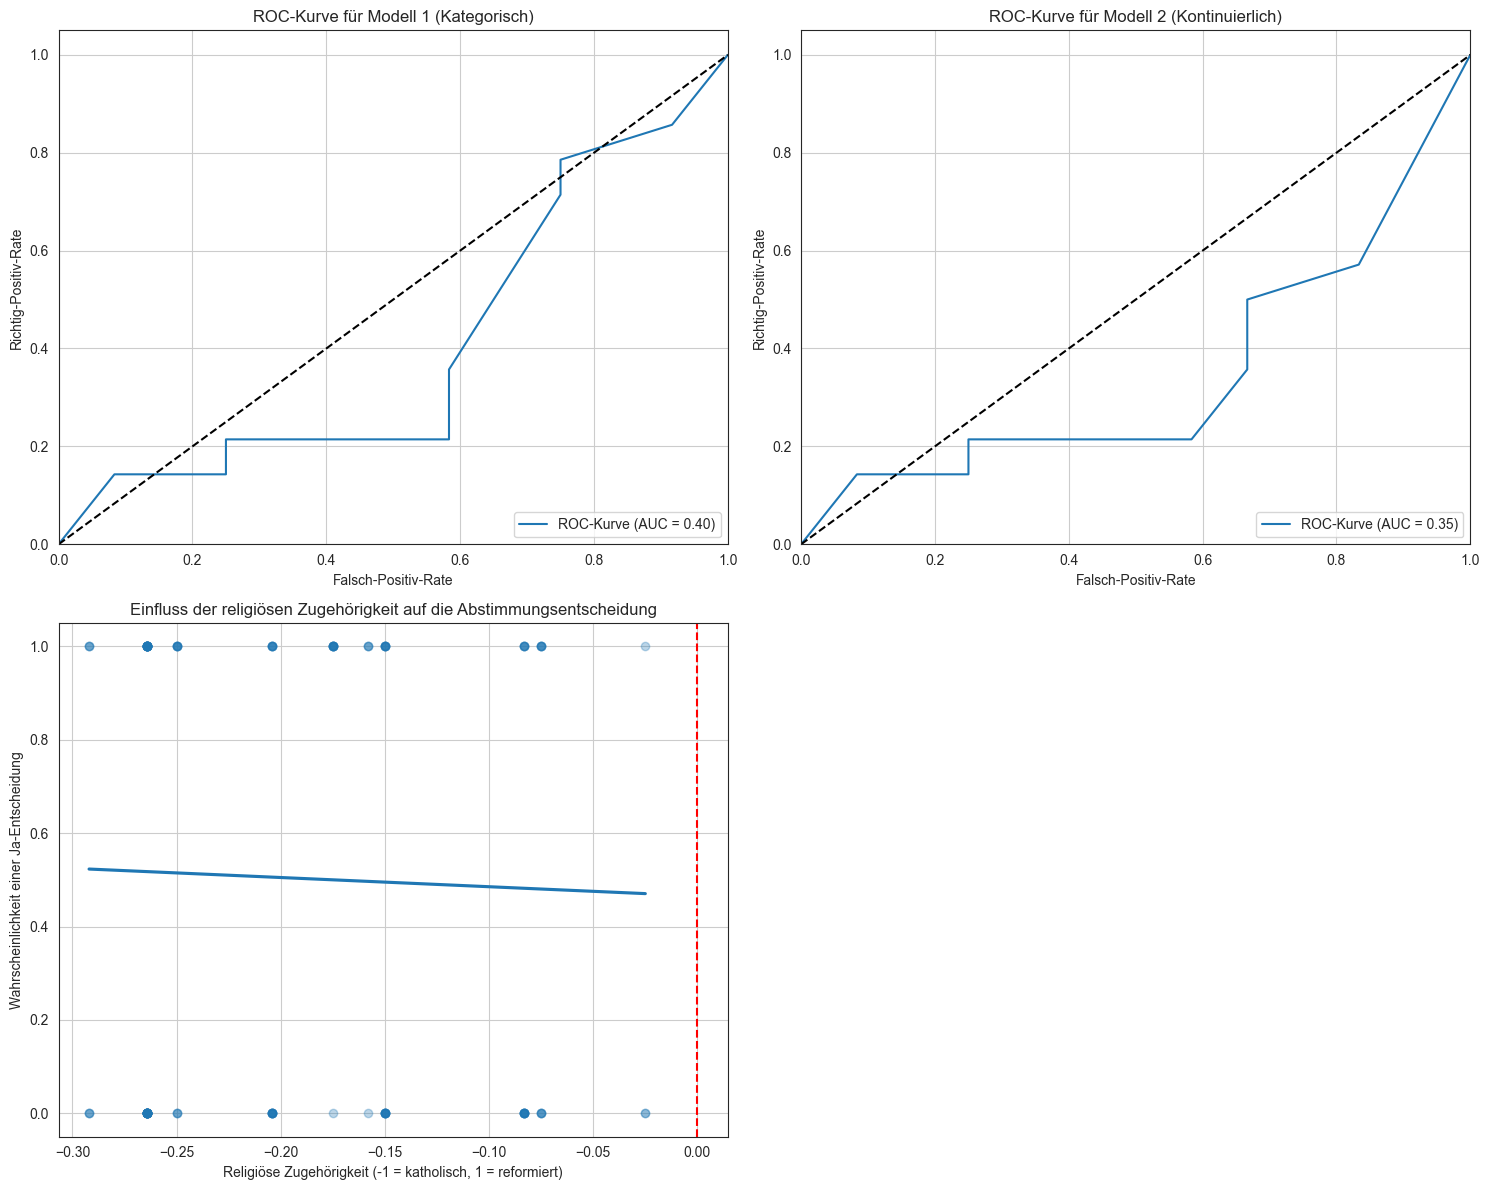

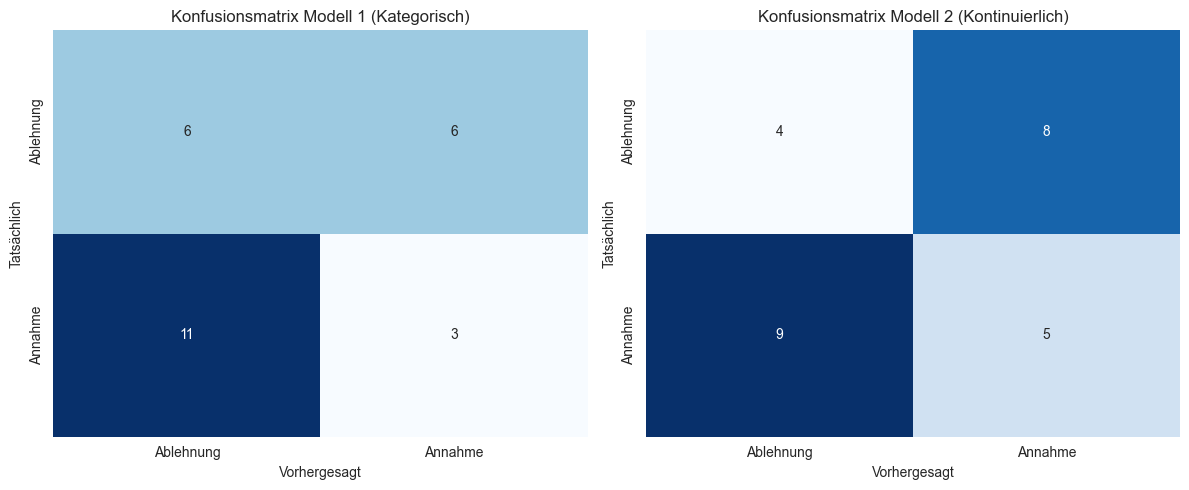

In [25]:
# ------ Visualization ------
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

# Modell 1: ROC-Kurve
plt.subplot(2, 2, 1)
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, label=f'ROC-Kurve (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsch-Positiv-Rate')
plt.ylabel('Richtig-Positiv-Rate')
plt.title('ROC-Kurve für Modell 1 (Kategorisch)')
plt.legend(loc="lower right")
plt.grid(True)

# Modell 2: ROC-Kurve
plt.subplot(2, 2, 2)
fpr2, tpr2, _ = roc_curve(y2_test, y_pred_proba2)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr2, tpr2, label=f'ROC-Kurve (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsch-Positiv-Rate')
plt.ylabel('Richtig-Positiv-Rate')
plt.title('ROC-Kurve für Modell 2 (Kontinuierlich)')
plt.legend(loc="lower right")
plt.grid(True)

# Einfluss der kontinuierlichen religiösen Zugehörigkeit auf die Abstimmungsentscheidung
plt.subplot(2, 2, 3)
sns.regplot(x='religion_continuous_avg', y='accepted', data=model_data, logistic=True, 
           scatter_kws={'alpha': 0.3}, ci=None)
plt.xlabel('Religiöse Zugehörigkeit (-1 = katholisch, 1 = reformiert)')
plt.ylabel('Wahrscheinlichkeit einer Ja-Entscheidung')
plt.title('Einfluss der religiösen Zugehörigkeit auf die Abstimmungsentscheidung')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)

plt.tight_layout()

# ------ Vergleich der Konfusionsmatrizen ------

plt.figure(figsize=(12, 5))

# Modell 1: Konfusionsmatrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Ablehnung', 'Annahme'], 
           yticklabels=['Ablehnung', 'Annahme'])
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Konfusionsmatrix Modell 1 (Kategorisch)')

# Modell 2: Konfusionsmatrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Ablehnung', 'Annahme'], 
           yticklabels=['Ablehnung', 'Annahme'])
plt.xlabel('Vorhergesagt')
plt.ylabel('Tatsächlich')
plt.title('Konfusionsmatrix Modell 2 (Kontinuierlich)')

plt.tight_layout()

In [26]:
# ------ helper function to get all continuous values for all cantons

def get_continuous_values_for_cantons(current_cantons):
    # Calculate the average continuous religion value
    religion_continuous_avg = current_cantons['religion_continuous'].mean()

    religion_AG_continuous = current_cantons[current_cantons['Kanton'] == 'AG']['religion_continuous'].values[0]
    religion_AI_continuous = current_cantons[current_cantons['Kanton'] == 'AI']['religion_continuous'].values[0]
    religion_AR_continuous = current_cantons[current_cantons['Kanton'] == 'AR']['religion_continuous'].values[0]
    religion_BE_continuous = current_cantons[current_cantons['Kanton'] == 'BE']['religion_continuous'].values[0]
    religion_BL_continuous = current_cantons[current_cantons['Kanton'] == 'BL']['religion_continuous'].values[0]
    religion_BS_continuous = current_cantons[current_cantons['Kanton'] == 'BS']['religion_continuous'].values[0]
    religion_FR_continuous = current_cantons[current_cantons['Kanton'] == 'FR']['religion_continuous'].values[0]
    religion_GE_continuous = current_cantons[current_cantons['Kanton'] == 'GE']['religion_continuous'].values[0]
    religion_ZH_continuous = current_cantons[current_cantons['Kanton'] == 'ZH']['religion_continuous'].values[0]
    religion_ZG_continuous = current_cantons[current_cantons['Kanton'] == 'ZG']['religion_continuous'].values[0]
    religion_SO_continuous = current_cantons[current_cantons['Kanton'] == 'SO']['religion_continuous'].values[0]
    religion_TI_continuous = current_cantons[current_cantons['Kanton'] == 'TI']['religion_continuous'].values[0]
    religion_VS_continuous = current_cantons[current_cantons['Kanton'] == 'VS']['religion_continuous'].values[0]
    religion_NE_continuous = current_cantons[current_cantons['Kanton'] == 'NE']['religion_continuous'].values[0]
    religion_OW_continuous = current_cantons[current_cantons['Kanton'] == 'OW']['religion_continuous'].values[0]
    religion_NW_continuous = current_cantons[current_cantons['Kanton'] == 'NW']['religion_continuous'].values[0]
    religion_SG_continuous = current_cantons[current_cantons['Kanton'] == 'SG']['religion_continuous'].values[0]
    religion_TG_continuous = current_cantons[current_cantons['Kanton'] == 'TG']['religion_continuous'].values[0]
    religion_GR_continuous = current_cantons[current_cantons['Kanton'] == 'GR']['religion_continuous'].values[0]
    religion_SH_continuous = current_cantons[current_cantons['Kanton'] == 'SH']['religion_continuous'].values[0]
    religion_VD_continuous = current_cantons[current_cantons['Kanton'] == 'VD']['religion_continuous'].values[0]
    religion_UR_continuous = current_cantons[current_cantons['Kanton'] == 'UR']['religion_continuous'].values[0]
    religion_LU_continuous = current_cantons[current_cantons['Kanton'] == 'LU']['religion_continuous'].values[0]
    religion_SZ_continuous = current_cantons[current_cantons['Kanton'] == 'SZ']['religion_continuous'].values[0]

    return [
        religion_continuous_avg, religion_AG_continuous, religion_AI_continuous, religion_AR_continuous, religion_BE_continuous, religion_BL_continuous, religion_BS_continuous,
        religion_FR_continuous, religion_GE_continuous, religion_ZH_continuous, religion_ZG_continuous, religion_SO_continuous, religion_TI_continuous, religion_VS_continuous, religion_NE_continuous, 
        religion_OW_continuous, religion_NW_continuous, religion_SG_continuous, religion_TG_continuous, religion_GR_continuous, religion_SH_continuous, religion_VD_continuous, religion_UR_continuous, 
        religion_LU_continuous, religion_SZ_continuous
    ]


# ------ Prediction function ------

def predict_vote_outcome(model, model_type, current_cantons, verbose=True):
    """
    Predicts the outcome of a vote based on the current religious
    composition of the cantons.
    
    Parameters:
    model - The trained model
    model_type - 'categorical' or 'continuous'
    current_cantons - DataFrame with current canton data
    verbose - Whether to display detailed output
    
    Returns:
    Predicted yes-share (0-1)
    """
    if model_type == 'categorical':
        # Create features for the categorical model
        religion_counts = current_cantons['Religion'].value_counts().to_dict()
        features = {'num_cantone': len(current_cantons)}
        
        for religion, count in religion_counts.items():
            features[f'count_{religion}'] = count
            
        # Create feature array (with the same columns as in the training model)
        X_pred = np.zeros(len(X1_cols))
        for i, col in enumerate(X1_cols):
            if col in features:
                X_pred[i] = features[col]
        
        # Make prediction
        yes_percentage = model.predict([X_pred])[0]
        yes_percentage = max(0, min(1, yes_percentage))  # Limit to [0,1]
        
    elif model_type == 'continuous':
        # Calculate the average continuous religion value
        
        X2_cols = ['religion_continuous_avg', 'religion_AG', 'religion_AI', 'religion_AR', 'religion_BE', 'religion_BL', 'religion_BS', 'religion_FR', 'religion_GE', 'religion_ZH', 'religion_ZG',
          'religion_SO', 'religion_TI', 'religion_VS', 'religion_NE', 'religion_OW', 'religion_NW', 'religion_SG', 'religion_TG', 'religion_GR', 'religion_SH', 'religion_VD',
          'religion_UR', 'religion_LU', 'religion_SZ']
        
        # Create features for the continuous model
        # We use the current year and the current number of cantons
        features = get_continuous_values_for_cantons(current_cantons)
        print(features)
        
        # Make prediction
        yes_percentage = model.predict([features])[0]
        yes_percentage = max(0, min(1, yes_percentage))  # Limit to [0,1]
        
    if verbose:
        print(f"Predicted Yes-Share: {yes_percentage:.4f} ({yes_percentage*100:.2f}%)")
        print(f"Result: {'Accepted' if yes_percentage > 0.5 else 'Rejected'}")
    
    return yes_percentage

In [27]:
# Example: Prediction with the current state of the cantons

# Find the religious information of the next reference year
# Find the index of the nearest laying value
idx = np.abs(reference_years - 1990).argmin()
# get the year used for the political data
religion_reference_year = reference_years[idx]
# Get the religion information from the specified reference year
df_kantons_reference_year = df_kanton_agg[df_kanton_agg['Jahr'] == religion_reference_year]
# For each canton, check if it already existed at the time of the vote
available_cantons = df_kantons_reference_year[df_kantons_reference_year['Religion'].notna()]

print("\n--- Prediction with current canton data ---")
predict_vote_outcome(model1, 'categorical', available_cantons, verbose=True)
predict_vote_outcome(model2, 'continuous', available_cantons, verbose=True)

# ------ Example: What-if analysis ------

print("\n--- What-if analysis ---")

print("\nAssuming all cantons were predominantly Reformed:")

# Create a copy of the current canton data
reformierte_kantone = available_cantons.copy()
# Set all cantons to 'Majority Reformed: ≥ 80.0 %'
reformierte_kantone['Religion'] = 'Mehrheit reformiert: ≥ 80,0 %'
# Recalculate continuous values
reformierte_kantone['religion_continuous'] = reformierte_kantone['Religion'].apply(religion_to_continuous)
# Prediction with the assumed data
print("\nPrediction if all cantons were predominantly Reformed:")
predict_vote_outcome(model1, 'categorical', reformierte_kantone)
predict_vote_outcome(model2, 'continuous', reformierte_kantone)

print("\nAssuming all cantons were predominantly Catholic:")

# Create a copy of the current canton data
katholische_kantone = available_cantons.copy()
# Set all cantons to 'Majority Catholic: ≥ 80.0 %'
katholische_kantone['Religion'] = 'Mehrheit katholisch: ≥ 80,0 %'
# Recalculate continuous values
katholische_kantone['religion_continuous'] = katholische_kantone['Religion'].apply(religion_to_continuous)

# Prediction with the assumed data
print("\nPrediction if all cantons were predominantly Catholic:")
predict_vote_outcome(model1, 'categorical', katholische_kantone)
predict_vote_outcome(model2, 'continuous', katholische_kantone)


--- Prediction with current canton data ---
Predicted Yes-Share: 0.0000 (0.00%)
Result: Rejected
[np.float64(-0.29200000000000004), np.float64(-0.7), np.float64(-0.9), np.float64(0.5), np.float64(0.9), np.float64(0.7), np.float64(0.5), np.float64(-0.9), np.float64(-0.5), np.float64(0.5), np.float64(-0.7), np.float64(-0.5), np.float64(-0.9), np.float64(-0.9), np.float64(0.7), np.float64(-0.9), np.float64(-0.9), np.float64(-0.7), np.float64(0.5), np.float64(-0.9), np.float64(0.7), np.float64(0.7), np.float64(-0.9), np.float64(-0.9), np.float64(-0.9)]
Predicted Yes-Share: 1.0000 (100.00%)
Result: Accepted

--- What-if analysis ---

Assuming all cantons were predominantly Reformed:

Prediction if all cantons were predominantly Reformed:
Predicted Yes-Share: 0.0000 (0.00%)
Result: Rejected
[np.float64(0.9), np.float64(0.9), np.float64(0.9), np.float64(0.9), np.float64(0.9), np.float64(0.9), np.float64(0.9), np.float64(0.9), np.float64(0.9), np.float64(0.9), np.float64(0.9), np.float64(0.9)

C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\aaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0